<div style="position: relative;"> 
  <div style="display:flex; flex-direction: row; justify-content: space-between">
    <div style="display:flex; flex-direction:column">
      <h1 style="position: relative; margin-bottom: 0px">Report: Vehicle Leasing Price Predictor</h1>
      <h3 style="margin-top: 0px"> A Machine Learning approach </h3>
    </div>
    <div style="display: flex; align-items: center;">
      <div style="width:auto; height:75px"><img src="components/wu-logo.png" alt="Logo" width="auto" height="100%"></div>
      <div style="width:auto; height:75px"><img src="components/zeb-logo2.png" alt="ZEB"  width="auto" height="100%"></div>
    </div>
    <!-- absolute; top: 0; right: 150px; -->
    <!-- style="position: absolute; top: 0; right: 0;" -->
  </div>

  <div style="margin-left: 10px;">
    <p style="margin-bottom:0px">Authors:</p>
    <ul style="list-style-type: disc; padding-left: 20px0;margin-top:0px">
      <li>Tobias Ponesch</li>
      <li>Sina Haghgoo</li>
      <li>Finnian John Dempsey</li>
      <li>Vinicius Wolff</li>
      <li>Adrian Lehrner</li>
      <li>Mario Dangev</li>
    </ul>
  </div>
  <div style="margin-left: 10px;">
    <p style="margin-bottom:0px">Coaches:</p>
    <ul style="list-style-type: disc; padding-left: 20px0;margin-top:0px">
      <li>Thomas Dornigg 
        <img src="components/zeb-logo2.png" alt="ZEB" width="30px" height="auto"> 
        <a href="https://at.linkedin.com/in/thomas-dornigg"><img src="components/LinkedIn_logo_initials.png" alt="LinkedIn" width="20" height="auto"></a>
      </li>
      <li>Jannik Neuböck 
        <img src="components/zeb-logo2.png" alt="ZEB" width="30" height="auto"> 
        <a href="https://www.linkedin.com/in/jannik-neub%C3%B6ck-b71775194/?originalSubdomain=at"><img src="components/LinkedIn_logo_initials.png" alt="LinkedIn" width="20" height="auto"></a>
      </li>
    </ul>
  </div>
  <div style="margin-left: 10px;">
    <p style="margin-bottom:0px">Advising Professor:</p>
    <ul style="list-style-type: disc; padding-left: 20px0;margin-top:0px;">
      <li>Ronald Hochreiter 
        <img src="components/wu-logo.png" alt="ZEB" width="30" height="auto"> 
        <a href="https://www.linkedin.com/in/ronaldhochreiter/?originalSubdomain=at"><img src="components/LinkedIn_logo_initials.png" alt="LinkedIn" width="20" height="auto"></a>
      </li>
    </ul>
  </div>


  <p>We are immensely grateful for the collaboration and support of <a href="https://www.zeb-consulting.com/">zeb Consulting</a>, which has greatly contributed to the success of this project.</p>
</div>


## Introduction

This project aims to develop a machine learning model to predict the leasing prices of vehicles based on various [attributes](#explanatory-analysis). <br>
In the current macroeconomic environment, accurately forecasting leasing asset values and pricing is crucial for leasing banks. Additionally, the automotive market has experienced significant price fluctuations and supply chain disruptions, further emphasizing the need for reliable predictions. Leveraging a dataset provided by a leasing bank, our research and development efforts focus on building the most accurate prediction models. <br>
The final outcome will be a graphical user interface (GUI) that allows users to input vehicle details and obtain leasing rate predictions. By employing state-of-the-art machine learning techniques and addressing challenges such as data quality and model selection, this project aims to provide an effective tool for leasing banks in assessing asset values and making informed pricing decisions.

## Table of Contents

1. [Import Libraries](#import-libraries)
2. [Computational effort](#computational-effort)
3. [Dataset import](#dataset-import)
4. [Basic Preprocessing](#basic-preprocessing)
5. [Explanatory Data Analysis](#explanatory-analysis)
   - 5.1 [The Target variable](#target-variable)
   - 5.2 [Numerical Features](#numerical-features)
     - 5.2.1 [Skewness of numerical variables](#skewness)
   - 5.3 [Categorical Features](#categorical-features)
   - 5.4 [Target variable vs. categorical features](#target-cat)
   - 5.5 [Heatmap (Correlations)](#heatmap)
     - 5.5.1 [Dropping kilowatts](#drop-kilowatts)
6. [Preprocessing and Feature Engineering](#preprocessing)
   - 6.1 [Missing Values](#missing-values)
   - 6.2 [Cardinality of non-numeric features](#cardinality)
   - 6.3 [Problems with splitting -- STILL OPEN](#splitting-problem)
   - 6.4 [Out of Sample split](#osample-split)
   - 6.5 [Train and Test split](#train-test-split)
   - 6.6 [Transformer Pipelines](#transformer-pipelines)
      - 6.6.1 [Challenge: Encoding](#transformer-encoding)
7. [Machine Learning Modeling](#machine-learning-modeling)
   - 7.1 [Choosing appropriate metric & customization approach](#metric)
   - 7.2 [Decision Tree](#decision-tree)
   - 7.3 [Random Forest](#random-forest)
   - 7.4 [K-nearest neighbor](#k-neighbors)
   - 7.5 [XGBoost](#xgb)
   - 7.6 [Support-Vector-Machine (SVM)](#svm)
   - 7.7 [AdaBoost Regressor](#adaboost)
8. [Test Data Performance](#test-performance)
   - 8.1 [Metrics comparison](#test-metrics-comparison)
   - 8.2 [Predicted vs actual plots](#test-predicted-actual)
9. [Out of sample performance](#osample-performance)
   - 9.1 [Metrics comparison](#osample-metrics-comparison)
   - 9.2 [Predicted vs actual plots](#osample-predicted-actual)
10. [Feature Importance Analysis](#feature-importance)
    - 10.1 [Decision tree feature importance](#importance-decisiontree)
    - 10.2 [Random forest feature importance](#importance-randomForest)
    - 10.3 [XGB feature importance](#importance-xgb)
    - 10.4 [AdaBoost feature importance](#importance-ada)
11. [Model Selection](#selection)
12. [Graphical User Interface](#GUI)
13. [Possible improvements](#possible-improvements)
14. [Safe models](#safe-models)
15. [Debugging library versions](#debugging-libraries) <br>
[References](#references) <br>
[Appendix](#appendix) <br>
A1 [Encoding differences](#a1) <br>
A2 [Bar plots Test performance](#a2) <br>
A3 [Bar plots Out of sample performance](#a3) <br>
A4 [Histogram of residuals Test performance](#a4) <br>
A5 [Histogram of residuals Out of sample performance](#a5) <br>
A6 [Light models (reduced complexity)](#a6) <br>

## 1 Import Libraries<a id="import-libraries"></a>

To develop high-quality machine learning algorithms and streamline data processing, we utilized state-of-the-art libraries such as pandas, numpy, and sklearn in this project. These libraries enabled us to implement advanced techniques and achieve efficient data manipulation and analysis.
If you run into any problems with the imported libraries, please refer to the [Debugging library versions](#debugging-libraries) section.

In [183]:
import pandas as pd
import numpy as np

#Sklearn Preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

#Sklearn model builder:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#XGB model
from xgboost import XGBRegressor

#Sklearn metrics:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import make_scorer

#Model evaluation
import shap
from sklearn.metrics import PredictionErrorDisplay

#from sklearn.preprocessing import FunctionTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler


#from sklearn.preprocessing import OneHotEncoder

#Other helper libraries
from dateutil.relativedelta import relativedelta
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import randint, uniform
from joblib import dump, load
import multiprocessing
import psutil
import threading
import time
import os

# Might cause a warning about the Numba / shap version combination. For now, this can be ignored

## 2 Computational effort<a id="computational-effort"></a>

Building Machine Learning models, or any kind of models, can be very computationally expensive and time consuming.<br>
To optimize the computational and time requirements of building machine learning models, we have introduced a section that allows you to choose between computing new models or importing existing ones. Additionally, you will be prompted to evaluate your machine's performance, ranging from "Ludicrous" (highest performance) to "Low" (lowest performance). Your response will determine the number of iterations and cross-validations in the subsequent Random Search process.<br>
Moreover, the number of threads used for model building is limited to your available threads minus two, ensuring that your machine remains usable during the process. This approach aims to strike a balance between model generation and system usability.<br>
Due to our struggles with using laptops for building the machine learning models, we used a Windows PC with the following specs for computationally expensive tasks:
- **CPU:** Ryzen 7 5800X, 8 Cores, 16 Threads, 3800MHz Base Clock, 4700MHz Boost Clock
- **RAM:** 32GB 3200MHz
- **GPU:** RTX 2080ti
- **Windows Distribution:** Windows 11 Pro, 10.0.22621

In [4]:
# ---- EXECUTE THIS CELL ----

# User input, if they want to run the model
calc_models = input("If you want to compute the models, enter \"Yes\", or \"Y\". If you want to load the existing models, enter \"No\",\"N\":")
calc_models = calc_models.lower()
allowed=["yes", "y", "no", "n"]
while calc_models not in allowed:
    print("Invalid input. Please try again.")
    calc_models = input("If you want to compute the models, enter \"Yes\", or \"Y\". If you want to load the existing models, enter \"No\",\"N\":")
    calc_models.lower()

# compute variable decides on process later on
if calc_models in ["yes","y"]:
    compute = True
else:
    compute = False    

# computational performance will influence the runtime of this script
if compute:
    allowed_values = ["ludicrous", "high", "medium", "low"]

    comp_effort = input("Enter your computational performance (Ludicrous, High, Medium, or Low): ")
    comp_effort = comp_effort.lower()

    while comp_effort not in allowed_values:
        print("Invalid input. Please try again.")
        comp_effort = input("Enter your computational performance (Ludicrous, High, Medium, or Low): ")
        comp_effort = comp_effort.lower()

    # The user input is valid
    print("Your computational performance:", comp_effort)

    #To ensure machine usability while executing models, we define usable cores
    
available_cores = multiprocessing.cpu_count()
print("Your available threads:", available_cores)



Your available threads: 16


## 3 Dataset import <a id="dataset-import"></a>

Our dataset was imported from an Excel file that was generously provided by our data coaches. This dataset serves as the foundation for our data science project. However, it is important to note that the information contained in the dataset is artificial and does not necessarily reflect perfect accuracy in relation to real-world data.  To ensure flexibility and enable user experimentation, our code includes functionality that allows users to easily change the dataset that will be imported and used to train the models. This feature provides the opportunity for further exploration and analysis with different datasets, enabling users to assess the impact of dataset variations on model performance.

In [5]:
datafolder = "data"
modelfolder = "models/current"

In [6]:
df = pd.read_excel(f'{datafolder}/dataset_2023.xlsx')
df = df.drop('Unnamed: 0', axis = 1)

The following table shows the raw dataset.

In [7]:
#Enter the actual column names


### ONLY CHANGE THIS PART ###
# The safed strings represent the current names of the columns in the dataset
brand = "brand_name"
model = "model_name"
milage = "milage"
registration = "first_registration"
duration = "duration"
gear = "gear"
fee = "monthly_fee"
emission = "emission_value"
consumption = "consumption"
horsepower = "horsepower"
kilowatts = "kilowatts"
fuel = "fuel_type"
### --- END OF THIS PART --- ###


rename_columns = {
    brand:"brand",
    model:"model",
    milage:"milage",
    registration:"registration",
    duration:"duration",
    gear:"gear",
    fee:"fee",
    emission:"emission",
    consumption:"consumption",
    horsepower:"horsepower",
    kilowatts:"kilowatts",
    fuel:"fuel"
}

df = df.rename(columns=rename_columns)
df

brand                              model      milage registration   
0           Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km      03/2023  \
1      Volkswagen                T-Cross VW Life TSI      201 km      03/2023   
2            Seat              Ibiza Austria Edition   15.000 km      10/2022   
3      Volkswagen                            Polo VW        1 km      01/2023   
4            Audi     A4 Avant 40 TDI quattro S line  105.301 km      12/2019   
...           ...                                ...         ...          ...   
19053        Seat        Ateca FR 2.0 TDI DSG 4Drive      201 km      01/2023   
19054       Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km      03/2023   
19055        Audi     A4 Avant 40 TDI quattro S line  105.301 km      12/2019   
19056  Volkswagen                            Polo VW   18.903 km      06/2020   
19057  Volkswagen                 Tiguan VW Life TDI   48.000 km      09/2022   

                   duration                gear       fee  emission   
0      48 Monat (anpassbar)           Automatik  574,01 €  119 g/km  \
1      48 Monat (anpassbar)  Manuelle Schaltung  382,58 €  131 g/km   
2      48 Monat (anpassbar)  Manuelle Schaltung  239,62 €  120 g/km   
3      48 Monat (anpassbar)  Manuelle Schaltung  309,11 €  127 g/km   
4      48 Monat (anpassbar)           Automatik  587,75 €  138 g/km   
...                     ...                 ...       ...       ...   
19053  48 Monat (anpassbar)           Automatik  692,03 €  146 g/km   
19054  48 Monat (anpassbar)           Automatik  574,01 €  187 g/km   
19055  48 Monat (anpassbar)           Automatik  587,75 €  143 g/km   
19056  48 Monat (anpassbar)  Manuelle Schaltung  256,33 €   40 g/km   
19057  48 Monat (anpassbar)  Manuelle Schaltung  539,72 €  185 g/km   

        consumption horsepower kilowatts    fuel  
0      5,0 l/100 km     150 PS    110 kW  Diesel  
1      6,0 l/100 km      95 PS     70 kW  Benzin  
2      5,0 l/100 km      80 PS     59 kW  Benzin  
3      6,0 l/100 km      80 PS     59 kW  Benzin  
4      5,0 l/100 km     190 PS    140 kW  Diesel  
...             ...        ...       ...     ...  
19053  6,0 l/100 km     150 PS    110 kW  Diesel  
19054  8,0 l/100 km     150 PS    110 kW  Diesel  
19055  6,0 l/100 km     190 PS    140 kW  Diesel  
19056  2,0 l/100 km      80 PS     59 kW  Benzin  
19057  8,0 l/100 km     122 PS     90 kW  Diesel  

[19058 rows x 12 columns]

In [8]:
SEED = 2023
TARGET_name = "fee"
FEATURE_names = df.drop(TARGET_name, axis=1).columns

## 4 Basic Preprocessing<a id="basic-preprocessing"></a>

In order to ensure data usability, certain features require formatting adjustments. These adjustments involve removing units, replacing commas with decimal points, and calculating the age based on registration information. These transformations are performed within the "basic preprocessing pipeline" to prepare the data for further analysis and modeling.

In [9]:
# Defining custom Column transformers

class CalculateAge(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        pass
    
    def transform(self, X, y=None):
        print(self.columns)
        def calculate_age(registration_date):
            if registration_date == "Neuwagen":
                return 0
            else:
                today = datetime.now()
                date = datetime.strptime(registration_date, "%m/%Y")
                delta = relativedelta(today, date)
                return (delta.years * 12) + delta.months
        Xc = X.copy()
        if self.columns:
            columns = self.columns
        else:
            columns = Xc.columns
        Xc[columns[0]] = Xc[columns[0]].replace(["","nan"], np.nan)
        Xc[columns[0]] = Xc[columns[0]].apply(calculate_age)
        return Xc

class RemoveUnits(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def extractFloats(input):
            try:
                input = input.split(" ")[0]
                f = float(input.replace('.','').replace(',','.'))
                return(f)
            except AttributeError:
                return input        
        
        X_=X.copy()
        columns = X.columns
        X_[columns] = X_[columns].apply(lambda col: col.replace(["","nan"], np.nan))
        X_[columns] = X_[columns].apply(lambda col: col.apply(extractFloats))
        return X_
        
    def get_feature_names_out(self):
        pass
       

In [10]:
units = ["milage", "duration", "fee", "emission", "consumption", "horsepower", "kilowatts"]

basicpreprocessor = ColumnTransformer(
    transformers=[
        ('age', CalculateAge(),["registration"]),
        ('unit', RemoveUnits(),units)
    ],
    remainder = "passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

df = basicpreprocessor.fit_transform(df)

None


In [11]:
basicpreprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age', CalculateAge(), ['registration']),
                                ('unit', RemoveUnits(),
                                 ['milage', 'duration', 'fee', 'emission',
                                  'consumption', 'horsepower', 'kilowatts'])],
                  verbose_feature_names_out=False)

In [12]:
df.head()

registration    milage  duration     fee  emission  consumption   
0             3     201.0      48.0  574.01     119.0          5.0  \
1             3     201.0      48.0  382.58     131.0          6.0   
2             8   15000.0      48.0  239.62     120.0          5.0   
3             5       1.0      48.0  309.11     127.0          6.0   
4            42  105301.0      48.0  587.75     138.0          5.0   

   horsepower  kilowatts       brand                              model   
0       150.0      110.0       Skoda  Octavia ŠKODA Combi Style TDI DSG  \
1        95.0       70.0  Volkswagen                T-Cross VW Life TSI   
2        80.0       59.0        Seat              Ibiza Austria Edition   
3        80.0       59.0  Volkswagen                            Polo VW   
4       190.0      140.0        Audi     A4 Avant 40 TDI quattro S line   

                 gear    fuel  
0           Automatik  Diesel  
1  Manuelle Schaltung  Benzin  
2  Manuelle Schaltung  Benzin  
3  Manuelle Schaltung  Benzin  
4           Automatik  Diesel

In [13]:
TARGET = pd.DataFrame(df["fee"])
num_FEATURES = df[df.select_dtypes(include=['float64', 'int64']).columns].drop("fee", axis=1)
cat_FEATURES = df[df.select_dtypes(exclude=['float64', 'int64']).columns]

## 5 Explanatory Data Analysis<a id="explanatory-analysis"></a>

This section contains the visualization of the dataset, which serves as an essential step in understanding the underlying patterns and relationships within the data. This exploratory analysis aims to provide insights into the dataset's characteristics and unveil meaningful trends that can guide subsequent modeling efforts.

### 5.1 The Traget variable <a id="target-variable"></a>

In our scenario, the target variable refers to the variable that we aim to predict. Specifically, the Monthly Fee is the unknown value we are seeking to estimate.

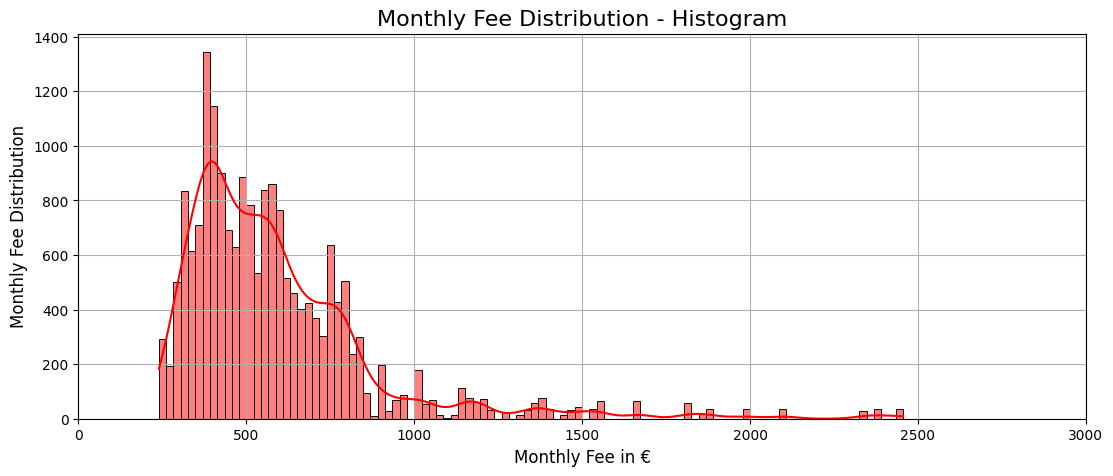

In [14]:
# Histogram
hist_color = 'red'
title_font_size = 16
label_font_size = 12
plt.figure(figsize=(13,5))
sns.histplot(TARGET['fee'], kde=True, color=hist_color)
plt.title('Monthly Fee Distribution - Histogram', fontsize=title_font_size)
plt.xlabel('Monthly Fee in €', fontsize=label_font_size)
plt.xticks(ticks=plt.xticks()[0][::1])  
plt.ylabel('Monthly Fee Distribution', fontsize=label_font_size)
plt.grid(True)
plt.show()

On this histogramm we see the monthly fee distrubtion for the cars in the dataset. The distribution exhibits a right-skewed pattern, indicating that a majority of the leasing rates fall towards the lower end of the scale with minimum leasing rates. starting from approximately 250 euros. The peak of the distribution occurs around 350 euros, with a significant number of cars falling within this monthly fee range. Most of the values lie between 300-900 euros. What is interresting is that we can see that there are very few cars that have a leasing rate between 2000 and 2500 euros. Those cars are not outliers but rather just very expensive cars.

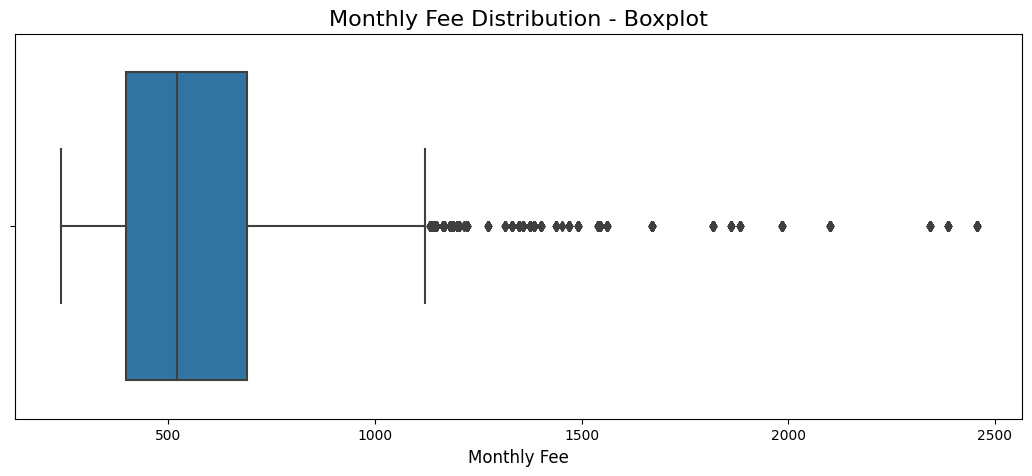

In [15]:
# Boxplot
plt.figure(figsize=(13,5))
sns.boxplot(x=df['fee'])
plt.title('Monthly Fee Distribution - Boxplot', fontsize=title_font_size)
plt.xlabel('Monthly Fee', fontsize=label_font_size)
plt.show()

The boxplot for the monthy fee distribution verifies what we observed from the histogram. The minimum monthly fee value is approximately 250 euros, while the maximum reaches up to 1200 euros. The median, which represents the middle value of the distribution, lies slightly above 500 euros. Upon closer examination, it becomes apparent that the boxplot exhibits numerous outliers. However (as stated earlier), these outliers are not indicative of data anomalies but rather represent the presence of very expensive cars with exceptionally high leasing rates. This observation highlights the diversity within the dataset, as it encompasses both affordable and luxury vehicles.

### 5.2 Numerical Features <a id="numerical-features"></a>

Features in a machine learning model are the input variables used to make predictions or classifications. They provide the necessary information for the model to learn and make decisions.<br>
The numerical features gathered are:
- **Mileage:**<br> The total distance traveled by the vehicle in miles. This feature provides information about the wear and tear on the vehicle and can impact its value and leasing price.
- **First Registration:**<br> The duration, represented in months, since the vehicle's initial registration. This feature indicates the age of the vehicle and can affect its depreciation and leasing price.
- **Duration:**<br> The duration of the leasing contract in months. This feature represents the length of time for which the vehicle is leased and influences the leasing price.
- **Emissions:**<br> The amount of emissions produced by the vehicle, typically measured in grams of CO2 per kilometer. This feature provides insights into the environmental impact of the vehicle and may impact leasing decisions, especially in regions with emissions regulations.
- **Consumption:**<br> The fuel consumption of the vehicle, typically measured in liters per 100 kilometers. This feature indicates the efficiency of the vehicle in terms of fuel usage.
- **Horsepower:**<br> The measure of the vehicle's engine power. This feature represents the strength and performance capabilities of the vehicle.
- **Kilowatts:**<br> The power of the vehicle's engine in kilowatts. This feature provides an alternative representation of the engine power.

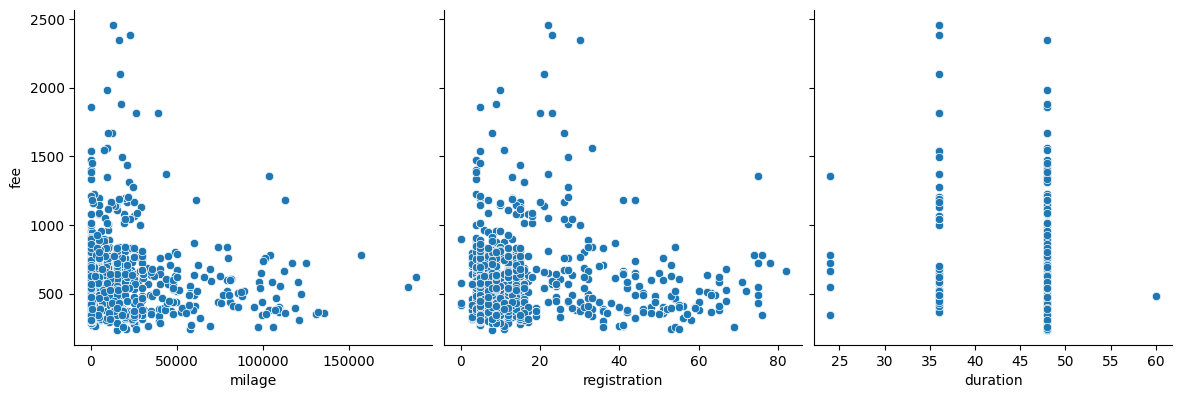

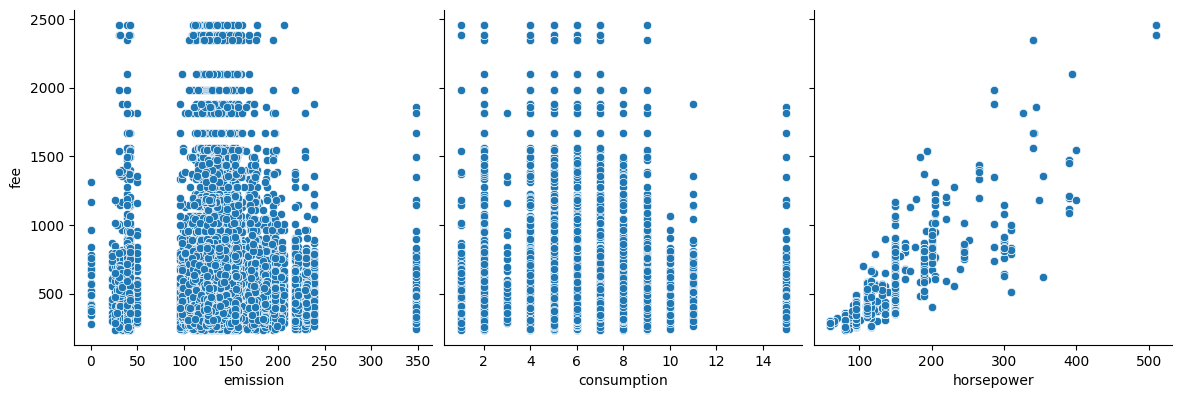

In [16]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('milage', 'registration', 'duration')
pp('emission', 'consumption', 'horsepower')

#def pp(x):
#    sns.pairplot(df, x_vars=[x], y_vars='fee',height=4, aspect=1, kind='scatter')
#    plt.show()

#pp('kilowatts')

Scatterplots provide a visual representation to explore the relationship between numerical variables and the target variable in our dataset. In our analysis, we plotted our target variable on the y-axis against all the numeric variables on the x-axis.<br>
From the scatterplots, several key findings emerged. First, a strong linear relationship was observed between the monthly fee and the horsepower. As the horsepower increases, the monthly fee tends to rise as well, indicating a positive correlation between these variables.<br>
Additionally, we discovered that lower mileage and more recent initial registrations are associated with higher monthly fees. This relationship is evident from the concentrated distribution of points in the corresponding regions of the scatterplots, suggesting that these factors have a noticeable impact on leasing rates.<br>
Examining the scatterplots for consumption and duration, we noticed an interresting pattern. Despite variations in duration and consumption, the monthly fees are relatively evenly distributed. This implies that these variables may not exert a significant influence on the monthly fee, as indicated by the consistent spread of points across different durations and consumption levels.<br>
Regarding the emission variable, we observed a dense cluster of points in the middle range, signifying a large number of vehicles with emission values between approx. 100-250. This indicates that both low-cost and high-cost vehicles exist within this emission range, potentially reflecting a diverse market segment with various pricing factors beyond emissions alone.<br>
Overall, these insights from the scatterplots shed light on the relationships between the numerical variables and the monthly fee, providing valuable information for feature selection and understanding the factors influencing leasing rates.<br>

#### 5.2.1 Skewness of numerical variables <a id="skewness"></a>

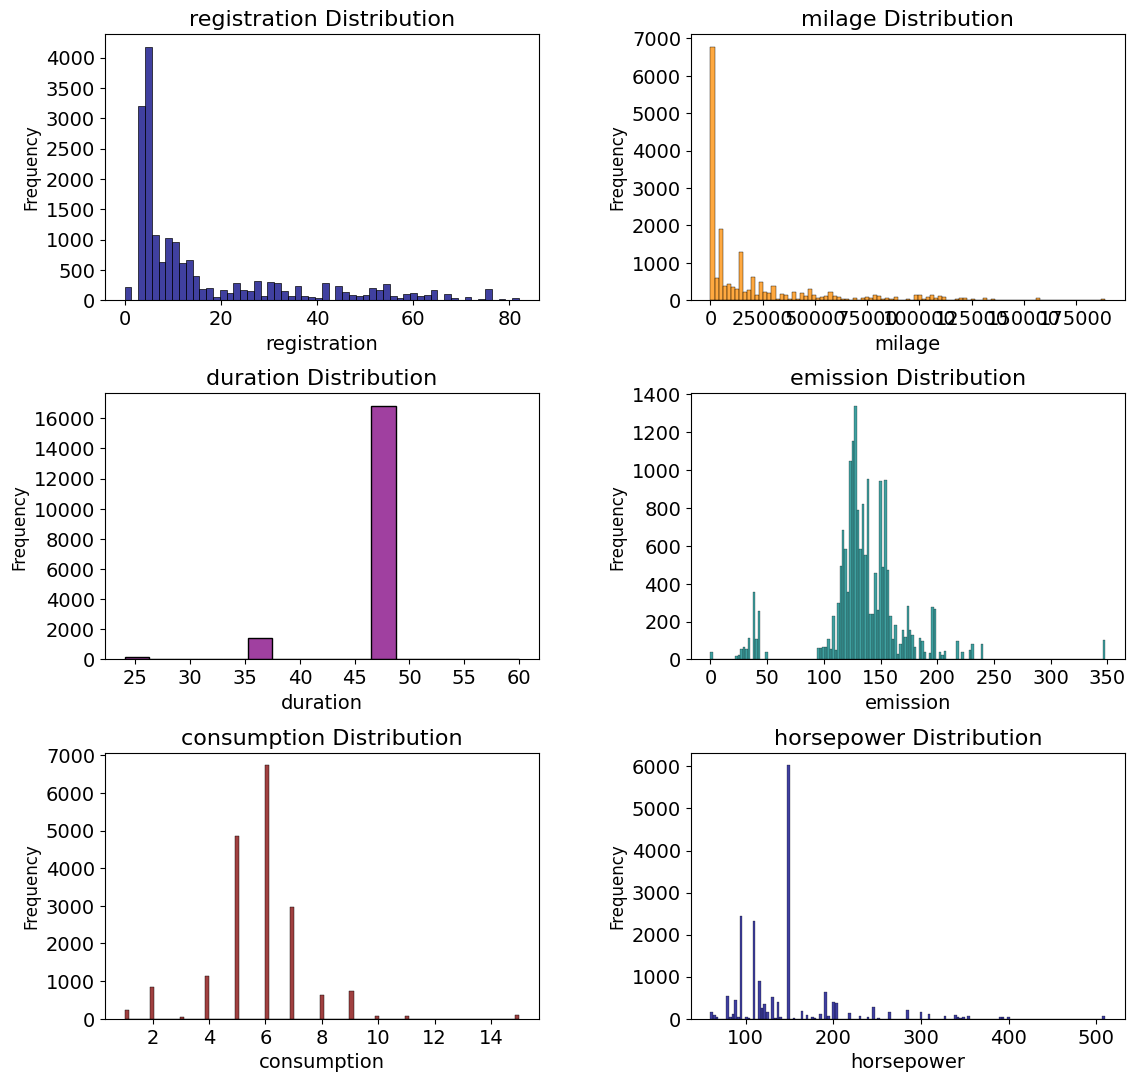

In [17]:
num_FEATURES_hist = num_FEATURES.dropna()

plt.figure(figsize=(12,16))

colors = ['navy', 'darkorange', 'purple', 'teal', 'maroon']

for i, col in enumerate(num_FEATURES_hist.columns):
    if i==len(num_FEATURES_hist.columns)-1:
        continue
    idx = int('42' + str(i+1))
    plt.subplot(idx)
    sns.histplot(num_FEATURES_hist[col], color=colors[i % len(colors)])
    plt.title(col+' Distribution', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()


When examining the skewedness of the numerical variables in our dataset, interesting patterns emerge. Specifically, the registration and mileage variables exhibit right-skewed distributions, indicating a high concentration of new vehicles. This suggests that a significant portion of the dataset comprises recently registered vehicles with relatively low mileage.

In contrast, the emission and consumption variables demonstrate symmetric distributions, implying a more balanced distribution of values. The absence of skewness in these variables suggests that the dataset encompasses a diverse range of emission and consumption values without a pronounced bias towards higher or lower values.

### 5.3 Categporical Features <a id="categorical-features"></a>

The categorical features gathered are:
- Brand: <br> The brand or manufacturer of the vehicle. This feature represents the specific company or brand associated with the vehicle's production.
- Model:<br> The specific model or variant of the vehicle. This feature provides detailed information about the vehicle's specific version or edition.
- Gear:<br> The type of gear or transmission system used in the vehicle. This feature indicates whether the vehicle has a manual or automatic gear system.
- Fuel:<br> The type of fuel used by the vehicle. This feature represents the fuel source required for the vehicle's operation, such as gasoline, diesel, or hybrid.

In [18]:
cat_FEATURES

brand                              model                gear   
0           Skoda  Octavia ŠKODA Combi Style TDI DSG           Automatik  \
1      Volkswagen                T-Cross VW Life TSI  Manuelle Schaltung   
2            Seat              Ibiza Austria Edition  Manuelle Schaltung   
3      Volkswagen                            Polo VW  Manuelle Schaltung   
4            Audi     A4 Avant 40 TDI quattro S line           Automatik   
...           ...                                ...                 ...   
19053        Seat        Ateca FR 2.0 TDI DSG 4Drive           Automatik   
19054       Skoda  Octavia ŠKODA Combi Style TDI DSG           Automatik   
19055        Audi     A4 Avant 40 TDI quattro S line           Automatik   
19056  Volkswagen                            Polo VW  Manuelle Schaltung   
19057  Volkswagen                 Tiguan VW Life TDI  Manuelle Schaltung   

         fuel  
0      Diesel  
1      Benzin  
2      Benzin  
3      Benzin  
4      Diesel  
...       ...  
19053  Diesel  
19054  Diesel  
19055  Diesel  
19056  Benzin  
19057  Diesel  

[19058 rows x 4 columns]

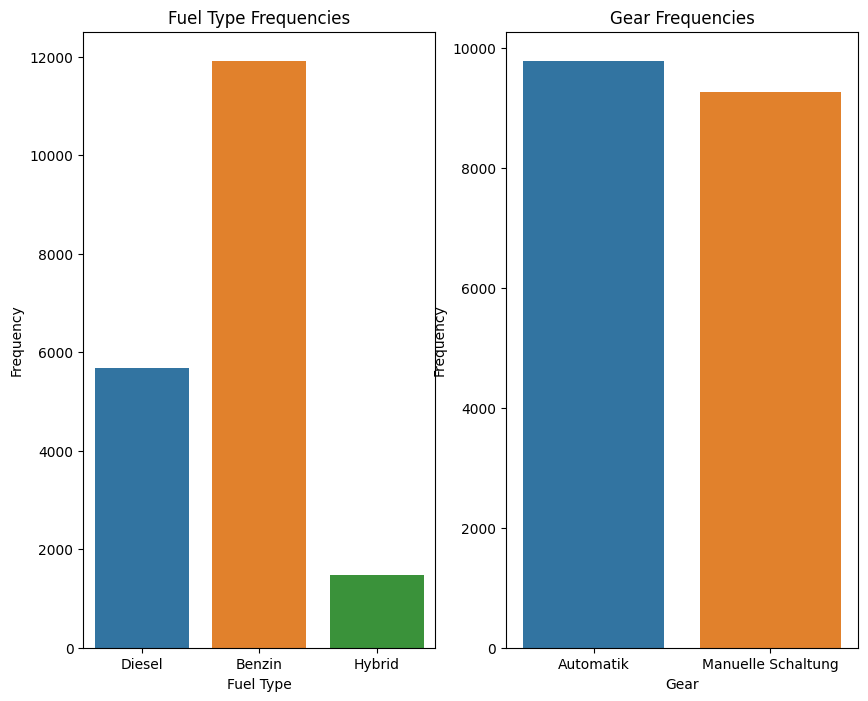

In [19]:
# Create subplots for each categorical variable

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))

# Fuel type barplot
sns.countplot(x='fuel', data=cat_FEATURES, ax=axs[0])
axs[0].set_xlabel('Fuel Type')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Fuel Type Frequencies')

# Gear barplot
sns.countplot(x='gear', data=cat_FEATURES, ax=axs[1])
axs[1].set_xlabel('Gear')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Gear Frequencies')

plt.show()

The barplots provide insights into the fuel types and gear types of the vehicles in our dataset. We can observe that the dataset comprises three primary fuel types: diesel, gasoline, and hybrid vehicles. Additionally, the barplots reveal the presence of two gear types: automatic and manual shifts. This highlights the transmission options available within the datase.

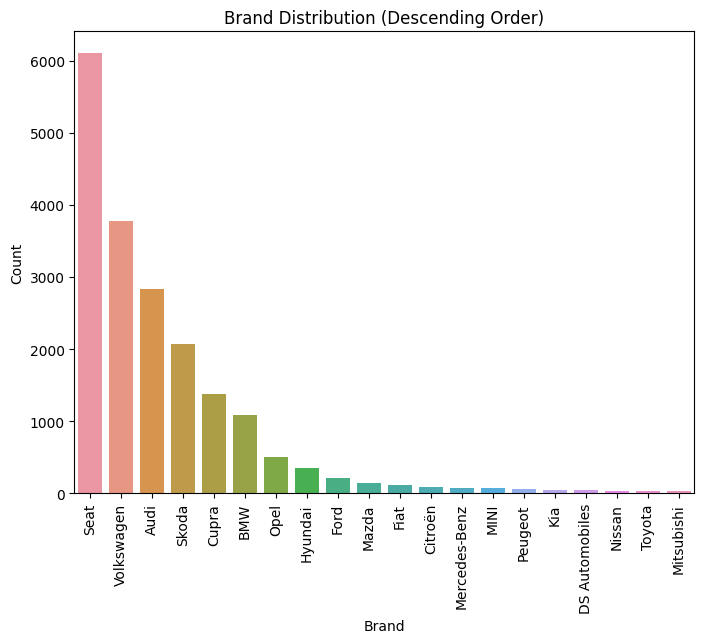

In [20]:
# Distribution of brands
brand_counts = df['brand'].value_counts()

brand_counts = brand_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='brand', order=brand_counts.index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution (Descending Order)')
plt.xticks(rotation=90)
plt.show()

Upon exploring the brands present in our dataset, we identified several notable findings. The most frequently occurring brands among the vehicles in our dataset are Seat, Volkswagen, Audi, Skoda, Cupra, BMW, and Opel.

The inclusion of these brands in our dataset represents a mix of mainstream vehicles, providing a comprehensive view of the market and enabling us to analyze the impact of brand types on the monthly leasing fees.

### 5.4 Target variable vs. categorical features <a id="target-cat"></a>

This section provides an overview of how the categorical features influence the target variable, which is the monthly fee.

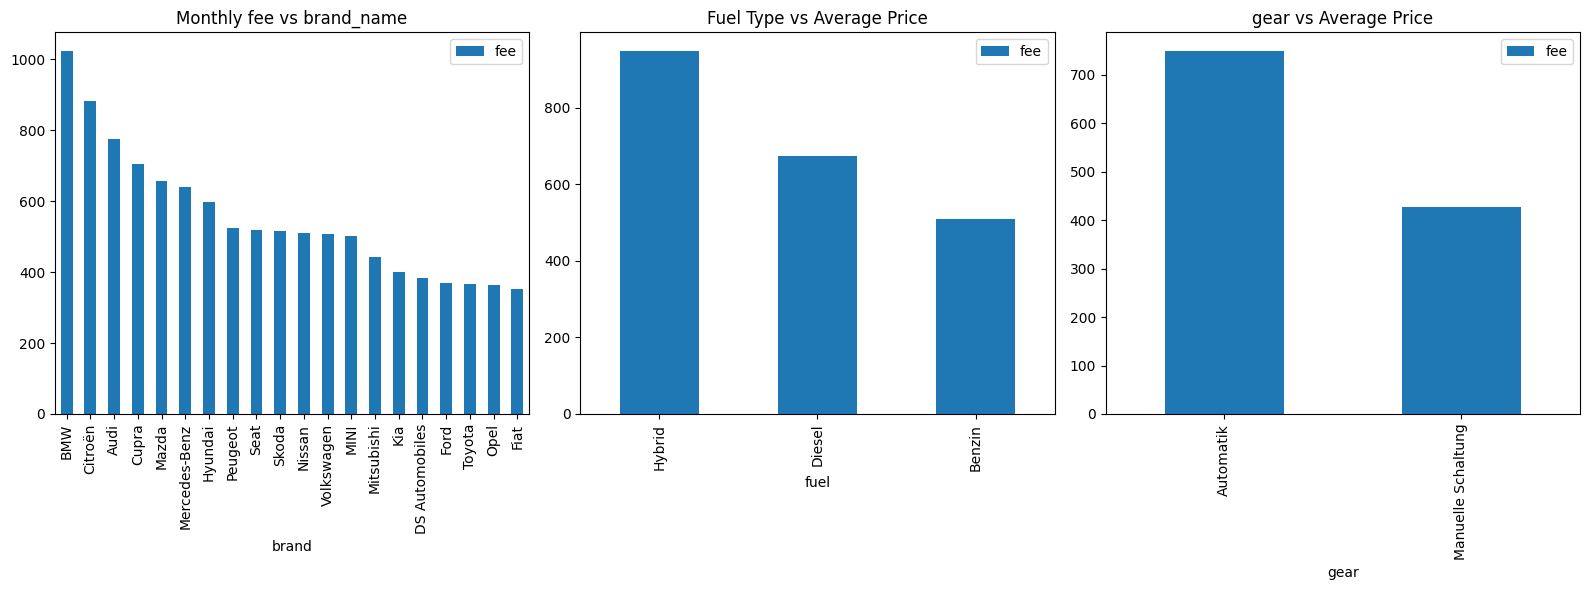

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

df_brand = pd.DataFrame(df.groupby(['brand'])['fee'].mean().sort_values(ascending=False))
df_brand.plot.bar(ax=axs[0])
axs[0].set_title('Monthly fee vs brand_name')

df_fueltype = pd.DataFrame(df.groupby(['fuel'])['fee'].mean().sort_values(ascending=False))
df_fueltype.plot.bar(ax=axs[1])
axs[1].set_title('Fuel Type vs Average Price')

df_gear = pd.DataFrame(df.groupby(['gear'])['fee'].mean().sort_values(ascending=False))
df_gear.plot.bar(ax=axs[2])
axs[2].set_title('gear vs Average Price')

plt.tight_layout()
plt.show()

Analyzing the relationship between the target variable and the categorical variables in our dataset revealed interesting insights. Plotting the target variable against different categorical variables allowed us to examine their impact on leasing rates.<br>
From the visualizations, we observed that BMW models, Citroën, and Audi tend to have higher average leasing prices compared to other brands.<br>
Moreover, when considering the fuel type, we found that hybrid vehicles tend to have higher monthly fees compared to gasoline or diesel vehicles. This is attributed to the increased cost of hybrid technology and the potential for fuel savings over time.<br>
Additionally, we observed that automatic cars are generally more expensive to lease compared to cars with manual shifting. This is very likely perceived convenience and comfort associated with automatic transmission, which can contribute to higher demand and pricing.<br>

### 5.5 Heatmap (Correlations) <a id="heatmap"></a>

In this section, we have included a correlation plot to examine the relationships between the features within the dataset. This plot serves as a visual representation of the correlations and allows us to gain valuable insights into the interdependencies among the various attributes. By analyzing the correlations, we can determine whether certain variables exhibit positive or negative relationships. This comprehensive overview encompasses both numerical and categorical features, enabling us to identify important patterns and dependencies that may influence the target variable. The insights derived from these correlations are crucial for subsequent analysis and model development, as they provide valuable information for further investigation and interpretation.

In [22]:
num_data = df[df.select_dtypes(include=['float64', 'int64']).columns]

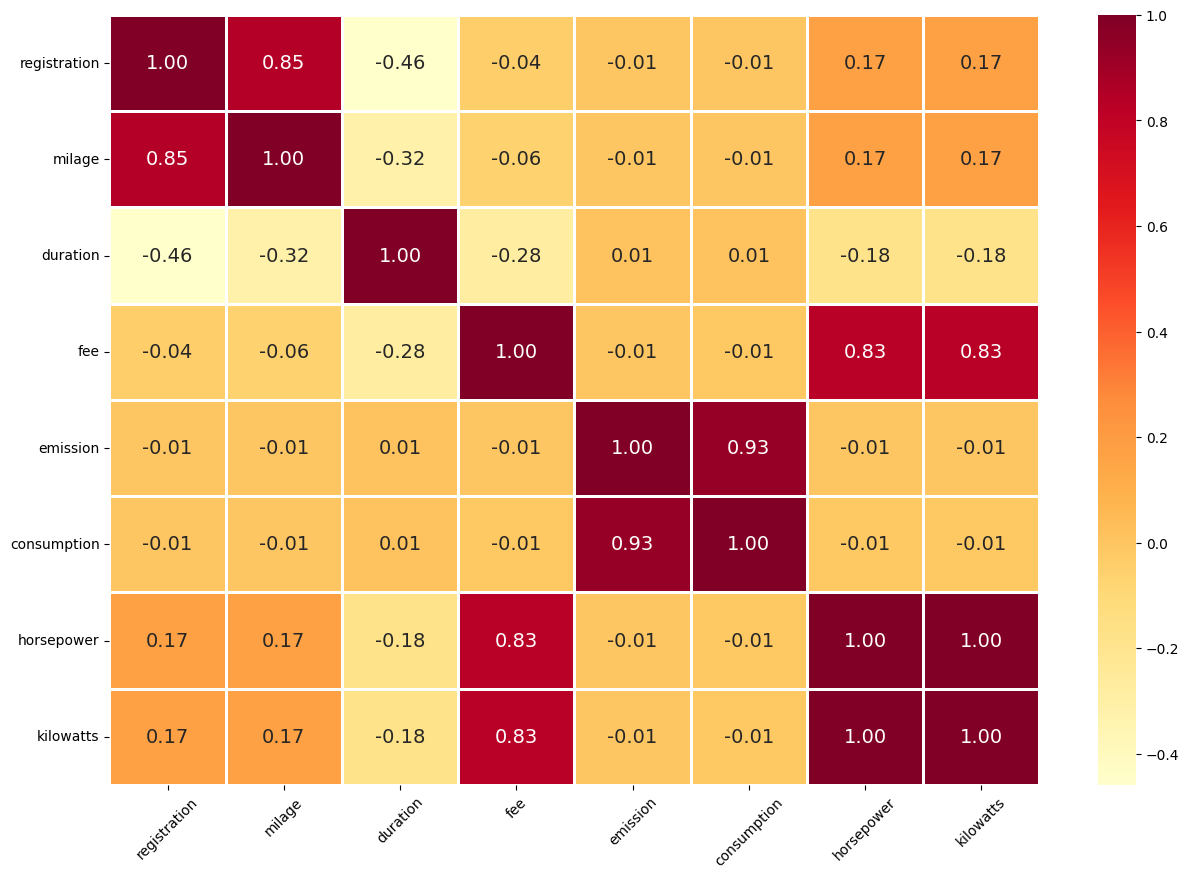

In [23]:
num_corr = num_data.corr()

# setting figure size
plt.figure(figsize=(15, 10))

# heatmap
sns.heatmap(num_corr, annot=True, linewidths=1.01, fmt=".2f", annot_kws={"size": 14}, linecolor='white', cmap="YlOrRd")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


This correlation matrix measures the relationships between different variables related to a car, namely: milage, first_registration, duration, monthly_fee, emission_value, consumption, horsepower, and kilowatts. The correlations range from -1 (perfect negative correlation, as one variable increases, the other decreases) through 0 (no correlation, the variables do not move together) to +1 (perfect positive correlation, the variables increase and decrease together).

- **Monthly_fee and Horsepower/Kilowatts**:<br>These pairs show very strong positive correlations (0.827053 and 0.826905, respectively). This suggests that cars with higher horsepower or kilowatts are associated with higher monthly fees. This could mean that more powerful vehicles tend to have higher monthly costs, potentially due to reasons such as higher insurance premiums, increased fuel consumption, or greater maintenance requirements.

- **Monthly_fee and Duration**:<br>There is a moderate negative correlation (-0.280965) between these variables, indicating that as the duration of ownership increases, the monthly fee decreases. This could be because the costs associated with a car (like loan payments or certain insurance costs) often decrease over time.

- **Monthly_fee and Mileage/First_registration**:<br>The correlation between monthly_fee and these two variables is relatively weak (-0.060930 and -0.041417, respectively). This suggests that the monthly fee does not change significantly with changes in the mileage of the car or its first registration date. It's worth noting though, that in some cases, older cars (with an earlier first registration date) or cars with higher mileage could potentially have higher maintenance costs which could affect the monthly fee.

- **Monthly_fee and Emission_value/Consumption**:<br>The correlations here are also very weak (-0.008253 and -0.012807, respectively). These small negative correlations suggest that cars with higher emissions or consumption are associated with slightly lower monthly fees, although this relationship is very weak. This may be because cars with higher emissions or fuel consumption tend to be older models, which could have lower associated costs in some areas (like lower insurance or depreciated value).

- **Mileage and First_registration**:<br>These two variables show a strong positive correlation of 0.845908, implying that as the age of the car (as suggested by the first registration) increases, so does the mileage it has run. This is a fairly intuitive relationship since older cars have typically been driven more.

- **Duration and First_registration**:<br>These two variables have a moderate negative correlation of -0.459295, indicating that as the duration of ownership increases, the car tends to be newer (i.e., has a later first registration date). This might imply that people tend to keep newer cars for longer periods.


Our analysis of the correlation matrix reveals two key variables that significantly influence the monthly fee, namely horsepower and leasing duration. Horsepower shows a strong positive correlation, suggesting that more powerfull cars generally incur higher monthly fees. Conversely, duration of ownership has a negative correlation with the monthly fee, indication that longer leasing contract durations result in lower monthly fees. Other variables, including mileage, first_registration, emission_value, and consumption, show a weaker correlation with the monthly_fee, suggesting a lesser direct impact on this target variable.

As expected, horsepower and kilowatts show a perfect correlation, because they are different units of the same attribute of a car, the engine power.
To prevent multicollinearity, which can complicate interpretation of the model, we decided to exclude kilowatts from our subsequent models. This decision helps to streamline our model by eliminating redundant information, focusing on the most relevant predictors for the monthly fee.

#### 5.5.1 Dropping kilowatts <a id="drop-kilowatts"></a>

As anticipated, there is a perfect 1:1 correlation between kilowatts (kW) and horsepower (HP), where the relationship is defined as P[kW] = 0.7457 * P[HP].<br>
Given this direct correlation, we decided to exclude the kilowatts feature from the dataset when constructing our models.

In [24]:
df = df.drop('kilowatts', axis = 1)
num_FEATURES = num_FEATURES.drop("kilowatts", axis=1)
FEATURE_names = FEATURE_names.drop("kilowatts")

## 6. Preprocessing and Feature Engineering <a id="preprocessing"></a>

This section focuses on the preprocessing and feature engineering steps conducted in our project. These steps play a pivotal role in preparing the data and optimizing its suitability for the machine learning process. Our first task is to split the data into out-of-sample, test, and train sets. This division ensures robust model evaluation and guards against overfitting, enabling us to gauge the generalization performance accurately.

Once the data is appropriately partitioned, we employ the renowned scikit-learn library to define transformer pipelines. These pipelines serve as systematic frameworks for data transformation and feature engineering, ensuring consistency and efficiency throughout the machine learning workflow. Leveraging transformer pipelines allows us to seamlessly apply a range of preprocessing techniques, including scaling, categorical variable encoding, handling missing values, and creating interaction features.

By meticulously designing and implementing these preprocessing and feature engineering steps, we enhance the data's quality and representation. This enhancement empowers our machine learning models to capture meaningful patterns and make accurate predictions. The flexibility and comprehensiveness of scikit-learn's transformer pipelines provide us with a robust framework for streamlining these essential data preparation tasks. Moreover, this approach promotes reproducibility and scalability, facilitating future analysis and experimentation.

### 6.1 Missing Values<a id="missing-values"></a>


Within our dataset, two features, namely emissions and consumptions, contain missing values. To address this issue, we will incorporate imputing algorithms from the widely-used scikit-learn library into our transformer pipeline. These algorithms are specifically designed to handle missing values effectively, allowing us to impute or fill in the missing data points. By integrating these imputing algorithms into our pipeline, we ensure that the missing values in the emissions and consumptions features are appropriately addressed, thereby maintaining the integrity and completeness of our dataset throughout the machine learning process.

In [25]:
missing_values = df.isnull().sum()

print("Summary of Missing Values:")
print(missing_values)

Summary of Missing Values:
registration      0
milage            0
duration          0
fee               0
emission        612
consumption     612
horsepower        0
brand             0
model             0
gear              0
fuel              0
dtype: int64


### 6.2 Cardinality of non-numeric features<a id="cardinality"></a>

Analyzing the cardinality helps us understand the number of distinct categories within each feature. In this case, the "Brand" feature consists of 20 unique brands, indicating a moderate level of variation. On the other hand, the "Model" feature has a higher cardinality with 346 unique models, suggesting a more diverse range of vehicle variations.<br>

The "Gear" feature has only two categories, indicating a binary classification of the transmission type (e.g., manual vs. automatic). Similarly, the "Fuel" feature has three categories representing different fuel types (e.g., gasoline, diesel, hybrid).<br>

Understanding the cardinality of categorical features is important for various aspects of data analysis, including feature selection, encoding strategies, and model interpretation. High cardinality may require careful handling to avoid overfitting or computational challenges, while low cardinality features can simplify modeling and analysis tasks.<br>
The cardinality of the model feature was a major concern in [encoding categorical features](#transformer-encoding). The high cardinality of the "model" feature lead to high dimensionality of the dataframe and the models.<br>

In [26]:
unique_counts = cat_FEATURES.nunique()
print(unique_counts)

brand     20
model    346
gear       2
fuel       3
dtype: int64


### 6.3 Problems with splitting <a id="splitting-problem"></a>

During the dataset splitting process using the "train_test_split" function, stratification is required to ensure that One Hot encoding works properly. However, a challenge arises when dealing with entries in the "model" column that appear only once or twice. Stratification cannot be applied to these unique or minimally occurring entries.

To address this issue, we have identified three possible approaches. The first approach involves dropping the single or double occurrence entries of the "model" column. This reduces the complexity introduced by the limited occurrences during stratification. Alternatively, the second approach suggests duplicating or tripling the once or twice occurring entries to increase their representation in the dataset. This approach helps maintain balance and avoids losing potentially valuable information. Another option is to create a combined category for these specific models, treating them as a separate group during the splitting process. This approach can preserve the uniqueness of these entries while ensuring proper stratification.

For the current implementation, we have decided to drop the entries that appear only once or twice. However, we acknowledge that other approaches may be explored in the future to fully utilize the data from these unique or minimally occurring entries.

In [27]:
old_shape = df.shape[0]

In [28]:
few_instances_model = df.groupby("model").filter(lambda x: len(x) < 3)["model"].unique()
df=df[~df["model"].isin(few_instances_model)]
print("Models dropped:", old_shape-df.shape[0])

Models dropped: 19


In [29]:
df.to_csv("data/preprocessed.csv", index=False)

### 6.4 Out of Sample split <a id="osample-split"></a>

In the Data Science industry, it is considered a best practice to initially divide the dataset into two distinct subsets. The first subset is used for training and testing the models, while the second subset remains unseen until the models are evaluated in real-world scenarios. This remaining subset is commonly referred to as the out-of-sample dataset. By segregating the data in this manner, we adhere to industry standards and ensure that our models are rigorously tested and validated on unseen data, enhancing their ability to generalize and perform well in real-world applications.

For this project we split our data into 85% sample data and 15% out of sample data.

In [30]:
df_sample, df_osample = train_test_split(df, test_size=0.15, random_state=SEED, stratify=df[["model"]])

In [31]:
print("Size of the sample data:",df_sample.shape, "with a mean of: ",df_sample["fee"].mean(),
    "\nSize of out of sample data:",df_osample.shape, "with a mean of: ",df_osample["fee"].mean())

Size of the sample data: (16183, 11) with a mean of:  593.0066569857258 
Size of out of sample data: (2856, 11) with a mean of:  592.3941316526611


### 6.5 Train and Test slpit<a id="train-test-split"></a>

Subsequently, the remaining sample data is divided into two subsets: the training data and the test data. In the context of this project, the sample dataset was split with a ratio of 75% for the training data and 25% for the test data.

In [32]:
X_sample = df_sample.drop(TARGET_name,axis=1)
Y_sample = df_sample[TARGET_name]

X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.25, random_state=SEED, stratify=X_sample[["model"]])
print("Size of the train data:",X_train.shape,"with a mean fee of:",y_train.mean())
print("Size of the test data:",X_test.shape,"with a mean fee of:",y_test.mean())

Size of the train data: (12137, 10) with a mean fee of: 593.1457435939689
Size of the test data: (4046, 10) with a mean fee of: 592.5894315373208


### 6.6 Transformer Pipelines<a id="transformer-pipelines"></a>

Transformer pipelines in scikit-learn are a powerful tool for automating data preprocessing and feature engineering tasks in machine learning. These pipelines allow for a seamless flow of data transformations, ensuring consistency and efficiency in the preprocessing process. By encapsulating a series of transformers within a pipeline, we can easily apply the same preprocessing steps to both training and test data, promoting reproducibility and scalability. With a wide range of transformer classes available, scikit-learn provides a flexible framework to handle diverse data types and preprocessing requirements. Leveraging transformer pipelines streamlines the data preparation process and enhances the performance of machine learning models.

In [33]:
numeric_features = num_FEATURES.columns
categorical_features = cat_FEATURES.columns

#### 6.6.1 Challenge: Encoding <a id="transformer-encoding"></a>

When it comes to choosing between OneHot Encoder, Label Encoder, and Ordinal Encoder, the decision depends on the specific requirements of the machine learning models being used. Let's evaluate the applicability of these encoders for different models:

**Decision Tree and Random Forest:**<br>Decision trees and random forests can handle both categorical and numerical features effectively. They are not influenced by the encoding technique used, making them compatible with all three encoders. OneHot Encoder is suitable for decision trees and random forests as it can represent categorical variables without imposing an ordinal relationship. Label Encoder and Ordinal Encoder can also be used, but they might introduce an implicit order that may or may not be appropriate for the model.

**XGBoost and AdaBoost:**<br>XGBoost and AdaBoost are ensemble learning methods that uses gradient boosting. Similar to decision trees and random forests, they can handle both categorical and numerical features. OneHot Encoder, Label Encoder, and Ordinal Encoder can be used with both models. OneHot Encoder may result in high dimensionality, but XGBoost's ability to handle sparse data makes it feasible. However, considering the potential memory and computational limitations, careful consideration should be given to the choice of encoding.

**KNN (K-Nearest Neighbors):**<br>KNN is a distance-based algorithm that calculates similarity between data points. OneHot Encoder is not suitable for KNN as it can lead to the curse of dimensionality due to the high dimensionality introduced. Label Encoder and Ordinal Encoder can be used for KNN, but they assume an underlying order or ranking that may not be appropriate for categorical features. Thus, it is advisable to use alternative encoding techniques such as target-based encoding or frequency encoding to preserve the categorical information while mitigating the dimensionality issue.

**SVR (Support Vector Regression):**<br>SVR is a regression method that uses support vectors to find the best fit. Similar to KNN, OneHot Encoder can result in high dimensionality and is not recommended for SVR. Label Encoder and Ordinal Encoder can be used with SVR, but they assume an ordinal relationship that may not be valid for categorical features. Alternative encoding methods such as target encoding or effect encoding might be more suitable for SVR to capture the impact of categorical features accurately.

In summary, the choice of encoder depends on the specific machine learning models used. OneHot Encoder is generally suitable for decision trees, random forests, and XGBoost, while Label Encoder and Ordinal Encoder may introduce implicit ordering that can be inappropriate for some models. KNN and SVR require careful consideration of encoding techniques to address high dimensionality and preserve the meaningful information within categorical features.

Sklearn's label encoder is used for the target variable, not for feature variables. Ordinal encoding is supposed to be used on categorical feature variables.
Ordinal encoding is easier to use than writing a custom encoder using label encoding. Ordinal implies an underlying rank of values, although there might be no real underlying ranking. Ordinal encoding ranks alphabetically, which might not make sense.

SHAP values for OneHot encoded models can be aggregated by summing the individual SHAP values, according to: https://github.com/slundberg/shap/issues/397

We trained all models with OneHot encoding and with ordinal encoding and recognized, that there is little difference in most of their prediction performances.<br>
Even KNN, which could be effected by the introduced ranking of the ordinal encoder, showed similar performance to the KNN model with OneHot encoding.<br>
As expected, the ordinal encoding influenced the SVR model's performance immensely. We assume that this is due to the introduced ranking in the ordinal encoding.<br>
We additionally introduced AdaBoost to replace the SVR model for Ordinal encoding, because the SVR model was very much effected by the differences in encoding.

As expected, computation times were greatly reduced with the introduction of ordinal encoding.

For evaluation of the differences of OneHot encoding and Ordinal encoding, refer to the [Appendix](#appendix)

In [34]:
encoder = "Ordinal"

In [35]:
if encoder =="OneHot":
    print("The data is being encoded using One Hot encoding.")
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='error', sparse_output=False, drop = 'first'))])

    preprocessor = ColumnTransformer(
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)    
        ],verbose_feature_names_out=False,
    ).set_output(transform="pandas")

    preprocessor.fit(X_train)

    cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    columns_pipeline = np.append(cat_columns, numeric_features)

    modelfolder = "models/OneHot"

else:
    print("The data is being encoded using ordinal encoding.")
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ordinal', OrdinalEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)    
        ],
        verbose_feature_names_out=False,
    ).set_output(transform="pandas")

    preprocessor.fit(X_train)

    cat_columns = preprocessor.named_transformers_['cat']['ordinal'].get_feature_names_out(categorical_features)
    columns_pipeline = np.append(cat_columns, numeric_features)

The data is being encoded using ordinal encoding.


The complete preprocessing Columntransformer is presented in the following plot.

In [36]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['registration', 'milage', 'duration', 'emission', 'consumption',
       'horsepower'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 Index(['brand', 'model', 'gear', 'fuel'], dtype='object'))],
                  verbose_feature_names_out=False)

## 7 Machine Learning Modeling<a id="machine-learning-modeling"></a>

### 7.1 Choosing appropriate metric & customization approach <a id="metric"></a>

Choosing the appropriate evaluation metrics is a critical step in assessing the performance of machine learning models. These metrics help us understand how well our models are performing and compare different models or algorithms against each other. In the context of our project, where we are predicting monthly leasing prices, we have selected several evaluation metrics to evaluate the quality of our models.

The Mean Squared Error (MSE) is a widely used metric that calculates the average squared difference between the predicted and actual values. It provides a measure of how close our predictions are to the true values, with lower values indicating better performance. The Root Mean Squared Error (RMSE) is derived from MSE by taking the square root of the average squared difference, which provides a more interpretable metric in the original scale of the target variable.

The Mean Absolute Error (MAE) is another commonly used metric that calculates the average absolute difference between the predicted and actual values. Like MSE, lower values of MAE indicate better model performance. MAE is less sensitive to outliers compared to MSE, making it a suitable choice when extreme values are present in the data.

The R-squared (R2) metric measures the proportion of variance in the target variable that is explained by the model. It ranges between 0 and 1, with higher values indicating a better fit. R2 is a valuable metric for assessing the overall goodness-of-fit of the model.

Additionally, we have chosen the Mean Absolute Percentage Error (MAPE or MAPR) as an evaluation metric. MAPE calculates the average percentage difference between the predicted and actual values, providing insights into the relative magnitude of errors. MAPE or MAPR is useful when we want to understand the accuracy of our predictions in relation to the actual values.

By utilizing these evaluation metrics, we can comprehensively evaluate the performance of our models and gain insights into their accuracy, precision, and generalization capabilities. This enables us to make informed decisions regarding model selection and fine-tuning to improve the predictive capabilities of our system.

For evaluation on the train and test set, we chose the following measurements:
- MSE: Mean-Square-Error
- RMSE: Root-Mean-Square-Error (for easier interpretation)
- MAE: Mean-Absolute-Error
- R-squared (R²)
- MAPR: Mean Absolute Percentage Residual(Error)

In [37]:
# This sets the crossvalidations and the iterations according to the comp. performance. Also cores are set to available - 2 (except for "Low")
if compute:
    if comp_effort == "low":
        crossvals = 3
        iterations = 10
        cores = available_cores
    elif comp_effort =="medium":
        crossvals = 5
        iterations = 20
        cores = available_cores-2
    elif comp_effort == "high":
        crossvals = 5
        iterations = 30
        cores = available_cores-2
    else:
        crossvals = 10
        iterations = 50
        cores = available_cores-2

# This function provides an easy evaluation method, that can be applied to all ML models
def evaluate(model, X, Y):
    y_pred = model.predict(X)
    
    mse = mean_squared_error(Y, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(Y, y_pred)
    r2 = r2_score(Y, y_pred)
    mapr = mean_absolute_percentage_error(Y, y_pred)

    metrics = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPR": mapr
    }
    return (metrics)


# Scoring dictionary
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPR': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

Using a scoring dictionary, the RandomSearch algorithm calculates all scoring values, although it only refits on the given "refit" parameter, for which we used MSE. We also tried MAE and MAPR, but this did not make a noteable difference.

### 7.2 Decision Tree <a id="decision-tree"></a>


In this section, we focus on building a decision tree model for predicting vehicle leasing prices. Decision trees are powerful machine learning algorithms that can effectively handle both numerical and categorical data. They provide interpretable models that mimic the decision-making process, making them widely used and easily understandable.<br>
To construct the decision tree model, we define a parameter distribution that includes various hyperparameters such as 'min_samples_split', 'min_samples_leaf', 'ccp_alpha', and 'random_state'. These hyperparameters control the behavior and complexity of the decision tree and need to be optimized to achieve the best performance.<br>
We create a pipeline that includes a [preprocessor](#transformer-pipelines) for data transformation and a DecisionTreeRegressor as the main model. The [preprocessor](#transformer-pipelines) ensures that the data is properly prepared before being fed into the decision tree model.<br>
To find the optimal combination of hyperparameters, we perform a randomized search with cross-validation using RandomizedSearchCV. This technique allows us to efficiently explore different hyperparameter settings and evaluate their impact on model performance.<br>

After fitting the decision tree model to the training data, we evaluate its performance using various metrics on both the training and test sets. These metrics provide insights into the model's accuracy, precision, and generalization capabilities.

Additionally, we analyze the best hyperparameter values obtained from the randomized search and present them in a DataFrame. This information helps us understand the configuration of the decision tree model that yielded the best results.

In [38]:
# Define the parameter distribution
if compute:
    start_time = time.time()
    
    param_dist = {
        #'regressor__max_depth': randint(1, 10), # increasing depth always increases score -> overfitting
        'regressor__min_samples_split': [5, 10, 15, 20,25, 30, 35, 40, 45, 50, 55, 60, 70],
        'regressor__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 17, 20, 25, 30, 40],
        'regressor__ccp_alpha': uniform(0, 0.1), # search for best ccp_alpha
        'regressor__random_state': [SEED]
    }

    # Create a new pipeline with the decision tree regression model
    decisionTree_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", DecisionTreeRegressor())
    ])

    # Perform randomized search with cross-validation
    decisionTree_randomized_search = RandomizedSearchCV(
        decisionTree_pipeline, 
        param_dist, 
        n_iter=3*iterations, 
        cv=crossvals, 
        scoring=scoring, 
        refit='MSE', #Tried refitting with MAE -> worse Test result
        random_state=SEED, 
        n_jobs = cores,
        verbose = 3)
    decisionTree_randomized_search.fit(X_train, y_train)

    # evaluation metrics
    train_metrics = evaluate(decisionTree_randomized_search, X_train, y_train)
    test_metrics = evaluate(decisionTree_randomized_search, X_test, y_test)

    # create a dataframe from metrics
    decisionTree_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(decisionTree_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = decisionTree_randomized_search.best_params_

    decisionTree_params = pd.DataFrame({"Parameters": best_params})
    print(decisionTree_params)

    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

The evaluation metrics of the Decision Tree model are shown in the following table.

In [39]:
if compute:
    finalTree = DecisionTreeRegressor(
        ccp_alpha = best_params['regressor__ccp_alpha'],
        min_samples_leaf = best_params['regressor__min_samples_leaf'],
        min_samples_split = best_params['regressor__min_samples_split'],
        random_state=SEED
    )

    decisionTree_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalTree)
    ])
    decisionTree_final.fit(X_train, y_train)
else:
    decisionTree_final = load(f'{modelfolder}/decisionTree.joblib')

train_metrics = evaluate(decisionTree_final, X_train, y_train)
test_metrics = evaluate(decisionTree_final, X_test, y_test)

# create a dataframe from metrics
decisionTree_metrics = pd.DataFrame({'Decision Tree Train':train_metrics, 'Decision Tree Test': test_metrics})

print("\nEvaluation Metrics:")
print(decisionTree_metrics)


Evaluation Metrics:
      Decision Tree Train  Decision Tree Test
MSE             46.588577           93.093921
RMSE             6.825583            9.648519
MAE              2.636798            3.217996
R2               0.999496            0.998996
MAPR             0.005080            0.006203


This model is defined by the following hyperparameters.

In [40]:
print(decisionTree_final["regressor"].get_params())

{'ccp_alpha': 0.05648616489184735, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 2023, 'splitter': 'best'}


### 7.3 Random Forest<a id="random-forest"></a>

In this section, our main focus is on constructing a random forest model to predict vehicle leasing prices. Random forest is an ensemble learning algorithm that combines multiple decision trees to make accurate predictions. It is highly regarded for its robustness, capability to handle complex data, and resilience against overfitting.

To establish the random forest model, we define a parameter distribution encompassing key hyperparameters such as 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'random_state'. These hyperparameters play a crucial role in controlling the behavior and complexity of the random forest model, allowing us to fine-tune its performance.<br>
Also for this model, a pipeline including the [preprocessor](#transformer-pipelines) and the Random Forest Regressor was used.

To identify the optimal combination of hyperparameters, we conduct a randomized search with cross-validation using RandomizedSearchCV. This approach enables us to systematically explore various hyperparameter settings and assess their impact on the model's performance and predictive capabilities.

Following the fitting of the random forest model to the training data, we proceed to evaluate its performance using a range of metrics on both the training and test sets. This comprehensive evaluation enables us to assess the accuracy of the model's predictions and its ability to generalize well to unseen data. By analyzing these metrics, we can gain valuable insights into the model's overall effectiveness and make informed decisions about its deployment and suitability for real-world applications.

In [41]:
if compute:
    start_time = time.time()
    
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    param_dist = {
        'regressor__n_estimators': [100, 200, 300, 400, 500, 500, 550, 600, 650, 750, 850, 1000],
        'regressor__max_depth': [8, 10, 12, 15, 20, 25, 30, 35, 40, 50, 55, 60, 70],
        'regressor__min_samples_split': [8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
        'regressor__min_samples_leaf': [2, 6, 8, 10, 15, 20, 30, 40, 50],
        'regressor__random_state' :[SEED],
        #'regressor__max_features':['auto', 'sqrt', 'log2'],
        'regressor__min_impurity_decrease': [0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.15, 0.2]
    }

    rf_randomized_search = RandomizedSearchCV(
        rf_pipeline, 
        param_distributions=param_dist, 
        n_iter = iterations, 
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        n_jobs = cores,
        verbose = 3)

    rf_randomized_search.fit(X_train, y_train)

    # evaluation metrics
    train_metrics = evaluate(rf_randomized_search, X_train, y_train)
    test_metrics = evaluate(rf_randomized_search, X_test, y_test)

    # create a dataframe from metrics
    randomForest_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(randomForest_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = rf_randomized_search.best_params_

    randomForest_params = pd.DataFrame({"Parameters": best_params})
    print(randomForest_params)

    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

The evaluation metrics of the Random Forest model are shown in the following table.

In [42]:
if compute:
    finalForest = RandomForestRegressor(
        n_estimators = best_params['regressor__n_estimators'], #700
        min_samples_split = best_params['regressor__min_samples_split'], #10
        min_samples_leaf = best_params['regressor__min_samples_leaf'], #4
        max_depth = best_params['regressor__max_depth'], #40
        random_state= SEED
    )

    randomForest_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalForest)
    ])
    randomForest_final.fit(X_train, y_train)

else:
    randomForest_final = load(f'{modelfolder}/randomForest.joblib')

train_metrics = evaluate(randomForest_final, X_train, y_train)
test_metrics = evaluate(randomForest_final, X_test, y_test)

# create a dataframe from metrics
randomForest_metrics = pd.DataFrame({'Random Forest Train':train_metrics, 'Random Forest Test': test_metrics})

print("\nEvaluation Metrics:")
print(randomForest_metrics)


Evaluation Metrics:
      Random Forest Train  Random Forest Test
MSE             42.209474           74.309919
RMSE             6.496882            8.620320
MAE              2.325318            3.005066
R2               0.999543            0.999199
MAPR             0.004366            0.005742


This model is defined by the following hyperparameters.

In [43]:
print(randomForest_final["regressor"].get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 550, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}


### 7.4 K-nearest neighbor <a id="k-neighbors"></a>

In this section, our focus is on constructing a K-Nearest Neighbors (KNN) model for the prediction of vehicle leasing prices. KNN is a non-parametric algorithm that utilizes the nearest neighbors from the training data to make predictions, making it highly adaptable to various data types.<br>
To develop the KNN model, we again establish a dedicated pipeline that incorporates a [preprocessor](#transformer-pipelines) responsible for data transformation, along with the KNeighborsRegressor serving as the primary model.<br>

To determine the most optimal hyperparameter configuration, we employ a randomized search in conjunction with cross-validation, utilizing RandomizedSearchCV. The hyperparameters considered in this process include 'n_neighbors', 'leaf_size', 'weights', and 'p'. These hyperparameters control the number of neighbors, the leaf size of the tree, the weight function employed in predictions, and the distance metric used, respectively.


In [44]:
if compute:

    start_time = time.time()
    
    # Define the KNN pipeline
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ])

    # Define the parameter distribution for random search
    param_dist = {
        'regressor__n_neighbors': randint(5,150),
        'regressor__leaf_size': randint(10,150),
        'regressor__weights': ['uniform', 'distance'],
        'regressor__p': [1,2],  # 1 for Manhattan distance, 2 for Euclidean distance
    }

    # Perform random search for hyperparameter tuning
    knn_randomized_search = RandomizedSearchCV(
        knn_pipeline,
        param_distributions=param_dist,
        n_iter=2*iterations,
        cv=2*crossvals,
        scoring=scoring,
        refit='MAE', #also tried MAPR - not changing results
        return_train_score=True,
        random_state = SEED,
        n_jobs = cores,
        verbose = 3
    )

    # Fit the KNN model to the training data
    knn_randomized_search.fit(X_train, y_train)

    # Evaluate the model performance
    train_metrics = evaluate(knn_randomized_search, X_train, y_train)
    test_metrics = evaluate(knn_randomized_search, X_test, y_test)

    # Create a dataframe from metrics
    knn_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(knn_metrics)

    # Get the best hyperparameter values and model performance
    best_params = knn_randomized_search.best_params_
    knn_params = pd.DataFrame({"Parameters": best_params})
    print(knn_params)

    print("\nEvaluation Metrics:")
    print(knn_metrics)
    
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

The evaluation metrics of the KNN model are shown in the following table.

In [45]:
if compute:
    finalKnn = KNeighborsRegressor(
        leaf_size = 33,#best_params['regressor__leaf_size'],#33
        n_neighbors = 8,#best_params['regressor__n_neighbors'], #8
        weights= "distance",#best_params['regressor__weights'], #distance
        p = 1#best_params['regressor__p'] #1
    )

    knn_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalKnn)
    ])

    knn_final.fit(X_train, y_train)

else:
    knn_final = load(f'{modelfolder}/KNN.joblib')


train_metrics = evaluate(knn_final, X_train, y_train)
test_metrics = evaluate(knn_final, X_test, y_test)

# create a dataframe from metrics
knn_metrics = pd.DataFrame({'KNN Train':train_metrics, 'KNN Test': test_metrics})

print("\nEvaluation Metrics:")
print(knn_metrics)


Evaluation Metrics:
      KNN Train    KNN Test
MSE   11.761946  336.703067
RMSE   3.429569   18.349470
MAE    0.702970    8.051065
R2     0.999873    0.996370
MAPR   0.001378    0.014772


This model is defined by the following hyperparameters.

In [46]:
print(knn_final["regressor"].get_params())

{'algorithm': 'auto', 'leaf_size': 82, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


Despite the fact that KNN should theoretically consider the introduced ranking due to its reliance on distance-based neighbor grouping, it exhibited similar performance to the OneHot encoded KNN model (See A1 [Encoding differences](#a1)). This suggests that the impact of the ranking on the KNN algorithm's predictions may be minimal in this particular context.

### 7.5 XGBoost <a id="xgb"></a>

 In this section, we focus on building a regression model using XGBoost (Extreme Gradient Boosting). XGBoost is a powerful machine learning algorithm known for its exceptional performance in various domains. It is an ensemble learning method that combines multiple decision trees to make accurate predictions. XGBoost incorporates gradient boosting techniques and introduces additional regularization to enhance model generalization and handle complex data patterns effectively.

To build the XGBoost model, we utilize a RandomizedSearchCV approach to search for the optimal combination of hyperparameters. These hyperparameters include the maximum depth of the trees, learning rate, number of estimators, gamma, subsample, colsample_bytree, min_child_weight, reg_lambda, reg_alpha, tree_method, and random_state. By performing cross-validation during the search, we ensure robust model evaluation and selection of hyperparameters that yield the best performance.

In addition XGBoost offers **GPU acceleration**, which increases computational performance and reduced model building time.

In [47]:
if compute:

    start_time = time.time()

    # Define the parameter distribution
    param_dist = {
        'regressor__max_depth': [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
        'regressor__learning_rate': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.055, 0.06, 0.065, 0.07, 0.1, 0.5],
        'regressor__n_estimators': [125, 150, 160, 175, 185, 200, 250, 300, 400, 500, 700, 900, 1000, 1500],
        'regressor__gamma': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.50, 0.55],
        'regressor__subsample': [0.5, 0.55, 0.6, 0.7, 0.8,0.9],
        'regressor__colsample_bytree': [0.5, 0.6, 0.65, 0.7, 0.73, 0.75, 0.77, 0.8, 0.85],
        'regressor__min_child_weight':randint(1,30),
        'regressor__reg_lambda': [0, 0.001, 0.006, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1],
        'regressor__reg_alpha' :[0, 1, 10, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90, 100],
        'regressor__tree_method':["gpu_hist"],
        'regressor__random_state':[SEED]
    }

    # Create a new pipeline with the XGBoost regressor model
    xgb_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor())
    ])

    # Perform randomized search with cross-validation
    xgb_randomized_search = RandomizedSearchCV(
        xgb_pipeline,
        param_dist,
        n_iter=2*iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3)
        
    xgb_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics = evaluate(xgb_randomized_search, X_train, y_train)
    test_metrics = evaluate(xgb_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    xgb_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(xgb_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = xgb_randomized_search.best_params_
    xgb_params = pd.DataFrame({"Parameters": best_params})
    print(xgb_params)

    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

The evaluation metrics of the XGB model are shown in the following table.

In [48]:
if compute:
    finalXGB = XGBRegressor(
        colsample_bytree = best_params['regressor__colsample_bytree'], #0.65
        gamma = best_params['regressor__gamma'],# 0.05
        learning_rate = best_params['regressor__learning_rate'], #0.02
        max_depth = best_params['regressor__max_depth'], #25
        subsample = best_params['regressor__subsample'], #0.45
        n_estimators = best_params['regressor__n_estimators'],
        min_child_weight = best_params['regressor__min_child_weight'],
        reg_alpha = best_params['regressor__reg_alpha'],
        reg_lambda = best_params['regressor__reg_lambda'],
        tree_method = best_params['regressor__tree_method'],
    )

    xgb_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalXGB)
    ])
    xgb_final.fit(X_train, y_train)

else:
    xgb_final = load(f'{modelfolder}/XGBoost.joblib')

train_metrics = evaluate(xgb_final, X_train, y_train)
test_metrics = evaluate(xgb_final, X_test, y_test)

# Create a DataFrame from metrics
xgb_metrics = pd.DataFrame({'XGB Train': train_metrics, 'XGB Test': test_metrics})

print("\nEvaluation Metrics:")
print(xgb_metrics)


Evaluation Metrics:
      XGB Train   XGB Test
MSE   31.763895  67.994437
RMSE   5.635947   8.245874
MAE    2.776669   3.727759
R2     0.999656   0.999267
MAPR   0.005346   0.007202


This model is defined by the following hyperparameters.

In [49]:
print(xgb_final["regressor"].get_xgb_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.75, 'eval_metric': None, 'gamma': 0.35, 'gpu_id': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.06, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 50, 'max_leaves': None, 'min_child_weight': 2, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': 30, 'reg_lambda': 0.01, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7, 'tree_method': 'gpu_hist', 'validate_parameters': None, 'verbosity': None}


### 7.6 Support-Vector-Machine (SVM) <a id="svm"></a>

In this section, we focus on building a regression model using Support Vector Machines (SVM). SVM is a powerful algorithm that is widely used for regression tasks due to its ability to handle both linear and non-linear relationships in the data.

The SVM model is constructed using a pipeline that incorporates a preprocessor and an SVR (Support Vector Regression) regressor. The preprocessor handles data preprocessing steps, such as feature scaling and encoding, to ensure compatibility with the SVM model.

To find the optimal hyperparameters for the SVM model, we utilize RandomizedSearchCV. This technique performs a randomized search over a specified parameter distribution, allowing us to explore different combinations of hyperparameters efficiently. The hyperparameters we tune include 'C', which controls the regularization strength, 'kernel' for the choice of kernel function, and 'epsilon' that sets the margin of error allowed in the model.

SVM/SVR is a theoretically simple algorithm, but its computational complexity makes it a time-consuming process, often taking several hours to build. The time complexity of SVM is typically in the range of O(n^2) to O(n^3), where n is the number of training samples.

The 'linear' kernel of SVR has could potentially outperfrom the 'rbf' and 'poly' kernels, however, due to its extreme computational inefficiency, we were not able to finish building a model this way. We then removed 'linear' from the kernel parameter list, which reduced computation times from +10 hours to a mere 8 minutes.

Additionally, SVR is sensitive to the introduced ranking of categorical variables through Ordinal encoding, which resulted in very poor performance.

In [50]:
if compute:

    start_time = time.time()
    
    svm_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ])

    param_dist = {
        'regressor__C': [0.1, 0.5, 1, 5, 10, 20, 30, 50, 75, 100, 200],
        'regressor__kernel': ['rbf', 'poly'],#'linear'
        'regressor__epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1],
    }
    svm_randomized_search = RandomizedSearchCV(
        svm_pipeline,
        param_distributions=param_dist,
        n_iter=iterations/2,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3
    )

    svm_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics = evaluate(svm_randomized_search, X_train, y_train)
    test_metrics = evaluate(svm_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    svm_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(svm_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = svm_randomized_search.best_params_
    svm_params = pd.DataFrame({"Parameters": best_params})
    print(svm_params)

    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

As expected, the SVM Regression is very much effected by the ordinal encoding. The results differ a lot compared to the OneHot encoding. See [Encoding differences](#a1).<br>
The metrics of the SVM Regrssion is shown in the following table.

In [51]:
if compute:
    finalSVM = SVR(
        C=best_params['regressor__C'],
        kernel=best_params['regressor__kernel'],
        epsilon=best_params['regressor__epsilon']
    )

    svm_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalSVM)
    ])
    svm_final.fit(X_train, y_train)

else:
    svm_final = load(f'{modelfolder}/SVM.joblib')

train_metrics = evaluate(svm_final, X_train, y_train)
test_metrics = evaluate(svm_final, X_test, y_test)

# Create a DataFrame from metrics
svm_metrics = pd.DataFrame({'SVR Train': train_metrics, 'SVR Test': test_metrics})

print("\nEvaluation Metrics:")
print(svm_metrics)



Evaluation Metrics:
         SVR Train      SVR Test
MSE   49434.884550  49742.882297
RMSE    222.339570    223.031124
MAE     131.292027    131.776217
R2        0.465137      0.463720
MAPR      0.206133      0.206692


This model is defined by the following hyperparameters.

In [53]:
print(svm_final["regressor"].get_params())

{'C': 200, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### 7.7 AdaBoost Regressor <a id="adaboost"></a>

In the section dedicated to building the AdaBoost Regressor, we employ the AdaBoost algorithm to train a regression model. AdaBoost, short for Adaptive Boosting, is an ensemble learning method renowned for its ability to combine multiple weak learners into a robust and accurate predictor.

To begin, we define a pipeline that comprises a [preprocessor](#transformer-pipelines) and the AdaBoostRegressor. The AdaBoostRegressor serves as the core component, implementing the boosting algorithm.

To optimize the AdaBoostRegressor, we specify a parameter distribution encompassing various hyperparameters. These include the number of estimators, learning rate, loss function, base estimator (e.g., DecisionTreeRegressor or RandomForestRegressor), and random state. These hyperparameters influence the performance and behavior of the AdaBoostRegressor model.

To explore the optimal hyperparameter configuration, we conduct randomized search cross-validation using RandomizedSearchCV. This approach enables us to efficiently sample different combinations of hyperparameters and evaluate their impact on the model's performance.

Furthermore, we introduce the AdaBoost Regressor into our analysis due to the underperformance of the SVM Regression model. By incorporating AdaBoost, we aim to improve the predictive capability and overall performance of our regression model.

In [54]:
if compute:

    start_time = time.time()
    
    ada_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor())
    ])

    param_dist = {
        'regressor__n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
        'regressor__learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0],
        'regressor__loss': ['linear', 'square', 'exponential'],
        'regressor__estimator': [DecisionTreeRegressor(max_depth=7),
                                DecisionTreeRegressor(max_depth=10),
                                DecisionTreeRegressor(max_depth=15),
                                DecisionTreeRegressor(max_depth=20),
                                RandomForestRegressor(max_depth=3),
                                RandomForestRegressor(max_depth=7),
                                RandomForestRegressor(max_depth=10)],
        'regressor__random_state': [SEED]
        }
    ada_randomized_search = RandomizedSearchCV(
        ada_pipeline,
        param_distributions=param_dist,
        n_iter=iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3
    )

    ada_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics = evaluate(ada_randomized_search, X_train, y_train)
    test_metrics = evaluate(ada_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    ada_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(ada_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = ada_randomized_search.best_params_
    ada_params = pd.DataFrame({"Parameters": best_params})
    print(ada_params)

    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

The evaluation metrics of the AdaBoost Regressor are shown in the following table.

In [55]:
if compute:
    finalAda = AdaBoostRegressor(
        estimator=best_params['regressor__estimator'],
        learning_rate=best_params['regressor__learning_rate'],
        n_estimators=best_params['regressor__n_estimators'],
        loss=best_params['regressor__loss'],
        random_state=SEED
    )

    ada_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalAda)
    ])
    ada_final.fit(X_train, y_train)

else:
    ada_final = load(f'{modelfolder}/ADA.joblib')

train_metrics = evaluate(ada_final, X_train, y_train)
test_metrics = evaluate(ada_final, X_test, y_test)

# Create a DataFrame from metrics
ada_metrics = pd.DataFrame({'AdaBoost Train': train_metrics, 'AdaBoost Test': test_metrics})

print("\nEvaluation Metrics:")
print(ada_metrics)



Evaluation Metrics:
      AdaBoost Train  AdaBoost Test
MSE        32.013453      57.512628
RMSE        5.658043       7.583708
MAE         1.869100       2.461741
R2          0.999654       0.999380
MAPR        0.003630       0.004807


This model is defined by the following hyperparameters.

In [56]:
print(ada_final["regressor"].get_params())

{'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': 15, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(max_depth=15), 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 2023}


## 8 Test Data Performance <a id="test-performance"></a>

The evaluation on the test dataset is a critical step in assessing the performance and generalization of our machine learning models. It serves a dual purpose as we utilize the test dataset to evaluate the models' performance and select the optimal hyperparameters. By evaluating the models on the test data, we identify the hyperparameter configurations that yield the best results. This evaluation is conducted using various evaluation metrics and visualizations, enabling us to determine the most effective and reliable model for our specific application.

### 8.1 Metrics comparison <a id="test-metrics-comparison"></a>

In [57]:
metrics = [decisionTree_metrics, randomForest_metrics, knn_metrics, xgb_metrics, ada_metrics, svm_metrics]

# Create empty DataFrames for train metrics and test metrics
train_metrics = pd.DataFrame()
test_metrics = pd.DataFrame()

# Loop through the metrics list and assign train and test metrics
for metric in metrics:
    for col in metric.columns:
        if "Train" in col:
            train_metrics = pd.concat([train_metrics, metric[[col]]], axis=1)
        elif "Test" in col:
            test_metrics = pd.concat([test_metrics, metric[[col]]], axis=1)

In [83]:
def plotPvA(model, name, X, y):
    y_pred = model.predict(X)
    fig, axs = plt.subplots(ncols=2, figsize=(15, 7))

    # Increase default font size
    plt.rcParams.update({'font.size': 14})

    # Define the prediction error display for actual vs. predicted
    pred_err_disp1 = PredictionErrorDisplay.from_predictions(
        y,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=500,
        ax=axs[0],
        random_state=0,
    )

    # Add gridlines, labels and title
    axs[0].grid(True)
    axs[0].set_xlabel('Predicted values')
    axs[0].set_ylabel('Actual values')
    axs[0].set_title("Actual vs. Predicted values")

    # Set the axis scale to log
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')

    # Define the prediction error display for residuals vs. predicted
    pred_err_disp2 = PredictionErrorDisplay.from_predictions(
        y,
        y_pred=y_pred,
        kind="residual_vs_predicted",
        subsample=500,
        ax=axs[1],
        random_state=0,
    )
    # Add gridlines, labels and title
    axs[1].grid(True)
    axs[1].set_xlabel('Predicted values')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title("Residuals vs. Predicted Values")


    # Set the main title and layout
    fig.suptitle(f"Plotting cross-validated predictions of {name}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    residuals = (y - y_pred)
    print(f"The mean residual of {name} is:", np.mean(residuals))

The tables presented below showcase the performance metrics of all models on both the train and test datasets.

In [59]:
train_metrics


Decision Tree Train  Random Forest Train  KNN Train  XGB Train   
MSE             46.588577            42.209474  11.761946  31.763895  \
RMSE             6.825583             6.496882   3.429569   5.635947   
MAE              2.636798             2.325318   0.702970   2.776669   
R2               0.999496             0.999543   0.999873   0.999656   
MAPR             0.005080             0.004366   0.001378   0.005346   

      AdaBoost Train     SVR Train  
MSE        32.013453  49434.884550  
RMSE        5.658043    222.339570  
MAE         1.869100    131.292027  
R2          0.999654      0.465137  
MAPR        0.003630      0.206133

In [61]:
test_metrics

Decision Tree Test  Random Forest Test    KNN Test   XGB Test   
MSE            93.093921           74.309919  336.703067  67.994437  \
RMSE            9.648519            8.620320   18.349470   8.245874   
MAE             3.217996            3.005066    8.051065   3.727759   
R2              0.998996            0.999199    0.996370   0.999267   
MAPR            0.006203            0.005742    0.014772   0.007202   

      AdaBoost Test      SVR Test  
MSE       57.512628  49742.882297  
RMSE       7.583708    223.031124  
MAE        2.461741    131.776217  
R2         0.999380      0.463720  
MAPR       0.004807      0.206692

In [62]:
test_metrics_plot = test_metrics.drop("SVR Test", axis=1)
train_metrics_plot = train_metrics.drop("SVR Train", axis=1)

To facilitate interpretation, the plots below provide visual representations of the models' performances. However, it is important to note that the SVM Regressor has been excluded from these plots due to its high errors.

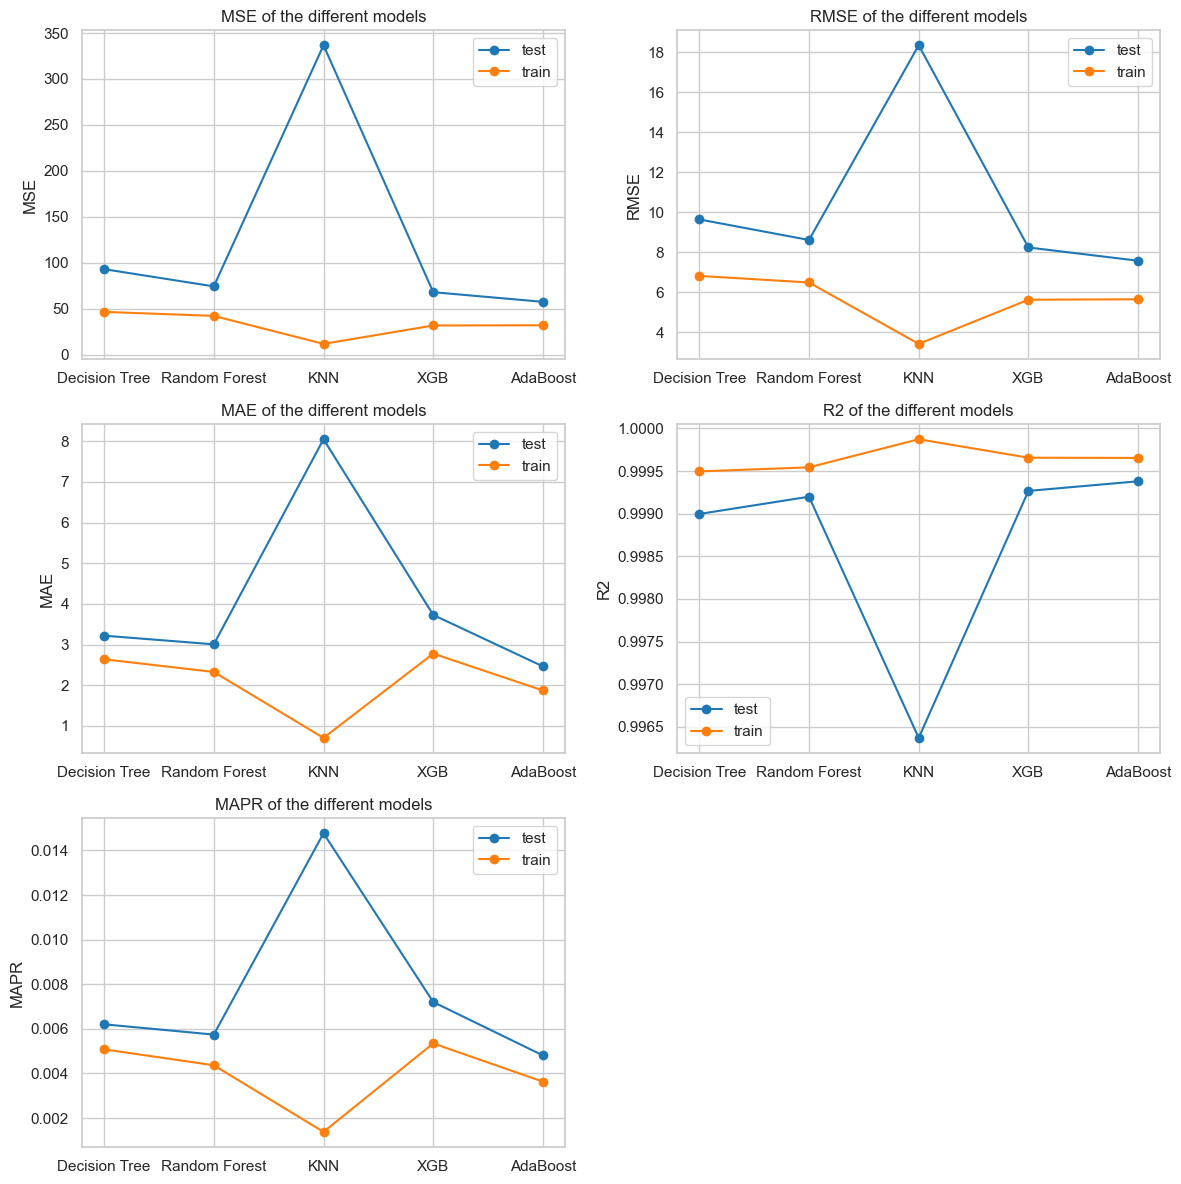

In [55]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e']

# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = test_metrics_plot.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(test_metrics_plot.columns.str.replace(" Test",""), test_metrics_plot.iloc[i], label="test", marker='o', color=colors[0])
    plt.plot(train_metrics_plot.columns.str.replace(" Train",""), train_metrics_plot.iloc[i], label="train", marker='o', color=colors[1])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### 8.2 Predicted vs actual plots <a id="test-predicted-actual"></a>

In the evaluation of machine learning models, two essential visualizations are the predicted vs actual plots and the residual vs predicted values plot. These plots provide valuable insights into the performance, accuracy, and limitations of the models.

The predicted vs actual plot illustrates the relationship between the predicted values and the corresponding actual values of the target variable. By examining the proximity of the data points to the diagonal line, we can assess the accuracy and consistency of the model's predictions. Deviations from the diagonal line indicate discrepancies between the predicted and actual values, guiding us in refining the model and identifying data patterns.

Similarly, the residual vs predicted values plot showcases the relationship between the model's predicted values and the residuals, which represent the differences between the actual and predicted values. This plot helps us understand the nature and distribution of errors made by the model. Examining the patterns in the residuals enables us to identify potential biases, non-linear relationships, or unequal variances in the data, further refining the model's predictions.

Together, these visualizations provide a comprehensive evaluation of the model's performance and uncover valuable insights for model refinement and improvement. By analyzing the predicted vs actual plot and the residual vs predicted values plot, we can assess the model's accuracy, detect systematic errors, and identify areas for further optimization in real-world applications.

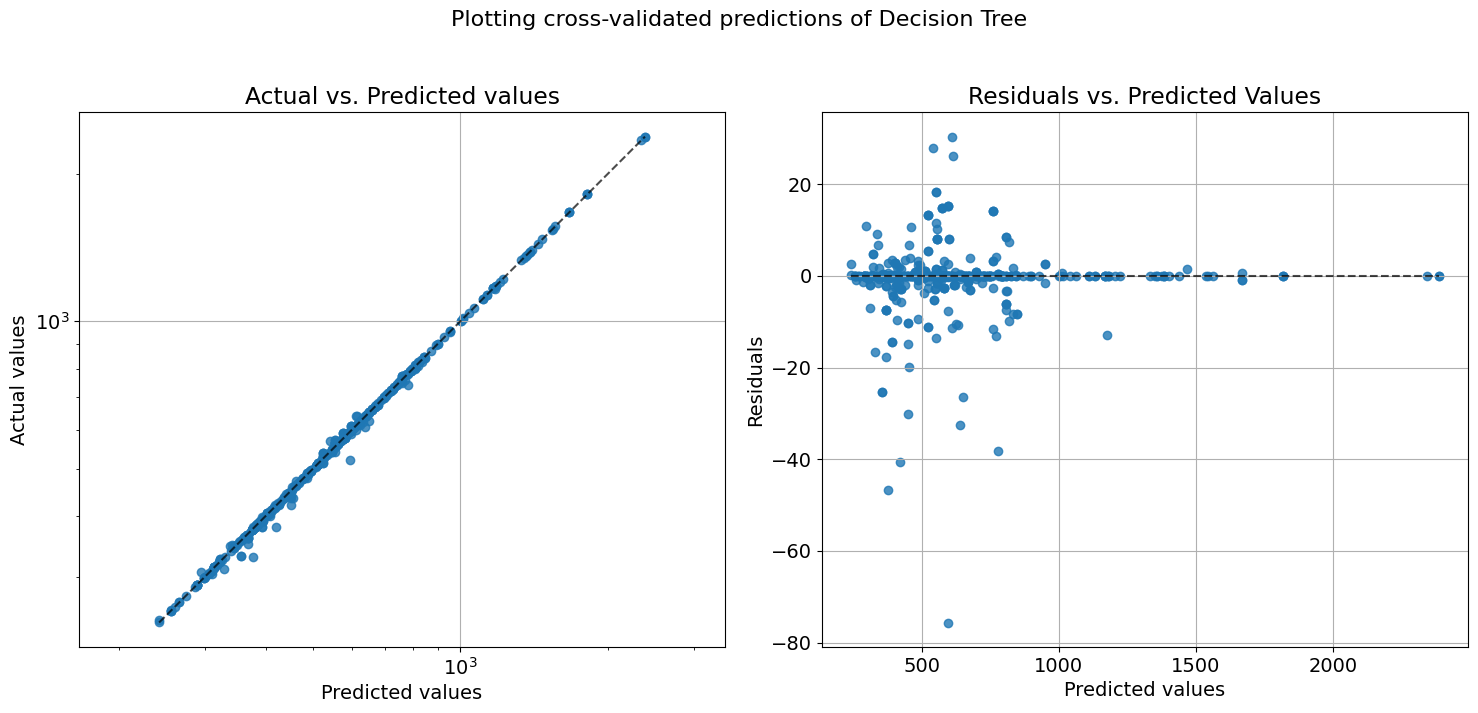

The mean residual of Decision Tree is: 0.27872454235489874


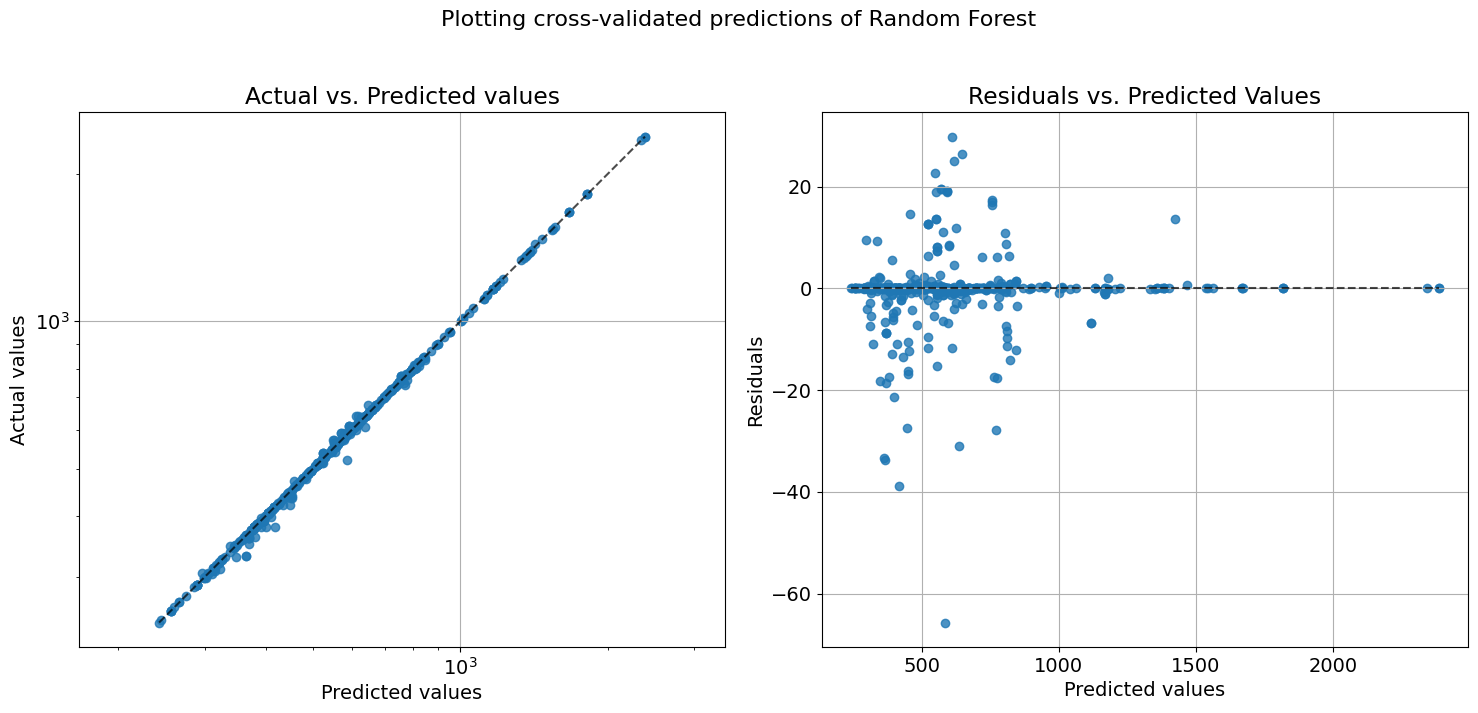

The mean residual of Random Forest is: 0.2560250310969117


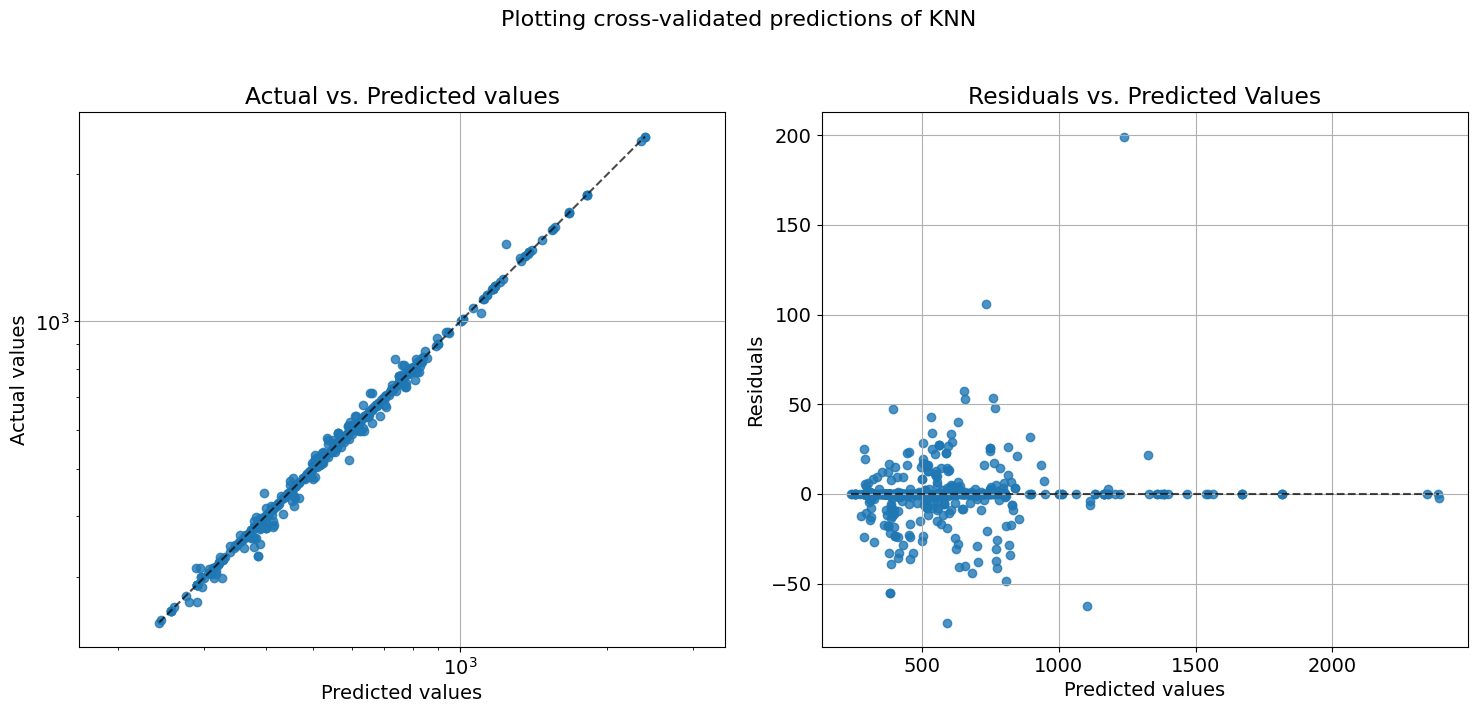

The mean residual of KNN is: 0.2874185173522171


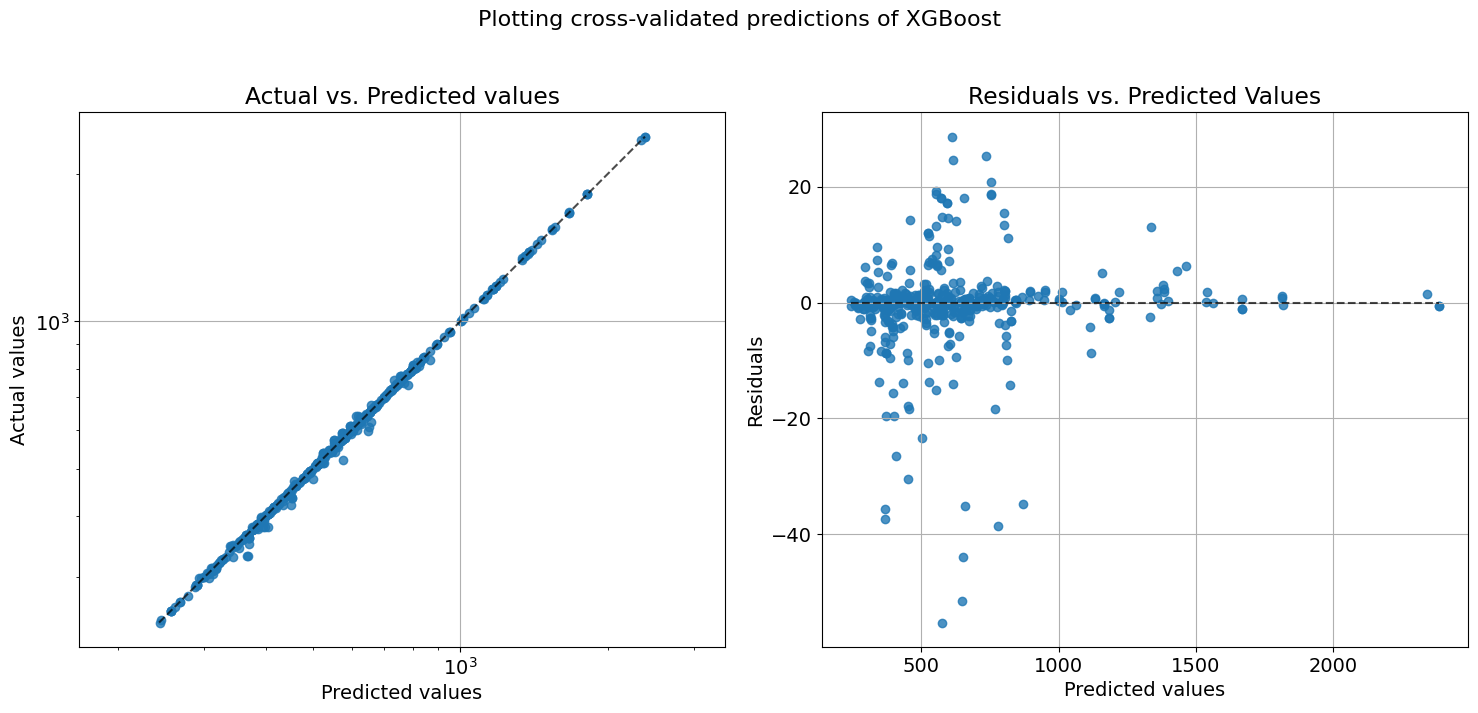

The mean residual of XGBoost is: 0.3873319158775656


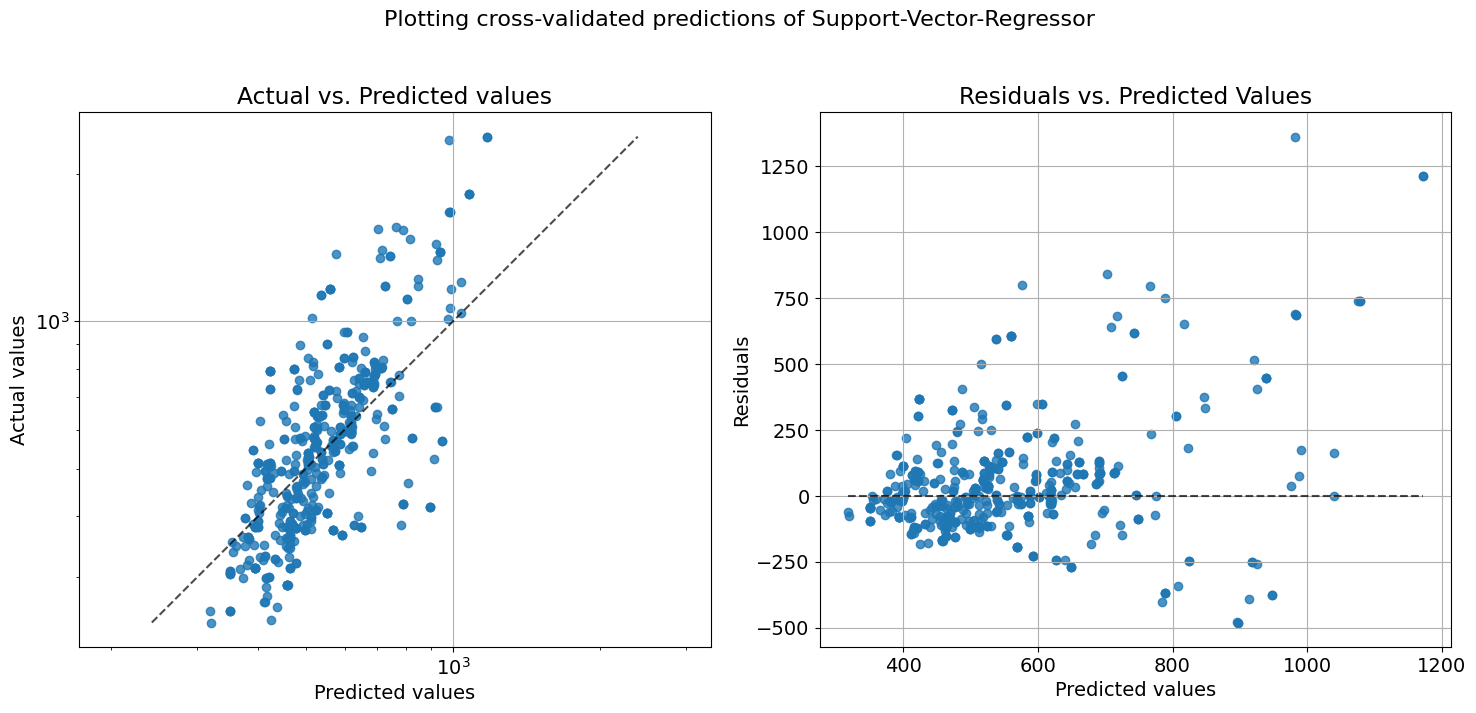

The mean residual of Support-Vector-Regressor is: 41.631615507053944


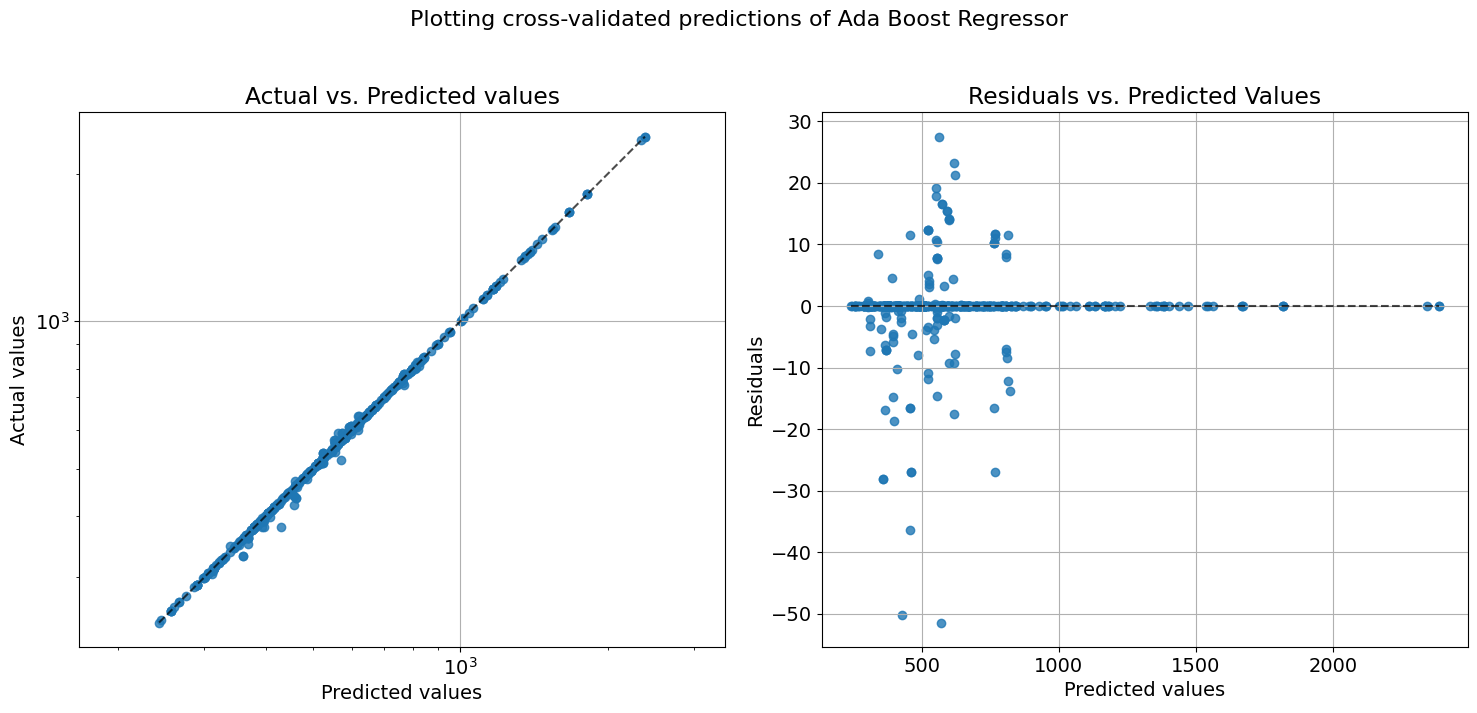

The mean residual of Ada Boost Regressor is: 0.1737747323158299


In [84]:
plotPvA(decisionTree_final, "Decision Tree", X_test, y_test)
plotPvA(randomForest_final, "Random Forest", X_test, y_test)
plotPvA(knn_final, "KNN", X_test, y_test)
plotPvA(xgb_final, "XGBoost", X_test, y_test)
plotPvA(svm_final, "Support-Vector-Regressor", X_test, y_test)
plotPvA(ada_final, "Ada Boost Regressor", X_test, y_test)

## 9 Out of sample performance <a id="osample-performance"></a>

In this section, we analyze the performance of our machine learning models on out-of-sample data. Out-of-sample data refers to data that was not used during the model training and evaluation process. Evaluating the models on out-of-sample data provides a more realistic assessment of their performance and helps us understand how well they can generalize to new, unseen instances.

By examining the performance metrics on the out-of-sample data, we can determine how well our models are likely to perform in real-world scenarios. This evaluation allows us to validate the models' effectiveness, identify any potential issues or limitations, and make informed decisions about their deployment.

### 9.1 Metrics comparison <a id="osample-metrics-comparison"></a>

In [85]:
X_osample = df_osample.drop(TARGET_name,axis=1)
y_osample = df_osample[TARGET_name]

In [86]:
def getMetrics(model,name, X,y):
    metrics = evaluate(model, X, y)
    metrics = pd.DataFrame({name:metrics})
    metrics = metrics.reindex(test_metrics.index)
    return(metrics)

decisionTree_osample_metrics = getMetrics(decisionTree_final, "Decision Tree out of sample", X_osample, y_osample)
randomForest_osample_metrics = getMetrics(randomForest_final, "Random Forest out of sample", X_osample, y_osample)
knn_osample_metrics = getMetrics(knn_final, "KNN out of sample", X_osample, y_osample)
xgb_osample_metrics = getMetrics(xgb_final, "XGB out of sample", X_osample, y_osample)
svm_osample_metrics = getMetrics(svm_final, "SVR out of sample", X_osample, y_osample)
ada_osample_metrics = getMetrics(ada_final, "AdaBoost out of sample", X_osample, y_osample)

In [87]:
osample_metrics = pd.concat([decisionTree_osample_metrics,
                            randomForest_osample_metrics,
                            knn_osample_metrics,
                            xgb_osample_metrics,
                            svm_osample_metrics,
                            ada_osample_metrics],
                            axis=1)

The table provided presents the performance of each model on the out-of-sample dataset, evaluated using various metrics.

In [88]:
osample_metrics

Decision Tree out of sample  Random Forest out of sample   
MSE                     73.118461                    72.311337  \
RMSE                     8.550933                     8.503607   
MAE                      3.240827                     3.124188   
R2                       0.999204                     0.999212   
MAPR                     0.006254                     0.005918   

      KNN out of sample  XGB out of sample  SVR out of sample   
MSE          422.391913          76.123017       49388.193690  \
RMSE          20.552175           8.724851         222.234547   
MAE            8.708540           3.950068         131.664068   
R2             0.995400           0.999171           0.462136   
MAPR           0.015295           0.007532           0.207219   

      AdaBoost out of sample  
MSE                55.101985  
RMSE                7.423071  
MAE                 2.536617  
R2                  0.999400  
MAPR                0.004957

In [90]:
osample_metrics_plot = osample_metrics.drop("SVR out of sample", axis=1)

To facilitate interpretation, the plots below provide visual representations of the models' training, test and out of sample performance. However, it is important to note that the SVM Regressor has been excluded from these plots due to its high errors.

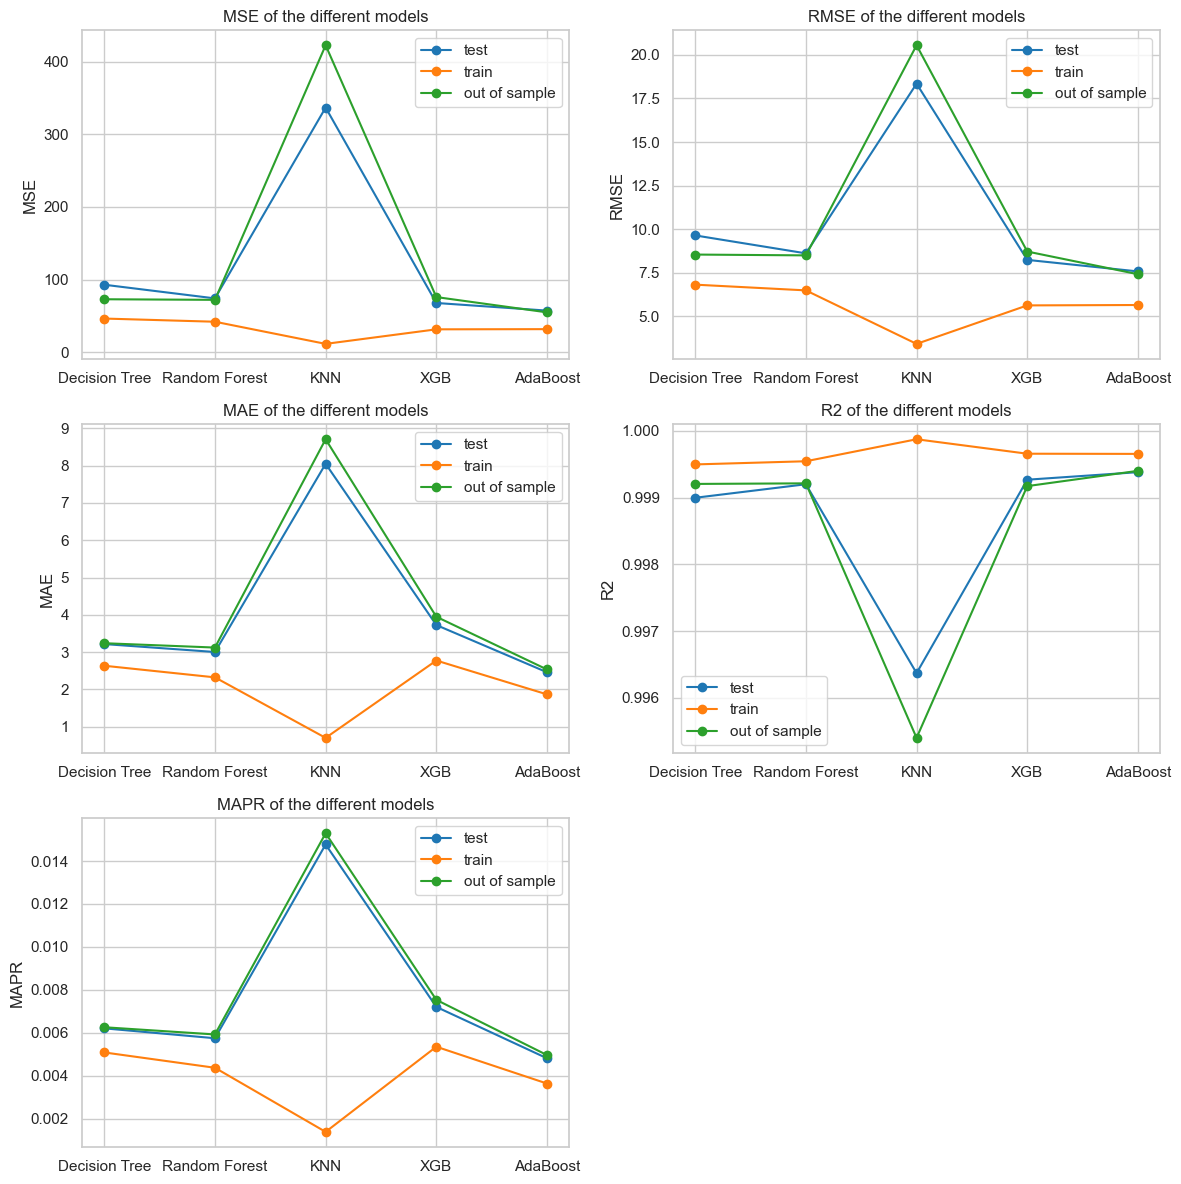

In [91]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']
# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = test_metrics_plot.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(test_metrics_plot.columns.str.replace(" Test",""), test_metrics_plot.iloc[i], label="test", marker='o', color=colors[0])
    plt.plot(train_metrics_plot.columns.str.replace(" Train",""), train_metrics_plot.iloc[i], label="train", marker='o', color=colors[1])
    plt.plot(osample_metrics_plot.columns.str.replace(" out of sample",""), osample_metrics_plot.iloc[i], label="out of sample", marker='o', color=colors[2])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### 9.2 Predicted vs actual plots <a id="osample-predicted-actual"></a>

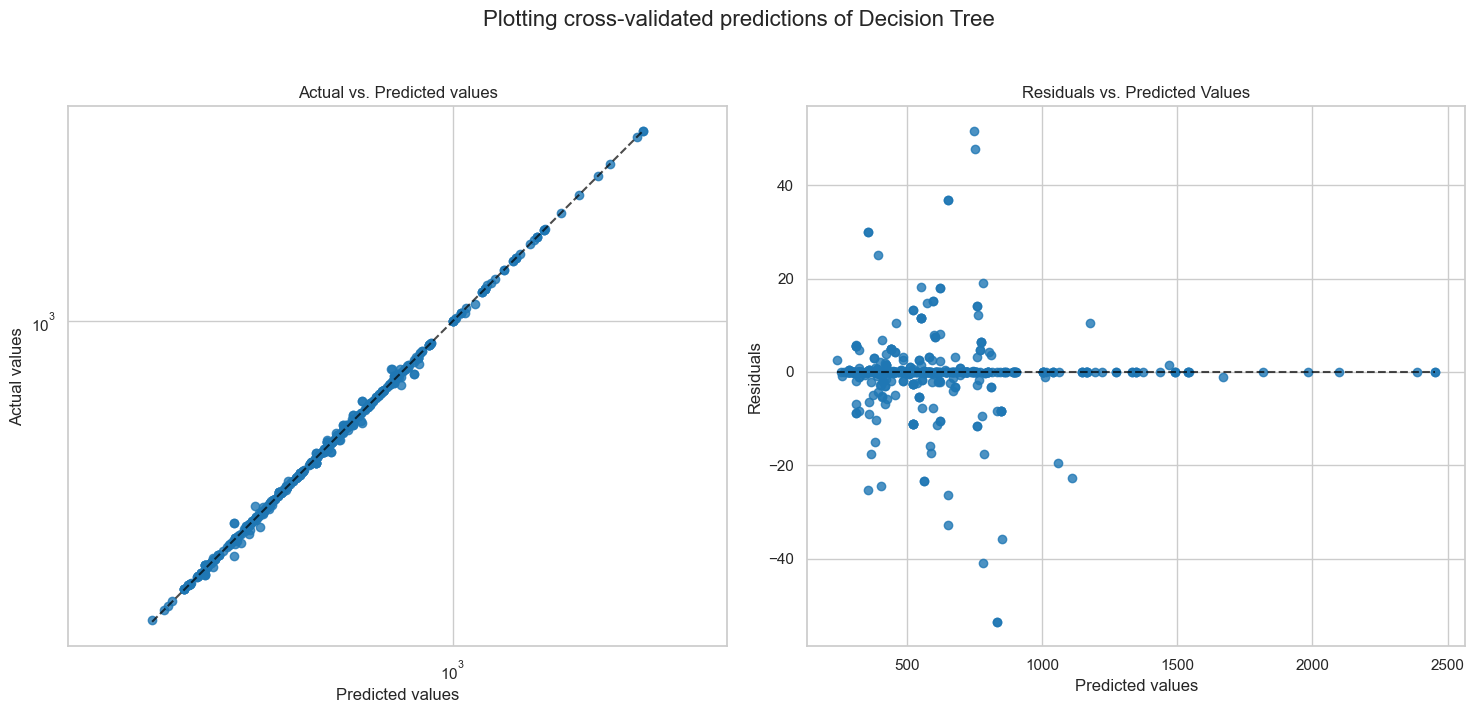

The mean residual of Decision Tree is: -0.22234999227525504


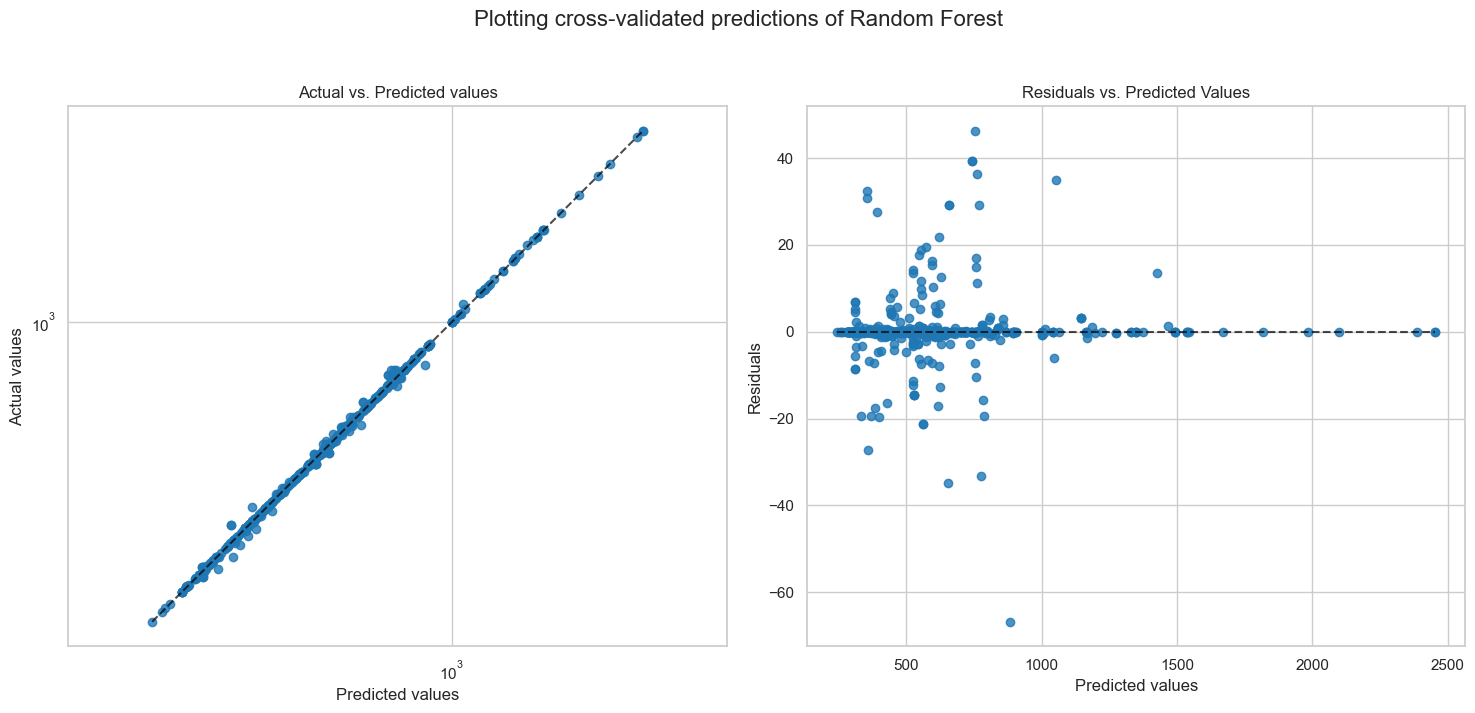

The mean residual of Random Forest is: -0.12240398551644305


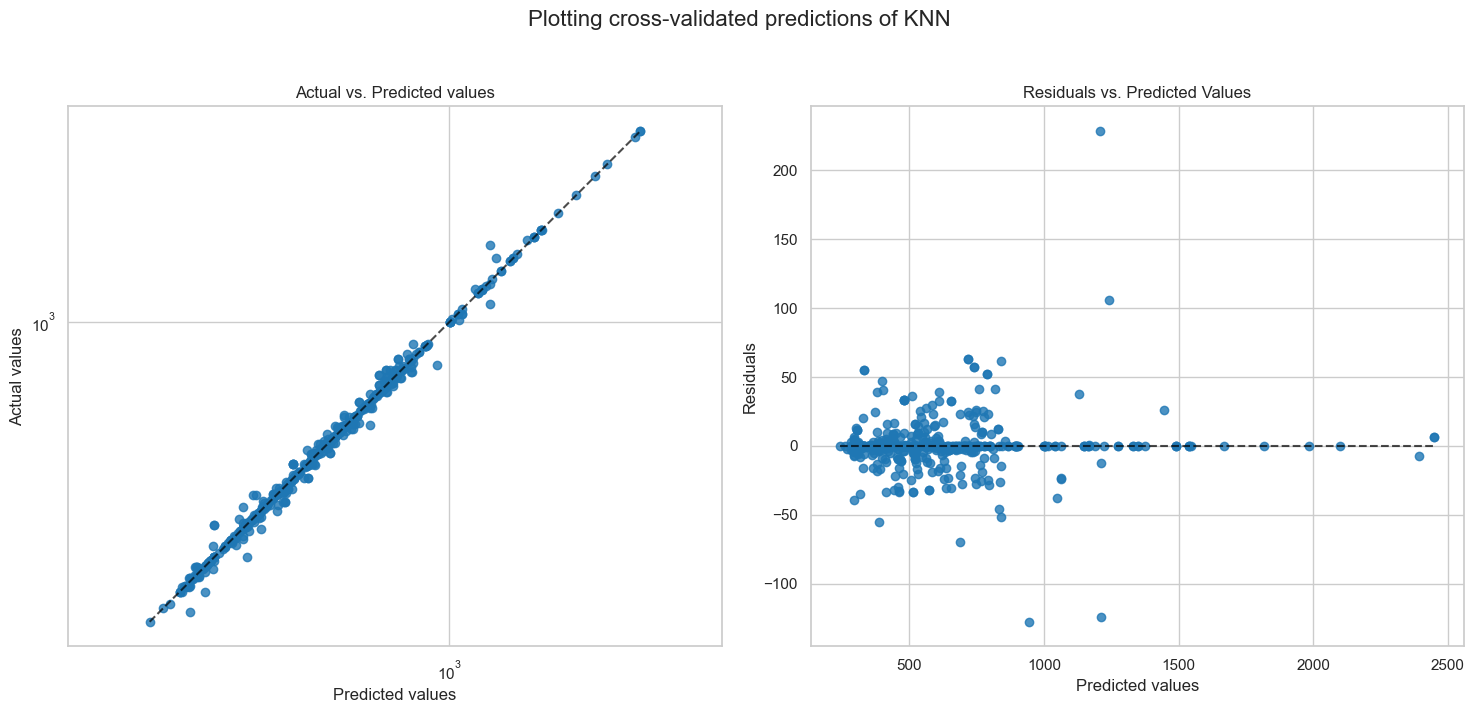

The mean residual of KNN is: -0.1064419259358378


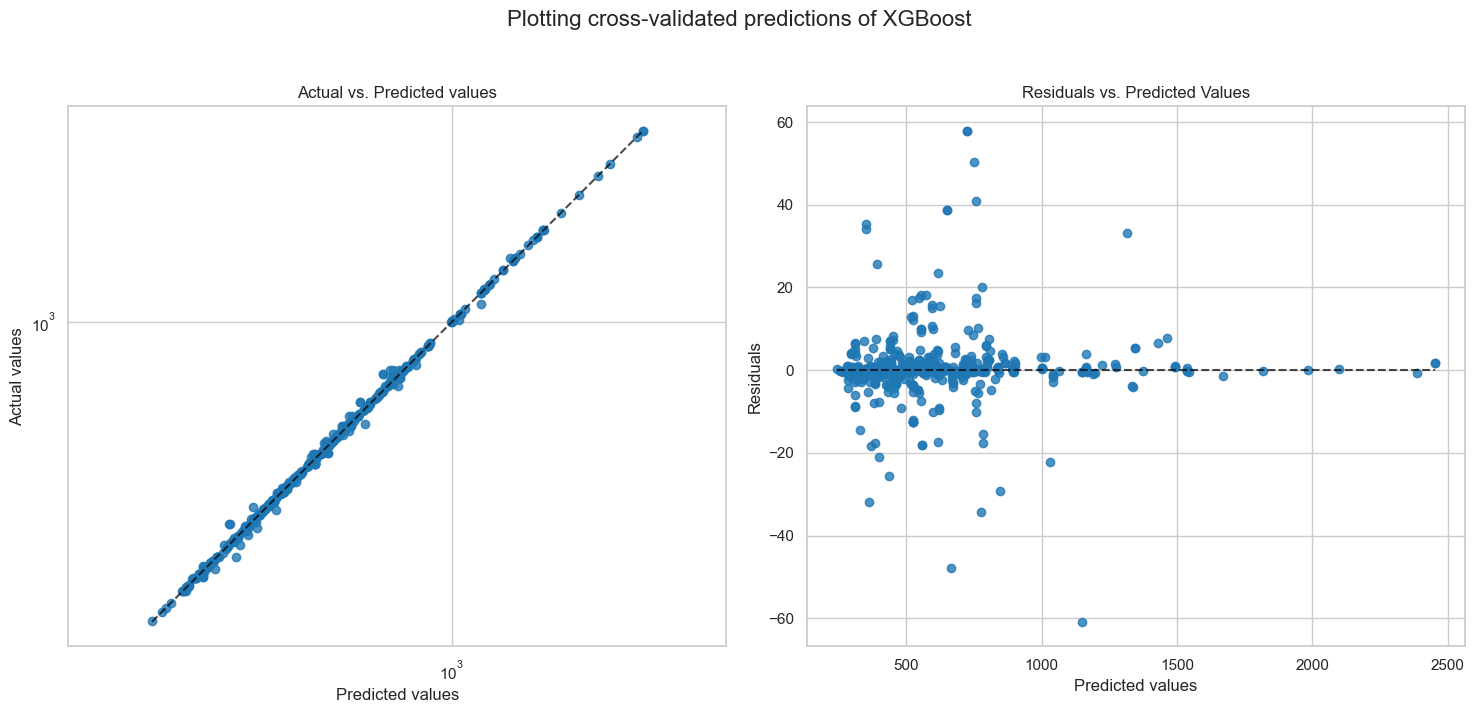

The mean residual of XGBoost is: -0.04810206074006601


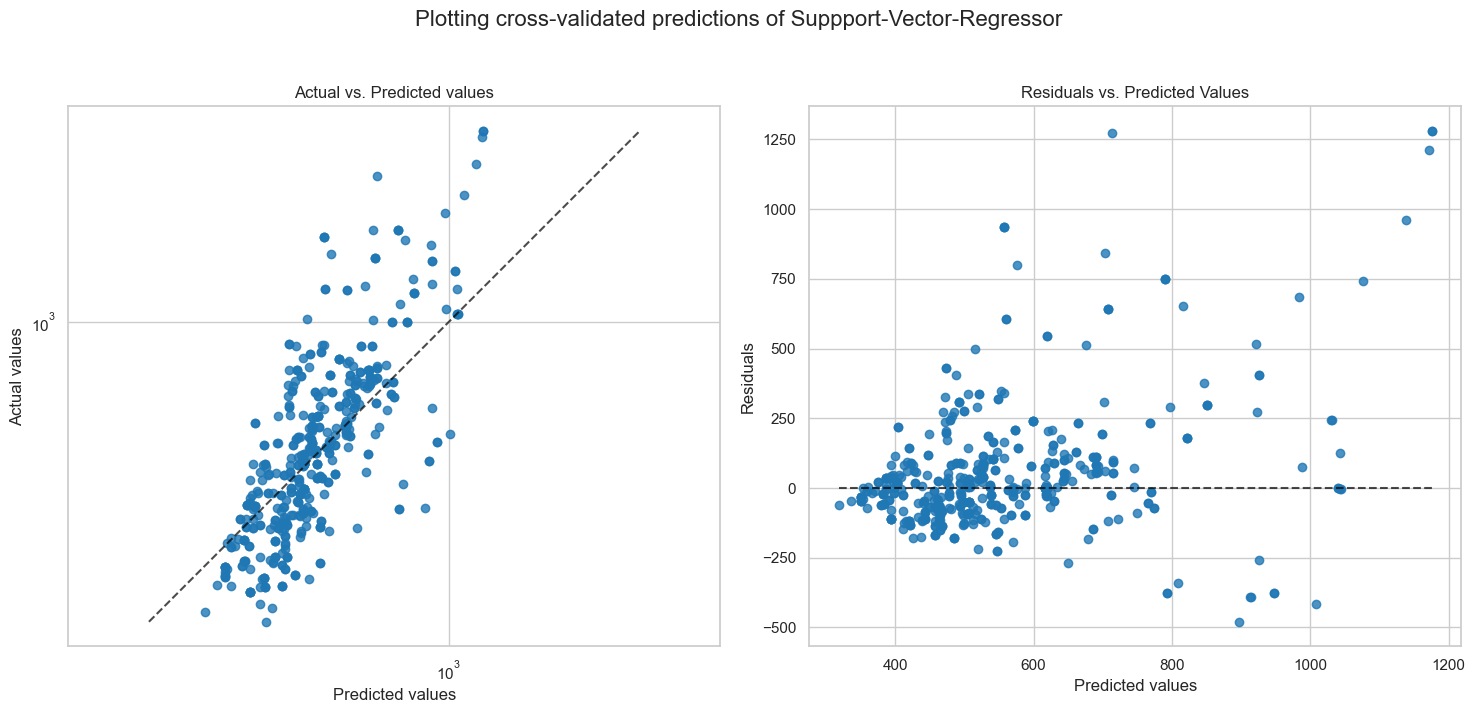

The mean residual of Suppport-Vector-Regressor is: 40.993052932640516


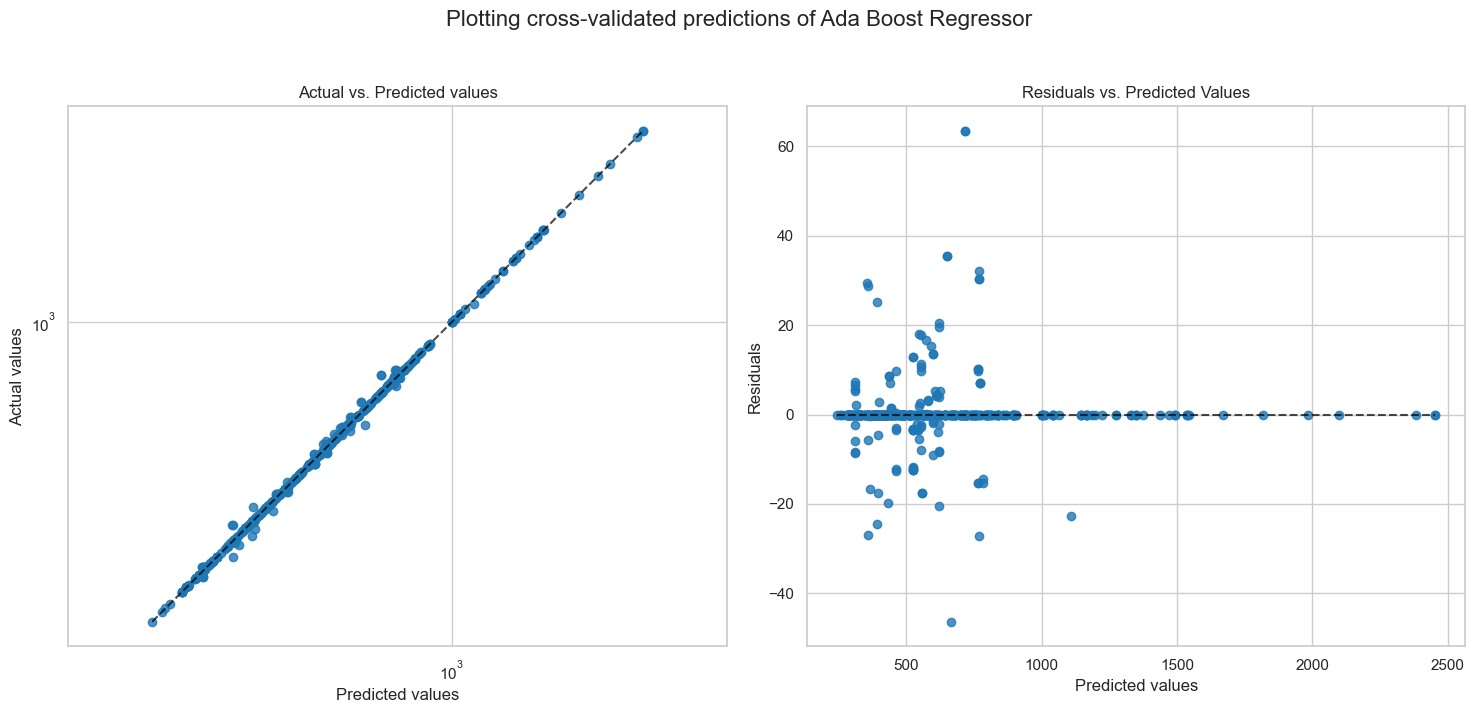

The mean residual of Ada Boost Regressor is: -0.1042347929474167


In [92]:
plotPvA(decisionTree_final, "Decision Tree", X_osample, y_osample)
plotPvA(randomForest_final, "Random Forest", X_osample, y_osample)
plotPvA(knn_final, "KNN", X_osample, y_osample)
plotPvA(xgb_final, "XGBoost", X_osample, y_osample)
plotPvA(svm_final, "Suppport-Vector-Regressor", X_osample, y_osample)
plotPvA(ada_final, "Ada Boost Regressor", X_osample, y_osample)

## 10 Feature Importance Analysis  <a id="feature-importance"></a>

In this section, we delve into evaluating the importance of features in our machine learning models. Understanding the significance of different features can provide valuable insights into their impact on the prediction outcome. We use two methods for feature importance assessment: the SHAP (SHapley Additive exPlanations) library and the built-in feature importance functions.

The SHAP library offers a powerful tool for explaining individual predictions by quantifying the contribution of each feature. It provides a comprehensive view of feature importance by considering all possible feature combinations and their respective contributions. Additionally, we utilize the built-in feature importance functions provided by the selected machine learning models. These functions calculate the relevance of features based on various metrics specific to each algorithm.

In [94]:
def shapPlot(model, data):
    if model in [decisionTree_final, randomForest_final, xgb_final]:
        explainer = shap.TreeExplainer(model["regressor"])
    elif model in [knn_final, svm_final, ada_final]:
        explainer = shap.KernelExplainer(model["regressor"].predict, shap.sample(preprocessor.transform(data), 100))
    else:
        raise ValueError("Unsupported model type.")
    
    shap_values = explainer.shap_values(preprocessor.transform(data))
    shap.summary_plot(shap_values, data, plot_type="bar")

In [95]:
def builtInImportance(model, data):
    importance = model["regressor"].feature_importances_
    
    importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': importance
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot the importances
    plt.figure(figsize=(10, 8))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title('Feature importances in the MODELNAME model')
    plt.show()

### 10.1 Decision tree feature importance <a id="importance-decisiontree"></a>

In [172]:
def importance(model, data, modelname):
    if model in [decisionTree_final, randomForest_final, xgb_final]:
        explainer = shap.TreeExplainer(model["regressor"])
    elif model in [knn_final, svm_final, ada_final]:
        explainer = shap.KernelExplainer(model["regressor"].predict, shap.sample(preprocessor.transform(data), 100))
    else:
        raise ValueError("Unsupported model type.")
    
    shap_values = explainer.shap_values(preprocessor.transform(data))

    importance = model["regressor"].feature_importances_
    
    importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': importance
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Create a 2x2 grid
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(7, 2, width_ratios=[4, 3])

    # Create a subplot for the SHAP summary plot
    ax1 = plt.subplot(gs[:, 0])  # This subplot spans the entire first column
    shap.summary_plot(shap_values, data, plot_type="bar", show=False)
    plt.title('SHAP Summary Plot in the {} Model'.format(modelname))

    # Create a subplot for the seaborn bar plot
    ax2 = plt.subplot(gs[:, 1])  # This subplot spans the entire second column
    sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax2)
    ax2.set_title('Feature Importances in the {} Model'.format(modelname))

    plt.tight_layout()  # Adjust the layout
    clear_output(wait=True)  # Clear the output
    plt.show()  # Show the plots


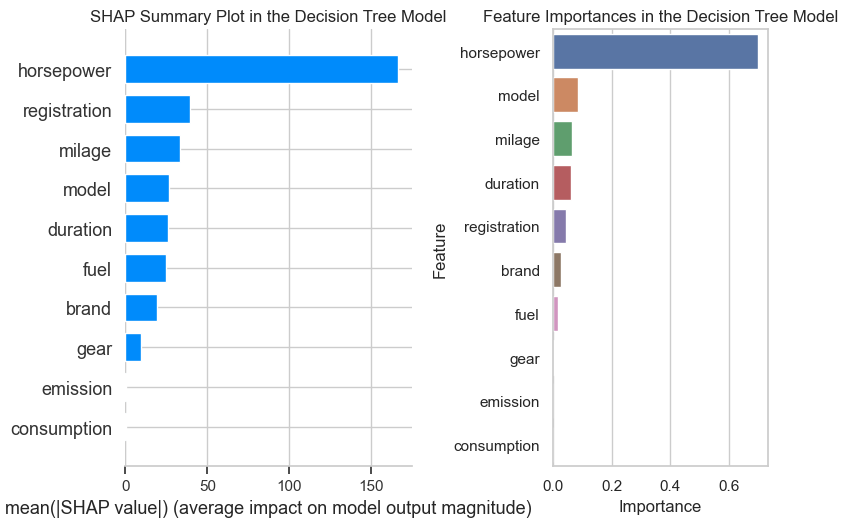

In [173]:
importance(decisionTree_final, X_osample, "Decision Tree")

We have two interpretations of feature importance from a Decision Tree model: one is based on Mean SHapley Additive exPlanations (SHAP) values, and the other is based on the inbuilt feature importance of the model. Both interpretations reveal insights into how features contribute to the model's predictive performance.

'Horsepower' is deemed as the most influential feature in both interpretations. With a SHAP value of over 160 and a feature importance score of about 0.7, it is clear that changes in 'Horsepower' significantly impact the model's predictions. Therefore, 'Horsepower' is a crucial feature for the decision-making process of this model.

The 'Registration' and 'Model' features are identified as the second most important variables, but in different interpretations. 'Registration' has a significant impact according to SHAP values, while 'Model' stands out in the inbuilt feature importance measure. This disparity may be due to the different ways these metrics calculate importance.

'Mileage' and 'Duration' both have comparable importance levels according to SHAP values and the inbuilt feature importance, with values around 30 and 0.06 respectively. This consistency suggests that while these features play a role in the model's decisions, their impact is less substantial compared to 'Horsepower' and 'Registration' or 'Model'.

Lastly, 'Emission' and 'Consumption' have been identified as having negligible influence in both interpretations. Their low SHAP values and feature importance scores suggest that these features contribute minimally to the model's predictive ability.

In summary, 'Horsepower' is the key feature in this model, followed by 'Registration' or 'Model', and then 'Mileage' and 'Duration'. The features 'Emission' and 'Consumption' have little to no impact on the model's decision-making process, indicating potential for simplifying the model without significantly impacting its accuracy. These interpretations can guide feature selection and engineering in future model iterations, and remind us that different feature importance methods may yield different perspectives.

### 10.2 Random forest feature importance <a id="importance-randomForest"></a>

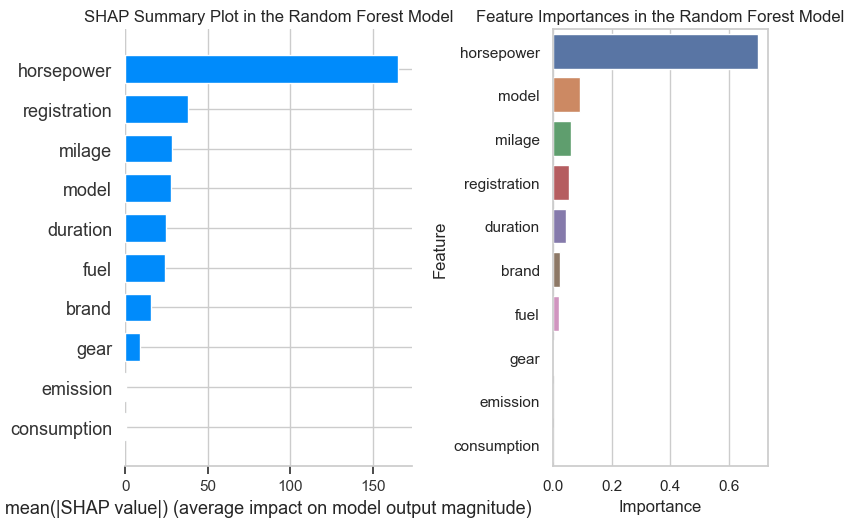

In [174]:
importance(randomForest_final, X_osample, "Random Forest")


From both the Mean SHAP values and the inbuilt feature importance of the Random Forest model, we observe similar patterns:

'Horsepower' is the most influential feature, with high SHAP values (~165) and importance score (~0.7), making it crucial for the model's decision-making.

'Registration' and 'Model' are secondary in importance. The SHAP values highlight 'Registration' more (~40), while the inbuilt importance emphasizes 'Model' more (~0.09).

'Mileage' is similarly impactful in both measures (~35 SHAP, ~0.06 importance), indicating its moderate contribution.

Lastly, 'Emission' and 'Consumption' are negligible in both interpretations, indicating their minimal impact on the model's predictive ability.

### 10.3 XGB feature importance <a id="importance-xgb"></a>

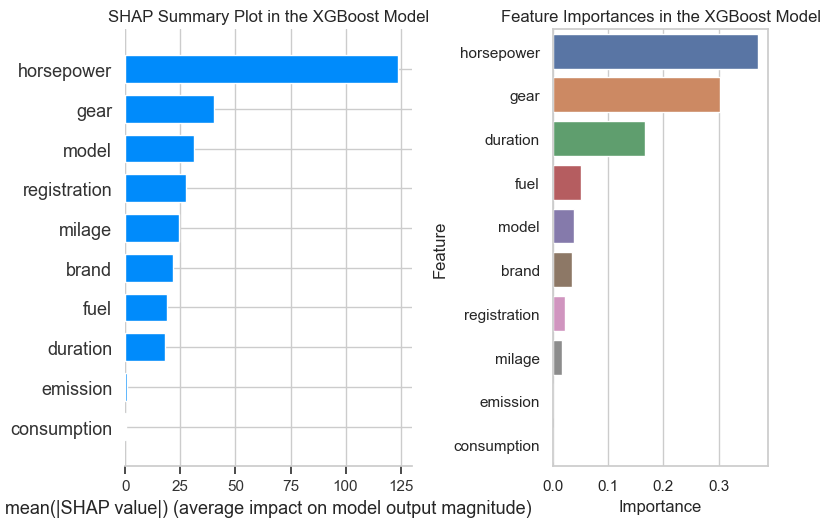

In [175]:
importance(xgb_final, X_osample, "XGBoost")

The interpretations for both Mean SHAP values and the built-in feature importance for the XGBoost model are as follows:

In the SHAP interpretation, 'Horsepower' is the most significant feature (~120), followed by 'Gear' (~40), 'Model' (~30), and 'Registration' (~25). 'Emission' and 'Consumption' are not significant.

The built-in feature importance of XGBoost, often determined by F-score (a measure of how frequently each feature appears in the model splits), indicates a similar importance of 'Horsepower' (~0.35) and 'Gear' (~0.3), followed by 'Duration' (~0.16). Again, 'Emission' and 'Consumption' aren't significant.

So, in both interpretations, 'Horsepower' is paramount, 'Gear' is important, while 'Emission' and 'Consumption' have little influence. The SHAP values emphasize the 'Model' and 'Registration' features, while the built-in importance underscores 'Duration'.

The method to compute this feature importance is through an F-score, which essentially measures how frequently each feature appears in the models created during the boosting process.

In XGBoost, each decision tree is built by repeatedly splitting the data into two groups. Each split involves a single feature at a time. The more frequently a feature is used in making splits across all trees, the higher its F-score, and thus the more important it is considered to be. This is because a feature that is often used for splitting is one that does a good job of separating the data, thereby improving the model's performance.

In your XGBoost model, 'Horsepower' has the highest built-in feature importance, followed by 'Gear' and then 'Duration'. This means that these three features are the ones most often used to split the data in your model, and thus they have the most significant impact on your model's predictions. Conversely, 'Emission' and 'Consumption' are not important, meaning they are rarely used in data splits and have little effect on the predictions.

It's worth noting that while built-in feature importance gives us a good indication of which features are most useful for making predictions, it doesn't tell us anything about the nature of the relationships between these features and the target variable. 

### 10.4 AdaBoost feature importance <a id="importance-ada"></a>

100%|██████████| 2856/2856 [43:21<00:00,  1.10it/s]

[[  15.78760574   23.88782611   64.99084034 ...  -11.73075167
     3.16750577  -32.00647549]
 [  19.25240778  -10.94560616  -18.57310809 ...  -42.68079854
    19.55885616  -18.86740759]
 [-177.22440445  -33.47853882   54.68803795 ...  -47.34926821
   -11.51212315  -15.99079554]
 ...
 [-142.40686064  -78.41915357  -20.52064346 ...   -8.20000184
     3.9158641    11.77362094]
 [-135.53479573  -26.39817339  -19.12514773 ...  -26.43670631
     9.12260014   46.17229391]
 [  19.33702382  -16.6564141   -16.71414699 ...   18.87225968
   -53.46724772   44.82203532]]


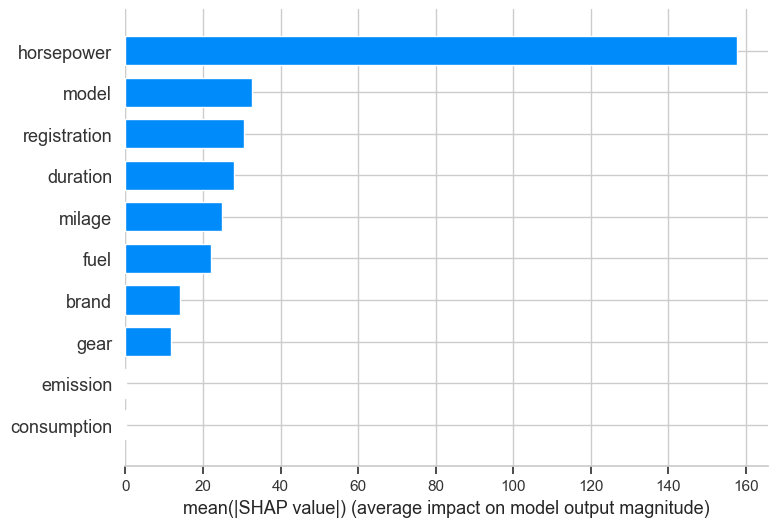

In [72]:
importance(ada_final, X_osample, "Ada Boost")

The interpretations for both Mean SHAP values and the built-in feature importance for the AdaBoost model are as follows:

SHAP values indicate 'Horsepower' as the most significant feature (~160), followed by 'Model' (just below 40), 'Registration' (closely behind 'Model'), and 'Mileage' (~35). 'Emission' and 'Consumption' don't hold significant importance.

The built-in feature importance of AdaBoost, computed based on the weight of the evidence each feature provides across all the decision stumps, shows 'Horsepower' with the highest importance (just below 0.7). 'Model' follows (just below 0.15), and then 'Mileage' and 'Registration' (both ~0.05). Again, 'Emission' and 'Consumption' aren't significant.

The built-in feature importance in AdaBoost is computed based on the contribution of each feature to the weighted error rate of the model. In AdaBoost, each feature is used as a decision stump, and an importance score is calculated for each feature based on how much it decreases the weighted error of the model. The more a feature decreases this weighted error, the more important it is considered to be.

In conclusion, 'Horsepower', 'Model', 'Registration', and 'Mileage' are key features in the AdaBoost model according to both SHAP and built-in feature importance, with 'Emission' and 'Consumption' providing little influence. However, the SHAP and built-in feature importance differ slightly in the relative importance they assign to 'Model', 'Registration', and 'Mileage'.

## 11 Model Selection <a id="selection"></a>

## 12 Graphical User Interface (GUI)<a id="GUI"></a>

## 13 Possible improvements <a id="possible-improvements"></a>

Interaction effects

Build one last model without unimportant variables

## 14 Safe models <a id="safe-models"></a>


To safe all built models, we included a section to write the models into a model folder inside the working directory (the directory where the notebook is located). The models are safed as a ".joblib" file, which according to scikit-learn, is more efficient than pickle.

In [90]:
safe = False

In [192]:
# Specify the file path where you want to save the model
folder='models/current'
models_to_safe = {
    #"decisionTree": decisionTree_final,
    #"randomForest": randomForest_final,
    #"KNN": knn_final,
    #"XGBoost": xgb_final,
    #"SVM": svm_final,
    #"ADA": ada_final
}

def safeModel(models, folder):
    os.makedirs(folder, exist_ok=True)  # Create directory if it doesn't exist
    for key, values in models.items():
        path = folder+f'/{key}.joblib'
        #with open(path, 'wb') as f:
        dump(values, path)

In [193]:
if safe:
    safeModel(models_to_safe,folder)

## 15 Debugging library versions <a id="debugging-libraries"></a>

This short section is supposed to help debug any problems related to python or library versions.

### Sklearn

The used Scikit-learn version has to be >1.2.2, for that the Python environment has to be >3.8!

In [ ]:
try:
    import sklearn
    if(sklearn.__version__!="1.2.2"):
        try:
            !pip install --upgrade numpy==1.23.5
            !pip install --upgrade pandas
            !pip install --upgrade scikit-learn==1.2.2
        except:
            print("Check your Python version. Has to be >3.8!")
            import sys
            print("Your Python version:", sys.version)
except:
    try:
        !pip install scikit-learn==1.2.2
        !pip install --upgrade numpy==1.23.5
    except:
        print("Check your Python version. Has to be >3.8!")
        import sys
        print("Your Python version:", sys.version)

### Pandas

The used Pandas version is 2.0.1

In [ ]:
try:
    import pandas
    if pandas.__version__!='2.0.1':
        !pip install pandas==2.0.1
except:
    !pip pandas numpy==2.0.1

### Numpy

The used numpy version is 1.23.5, which is crucial for using SHAP.

In [ ]:
try:
    import numpy
    if numpy.__version__!="1.23.5":
        !pip install numpy==1.23.5
except:
    !pip install numpy==1.23.5

### Shap

The used shap version is 0.41.0

In [ ]:
try:
    import shap
    if shap.__version__!="0.41.0":
        !pip install --upgrade shap==0.41.0
except:
    !pip install shap
    # For shap, numpy Version has to be <1.24
    !pip install --upgrade numpy == 1.23.5

### Numba, llvmlite (used in shap)

The used Numba version is 0.57.0, for llvmlite it's 0.40.0

In [ ]:
try:
    import numba
    if numba.__version__!="0.57.0":
        !pip install --upgrade numba==0.57.0
except:
    !pip install numba==0.57.0

try:
    import llvmlite
    if llvmlite.__version__!="0.57.0":
        !pip install --upgrade llvmlite==0.40.0
except:
    !pip install llvmlite==0.40.0

False

### XGBoost

The used XGBoost version is 1.7.5

In [ ]:
try:
    import xgboost
except:
    !pip install xgboost

In [ ]:
try:
    import multiprocessing
    import psutil
    import threading
    import time
    import os
except:
    !pip install multiprocessing #'5.9.0'
    !pip install psutil #'5.9.0'
    !pip install threading #
    !pip install time #
    !pip install os #

## References <a id="references"></a>

This work draws inspiration from the master thesis conducted by Thomas Dornigg. To delve deeper into Dornigg's thesis, please refer to the following link:
[Link to Thomas Dornigg's Master Thesis](https://nbviewer.org/github/ThomasD96/University_Repo/blob/master/Nova_SBE/Master_thesis/Credit_Risk_Modeling.ipynb)

- Train/test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- OneHot and ordinal encoding: https://stackoverflow.com/questions/69052776/ordinal-encoding-or-one-hot-encoding
- OneHot vs ordinal encoding: https://github.com/slundberg/shap/issues/397
- XGBoost hyperparameter tuning: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
- get hyperparameters XGBoost: https://stackoverflow.com/questions/69639901/retrieve-hyperparameters-from-a-fitted-xgboost-model-object
- SHAP explained: https://shap.readthedocs.io/en/latest/index.html
- Sklearn documentation: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- Why label encoding should not be used on input data: https://stackoverflow.com/questions/59914210/why-shouldnt-the-sklearn-labelencoder-be-used-to-encode-input-data
- Odrinal encoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
- How shap values would work with OneHot encoding: https://www.reddit.com/r/datascience/comments/s2epy0/computing_categorical_feature_importance_using/
- shap values of categorical variables: https://github.com/slundberg/shap/issues/397
- Looked into parallelizing shap calculations: https://towardsdatascience.com/parallelize-your-massive-shap-computations-with-mllib-and-pyspark-b00accc8667c
- Sklearn Decision Tree Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Sklearn AdaBoost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
- Sklearn Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Sklearn KNN Regrossor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- Sklearn SVR: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- XGBoost CUDA GPU acceleration: https://xgboost.readthedocs.io/en/stable/gpu/index.html
- XGBoost: https://xgboost.readthedocs.io/en/stable/index.html


- Sklearn Decision Tree Regression explained: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- Support Vector Machines explained: https://en.wikipedia.org/wiki/Support_vector_machine


- XGBoost feature importance: https://mljar.com/blog/feature-importance-xgboost/#:~:text=About%20Xgboost%20Built%2Din%20Feature%20Importance&text=You%20can%20check%20the%20type,is%20used%20to%20split%20data.
- Feature importance explained with shap: https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/


## Appendix <a id="appendix"></a>

The appendix contains a variety of methods that we explored prior to settling on the current approach.

### A1 Encoding differences <a id="a1"></a>

As we progressed in the creation of this machine learning notebook, we shifted from OneHot encoding to ordinal encoding. Notably, while some algorithms, like tree-based models, demonstrate adaptability to the choice of encoding, others show heightened sensitivity. In particular, Support Vector Machine (SVM) and Support Vector Regression (SVR) algorithms can be influenced by the biases initiated by varying encoding techniques. This sensitivity emanates from the dependency of SVM and SVR on vector geometry, where actual geometric distances between data points significantly impact their computational process.

In [82]:
encoder = "OneHot"

In [88]:
if encoder =="OneHot":
    print("OneHot encoding is used.")
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='error', sparse_output=False, drop = 'first'))])

    preprocessor = ColumnTransformer(
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)    
        ])

    preprocessor.fit(X_train)

    cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    columns_pipeline = np.append(cat_columns, numeric_features)

    modelfolder = "models/OneHot"

else:
    print("Ordinal encoding is used.")
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ordinal', OrdinalEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)    
        ])

    preprocessor.fit(X_train)

    cat_columns = preprocessor.named_transformers_['cat']['ordinal'].get_feature_names_out(categorical_features)
    columns_pipeline = np.append(cat_columns, numeric_features)

    

OneHot encoding is used.


#### Decision Tree

In [91]:
decisionTree_OneHot = load(f'{modelfolder}/decisionTree.joblib')

train_metrics = evaluate(decisionTree_OneHot, X_train, y_train)
test_metrics = evaluate(decisionTree_OneHot, X_test, y_test)

# create a dataframe from metrics
decisionTree_OneHot_metrics = pd.DataFrame({'Decision Tree Train OneHot':train_metrics, 'Decision Tree Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(decisionTree_OneHot_metrics)


Evaluation Metrics:
      Decision Tree Train OneHot  Decision Tree Test OneHot
MSE                    48.476505                  93.750237
RMSE                    6.962507                   9.682471
MAE                     2.607555                   3.232638
R2                      0.999476                   0.998989
MAPR                    0.005063                   0.006260


In [92]:
print(decisionTree_OneHot["regressor"].get_params())

{'ccp_alpha': 0.05648616489184735, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 2023, 'splitter': 'best'}


#### Random Forest

In [93]:
randomForest_OneHot = load(f'{modelfolder}/randomForest.joblib')

train_metrics = evaluate(randomForest_OneHot, X_train, y_train)
test_metrics = evaluate(randomForest_OneHot, X_test, y_test)

# create a dataframe from metrics
randomForest_OneHot_metrics = pd.DataFrame({'Random Forest Train OneHot':train_metrics, 'Random Forest Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(randomForest_OneHot_metrics)


Evaluation Metrics:
      Random Forest Train OneHot  Random Forest Test OneHot
MSE                    69.837894                 103.283831
RMSE                    8.356907                  10.162865
MAE                     2.975286                   3.694924
R2                      0.999244                   0.998886
MAPR                    0.005342                   0.006765


In [94]:
print(randomForest_OneHot["regressor"].get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 40, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': 2023, 'verbose': 0, 'warm_start': False}


#### KNN

In [95]:
knn_OneHot = load(f'{modelfolder}/KNN.joblib')


train_metrics = evaluate(knn_final, X_train, y_train)
test_metrics = evaluate(knn_final, X_test, y_test)

# create a dataframe from metrics
knn_OneHot_metrics = pd.DataFrame({'KNN Train OneHot':train_metrics, 'KNN Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(knn_OneHot_metrics)


Evaluation Metrics:
      KNN Train OneHot  KNN Test OneHot
MSE          11.761946       336.703067
RMSE          3.429569        18.349470
MAE           0.702970         8.051065
R2            0.999873         0.996370
MAPR          0.001378         0.014772


#### XGB

In [96]:
xgb_OneHot = load(f'{modelfolder}/XGBoost.joblib')

train_metrics = evaluate(xgb_OneHot, X_train, y_train)
test_metrics = evaluate(xgb_OneHot, X_test, y_test)

# Create a DataFrame from metrics
xgb_OneHot_metrics = pd.DataFrame({'XGB Train OneHot': train_metrics, 'XGB Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(xgb_OneHot_metrics)


Evaluation Metrics:
      XGB Train OneHot  XGB Test OneHot
MSE          30.026445        65.719158
RMSE          5.479639         8.106735
MAE           2.533013         3.429232
R2            0.999675         0.999291
MAPR          0.004893         0.006648


In [97]:
print(xgb_OneHot["regressor"].get_xgb_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.75, 'eval_metric': None, 'gamma': 0.35, 'gpu_id': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.06, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 50, 'max_leaves': None, 'min_child_weight': 2, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': 30, 'reg_lambda': 0.01, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.7, 'tree_method': 'gpu_hist', 'validate_parameters': None, 'verbosity': None}


#### SVR

In [98]:
svm_OneHot = load(f'{modelfolder}/SVM.joblib')

train_metrics = evaluate(svm_OneHot, X_train, y_train)
test_metrics = evaluate(svm_OneHot, X_test, y_test)

# Create a DataFrame from metrics
svm_OneHot_metrics = pd.DataFrame({'SVR Train OneHot': train_metrics, 'SVR Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(svm_OneHot_metrics)



Evaluation Metrics:
      SVR Train OneHot  SVR Test OneHot
MSE         667.777238       970.165947
RMSE         25.841386        31.147487
MAE           9.413403        11.768888
R2            0.992775         0.989541
MAPR          0.015477         0.019455


#### ADA

In [100]:
ada_OneHot = load(f'{modelfolder}/ADA.joblib')

train_metrics = evaluate(ada_OneHot, X_train, y_train)
test_metrics = evaluate(ada_OneHot, X_test, y_test)

# Create a DataFrame from metrics
ada_OneHot_metrics = pd.DataFrame({'AdaBoost Train OneHot': train_metrics, 'AdaBoost Test OneHot': test_metrics})

print("\nEvaluation Metrics:")
print(ada_OneHot_metrics)



Evaluation Metrics:
      AdaBoost Train OneHot  AdaBoost Test OneHot
MSE               52.522797             78.499650
RMSE               7.247261              8.860003
MAE                3.231612              3.828675
R2                 0.999432              0.999154
MAPR               0.006258              0.007509


In [101]:
def getMetrics(model,name, X,y):
    metrics = evaluate(model, X, y)
    metrics = pd.DataFrame({name:metrics})
    metrics = metrics.reindex(osample_metrics.index)
    return(metrics)

decisionTree_OneHot_osample_metrics = getMetrics(decisionTree_OneHot, "Decision Tree OneHot out of sample", X_osample, y_osample)
randomForest_OneHot_osample_metrics = getMetrics(randomForest_OneHot, "Random Forest OneHot out of sample", X_osample, y_osample)
knn_osample_OneHot_metrics = getMetrics(knn_OneHot, "KNN OneHot out of sample", X_osample, y_osample)
xgb_osample_OneHot_metrics = getMetrics(xgb_OneHot, "XGB OneHot out of sample", X_osample, y_osample)
svm_osample_OneHot_metrics = getMetrics(svm_OneHot, "SVR OneHot out of sample", X_osample, y_osample)
ada_osample_OneHot_metrics = getMetrics(ada_OneHot, "AdaBoost OneHot out of sample", X_osample, y_osample)

In [102]:
OneHot_osample_metrics = pd.concat([decisionTree_OneHot_osample_metrics,
                            randomForest_OneHot_osample_metrics,
                            knn_osample_OneHot_metrics,
                            xgb_osample_OneHot_metrics,
                            svm_osample_OneHot_metrics,
                            ada_osample_OneHot_metrics],
                            axis=1)

In [103]:
OneHot_osample_metrics

Decision Tree OneHot out of sample  Random Forest OneHot out of sample   
MSE                            85.453642                          152.434609  \
RMSE                            9.244114                           12.346441   
MAE                             3.280833                            3.948012   
R2                              0.999069                            0.998340   
MAPR                            0.006384                            0.006931   

      KNN OneHot out of sample  XGB OneHot out of sample   
MSE                 479.256187                 81.498908  \
RMSE                 21.891921                  9.027675   
MAE                   9.504964                  3.590986   
R2                    0.994781                  0.999112   
MAPR                  0.016871                  0.006816   

      SVR OneHot out of sample  AdaBoost OneHot out of sample  
MSE                 897.724242                      72.393034  
RMSE                 29.962047                       8.508410  
MAE                  12.000658                       3.842671  
R2                    0.990223                       0.999212  
MAPR                  0.019398                       0.007510

In [105]:
OneHot_osample_metrics_plot = OneHot_osample_metrics.drop("SVR OneHot out of sample", axis=1)
osample_metrics_plot2 = osample_metrics.drop("SVR out of sample", axis=1)

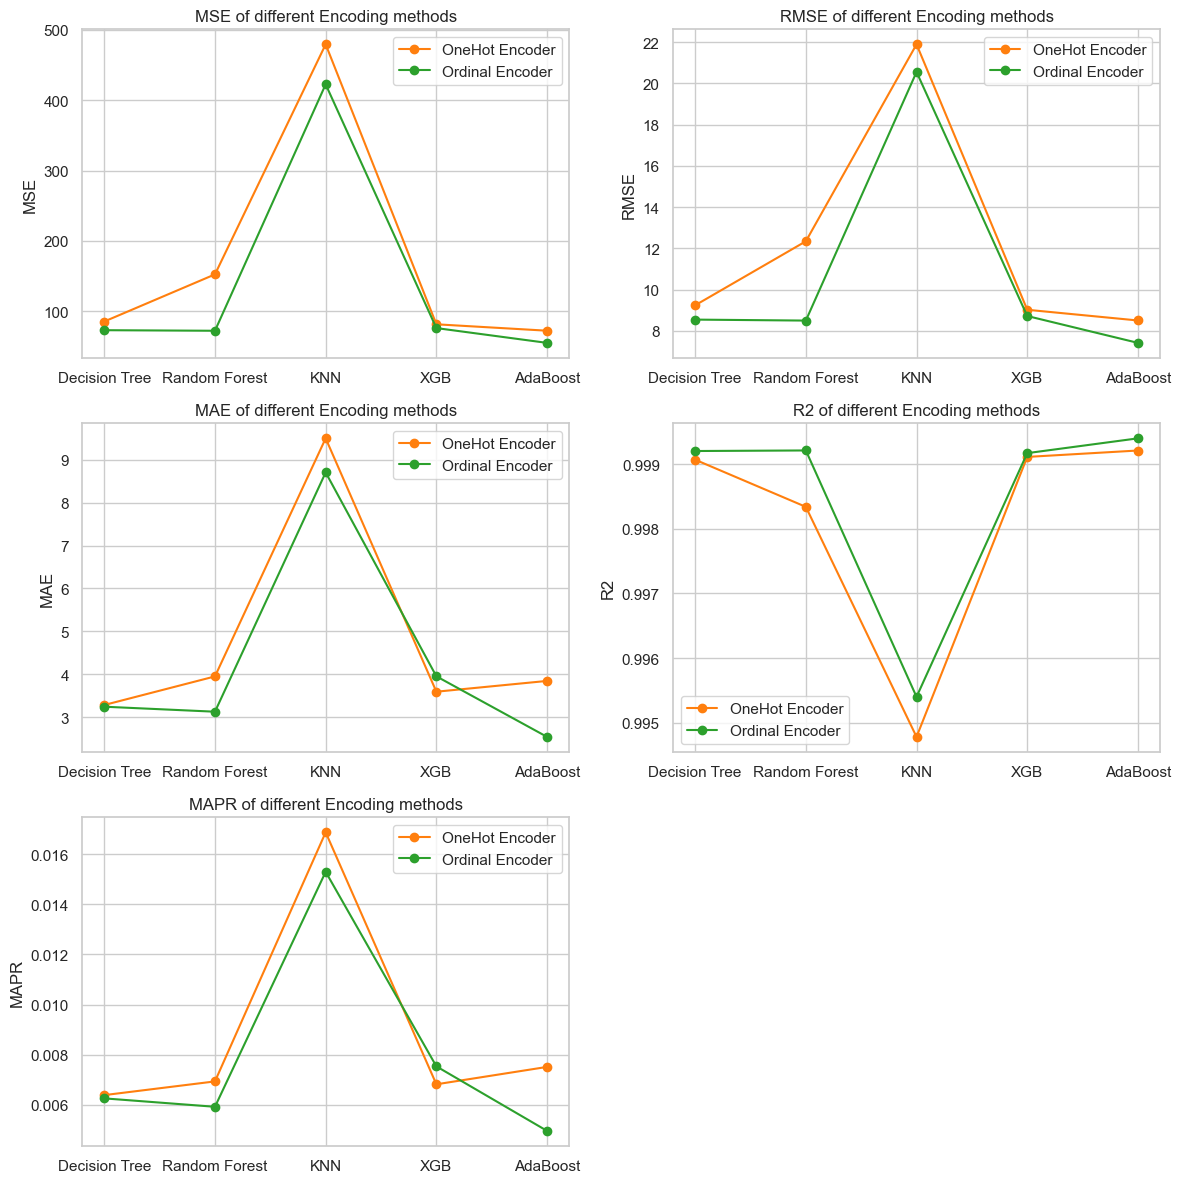

In [106]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']
# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = osample_metrics.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    #plt.plot(test_metrics_plot.columns.str.replace(" Test",""), test_metrics_plot.iloc[i], label="test", marker='o', color=colors[0])
    #plt.plot(train_metrics_plot.columns.str.replace(" Train",""), train_metrics_plot.iloc[i], label="train", marker='o', color=colors[1])
    plt.plot(OneHot_osample_metrics_plot.columns.str.replace(" OneHot out of sample",""), OneHot_osample_metrics_plot.iloc[i], label="OneHot Encoder", marker='o', color=colors[1])
    plt.plot(osample_metrics_plot2.columns.str.replace(" out of sample",""), osample_metrics_plot2.iloc[i], label="Ordinal Encoder", marker='o', color=colors[2])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of different Encoding methods")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


With the additional consideration that less hyperparameter tuning was performed on models with OneHot encoding compared to Ordinal encoding, some of the performance differences could be attributed to this imbalance in optimization efforts.

OneHot encoding, while it can lead to a high dimensionality due to the creation of additional binary features, tends to perform better in algorithms such as XGB and AdaBoost as per the observed metrics. However, the hyperparameters for these models may not be as well-tuned as those using Ordinal encoding, potentially affecting the performance comparisons.

Ordinal encoding, on the other hand, reduces dimensionality and appears to perform better in Decision Trees and Random Forest models based on the metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). These models may have been more fine-tuned, providing a more optimized performance.

The Support Vector Machine (SVM) model is notably sensitive to Ordinal encoding, experiencing a significant increase in error rates (MSE, RMSE, and MAE). This is likely because the inherent ranking in Ordinal encoding may distort the data space for SVM, impacting its ability to find an optimal hyperplane.

K-Nearest Neighbors (KNN) model is seemingly insensitive to the type of encoding used. However, the performance could potentially improve with more rigorous hyperparameter tuning in the OneHot encoded model.

Overall, it's essential to note that any performance comparison between the models should account for the potential influence of hyperparameter tuning. The observed differences may not solely be due to the choice of encoding method but also the level of optimization for each model. Thus, for a more accurate assessment, it would be beneficial to ensure equal hyperparameter tuning efforts for both OneHot- and Ordinal-encoded models.

### A2 Bar plots Test Performance <a id="a2"></a>

In [ ]:
def plotBars(metrics_input):
    #Define the evaluation metrics and their values
    metrics = metrics_input.index
    models = metrics_input.columns
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']

    # Set the figure size and create subplots
    fig, axs = plt.subplots(len(metrics) // 3, 3, figsize=(15, 6 * (len(metrics) // 3)))

    # Set the width of the bars
    bar_width = 0.25

    # Set the positions of the bars on the x-axis

    test_r = np.arange(len(models))
    # train_r = np.arange(len(models))
    # test_r = [x + bar_width/2 for x in r1]
    # Create a bar plot for each evaluation metric
    for i, metric in enumerate(metrics):
        test_values = None
        test_values = metrics_input.loc[metric].values


        # Check if values exist for all models
        if test_values.any() and len(test_values) == len(models):
            row = i // 3  # Determine the row index
            col = i % 3   # Determine the column index
            
            ax = axs[row, col]  # Get the corresponding subplot
            
            # Create a bar plot for each model with different color
            for j in range(len(test_values)):

                # ax.bar(train_r[j], train_values[j], width=bar_width, edgecolor='black', color=colors[j])
                ax.bar(test_r[j], test_values[j], width=bar_width, edgecolor='black', color=colors[j])
                
            
            # Set the labels, title, and ticks for the subplot
            ax.set_xlabel('Model')
            ax.set_ylabel(metric)
            ax.set_title(f'{metric} Comparison')
            ax.set_xticks(test_r)
            ax.set_xticklabels(models.str.strip(" Test"))

            # Adjust the spacing for long x-axis tick labels
            ax.set_xticks(test_r)
            ax.set_xticklabels(models.str.strip(" Test"), rotation=45, ha='right')
            plt.subplots_adjust(bottom=0.5)  # Increase the bottom margin if needed
            # Rotating the x-axis tick labels by 45 degrees for each subplot
            #ax.tick_params(axis='x', rotation=45)

            # Scale the y-axis to better visualize differences
            max_value = np.max(test_values)
            min_value = np.min(test_values)
            ax.set_ylim([min_value - 0.1 * abs(max_value), max_value + 0.1 * abs(max_value)])

            
        
    # Adjust the spacing between subplots
    plt.tight_layout()



    # Show the plot
    plt.show()

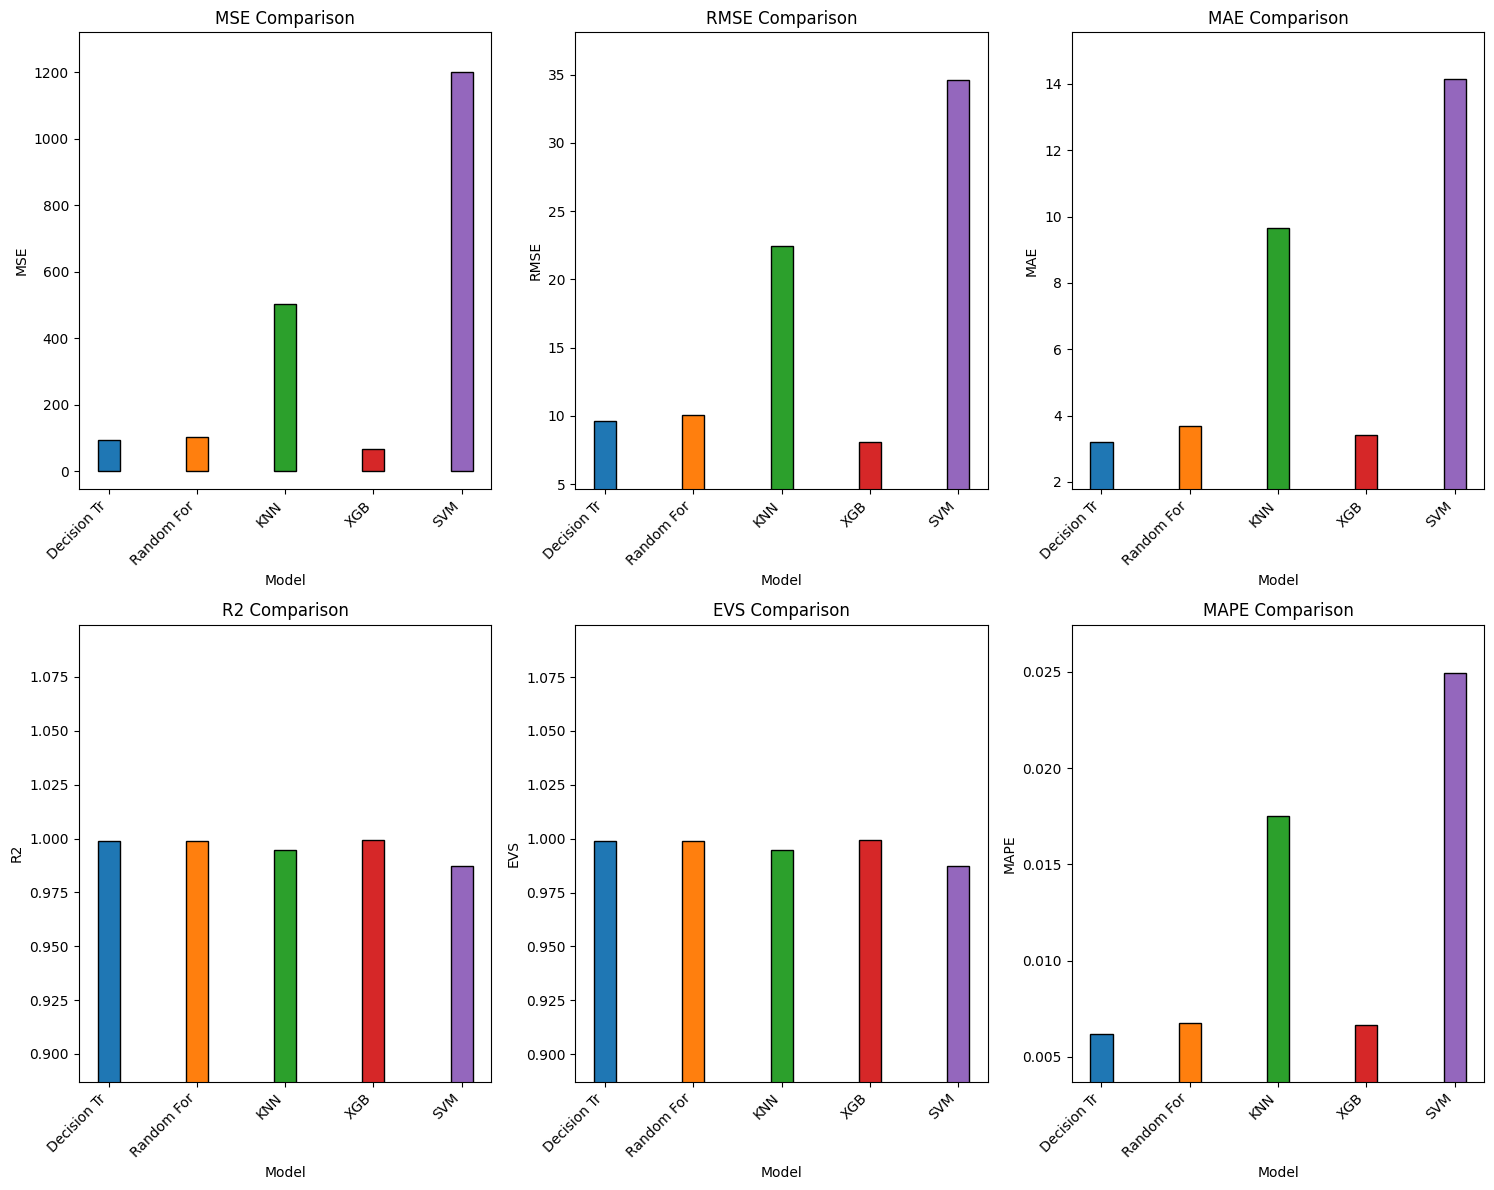

In [ ]:
plotBars(test_metrics)

### A3 Bar plots Out of sample Performance <a id="a3"></a>

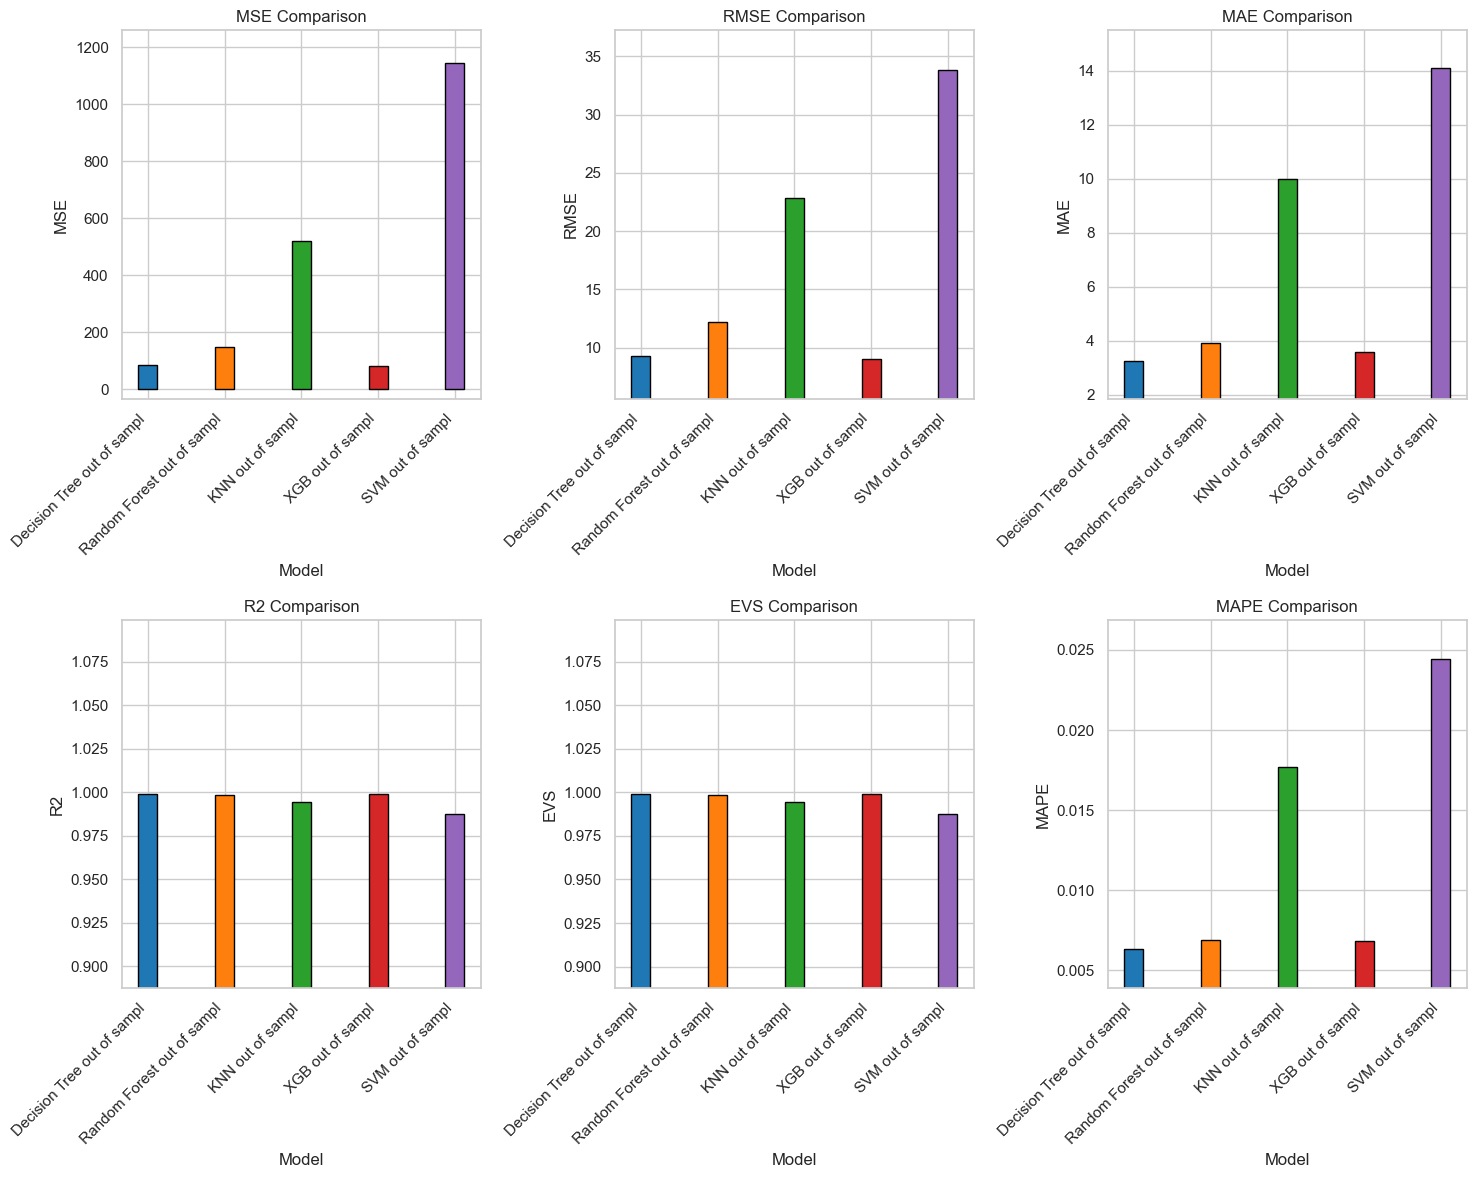

In [ ]:
plotBars(osample_metrics)

### A4 Histogram of residuals test performance <a id="a4"></a>

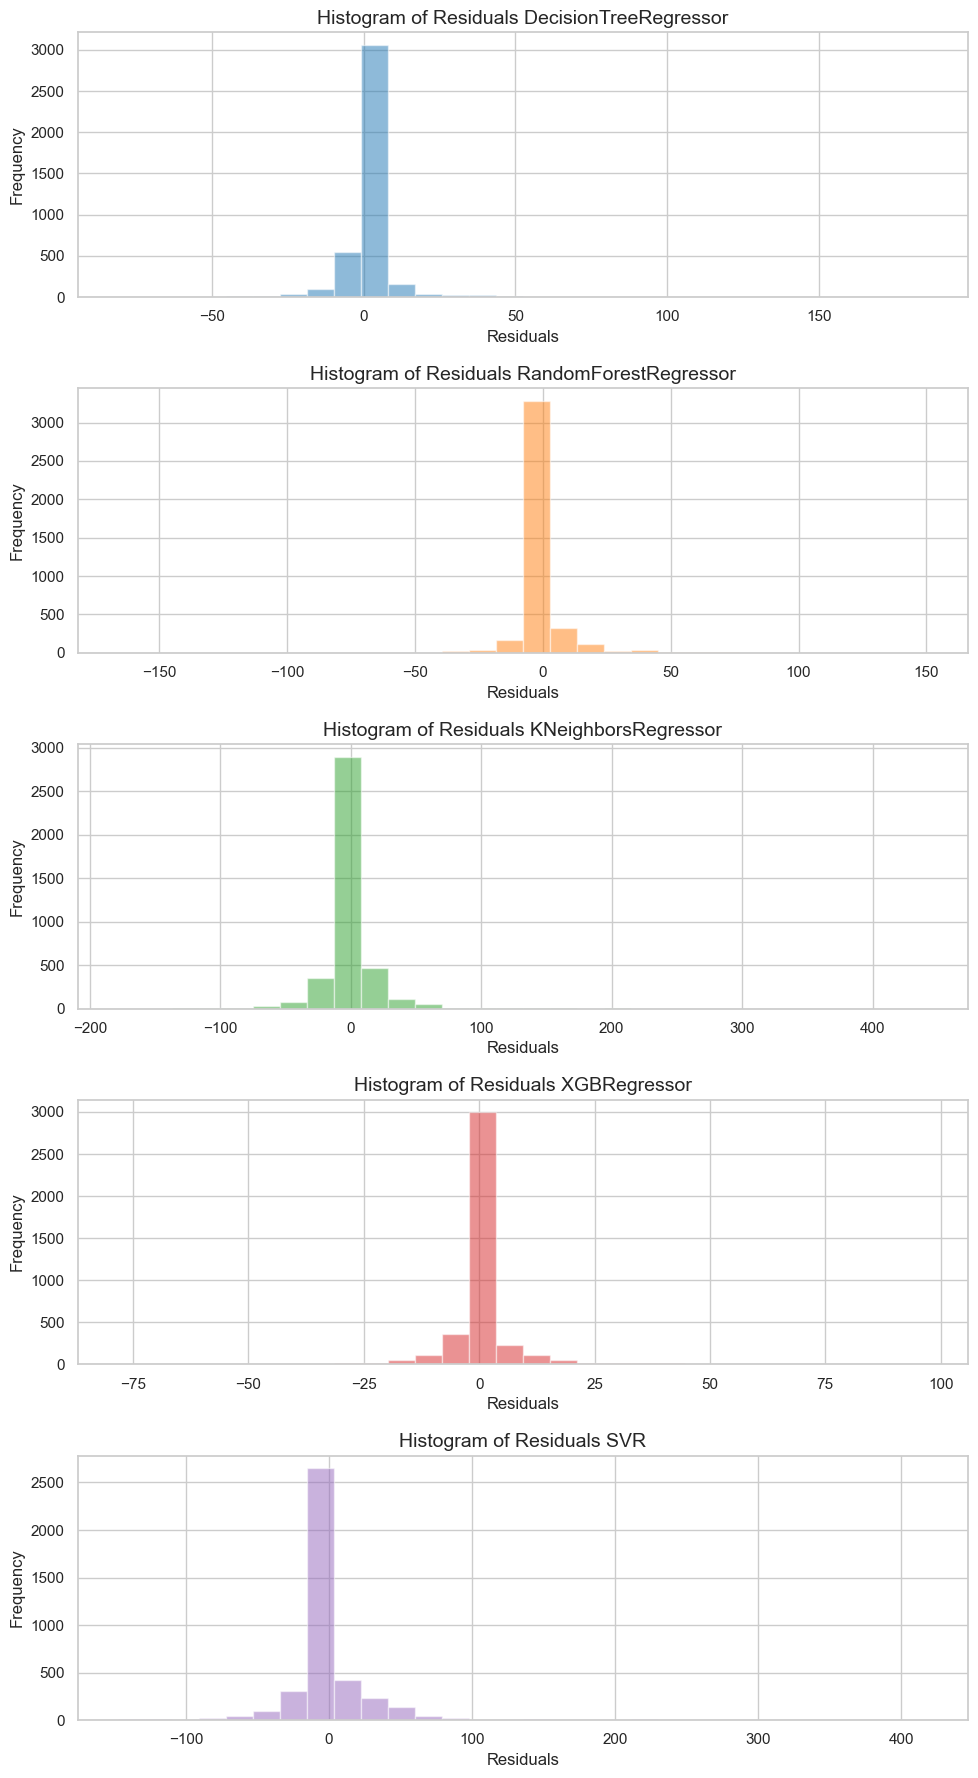

In [ ]:
def plotResiduals(models,X,y):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']
# Obtain the predictions of the models
    predictions =[]
    residuals=[]
    for model in models:
        #compute predictions
        prediction = model.predict(X)
        predictions.append(prediction)
        #append residuals
        residuals.append(y - prediction)

    fig, axs = plt.subplots(len(models), 1, figsize=(10, 18))

    for i,model in enumerate(models):
        axs[i].hist(residuals[i], bins=30, color=colors[i], alpha=0.5)
        axs[i].set_title(f'Histogram of Residuals {model.steps[-1][1].__class__.__name__}', fontsize=14)
        axs[i].set_xlabel('Residuals', fontsize=12)
        axs[i].set_ylabel('Frequency', fontsize=12)

    fig.tight_layout()
    plt.show()

models=[decisionTree_final, randomForest_final, knn_final, xgb_final, svm_final]

plotResiduals(models,X_test,y_test)

### A5 Histogram of residuals out of sample performance <a id="a5"></a>

<!-- ### A5 Histogram of residuals out of sample <a id="a5"></a> -->

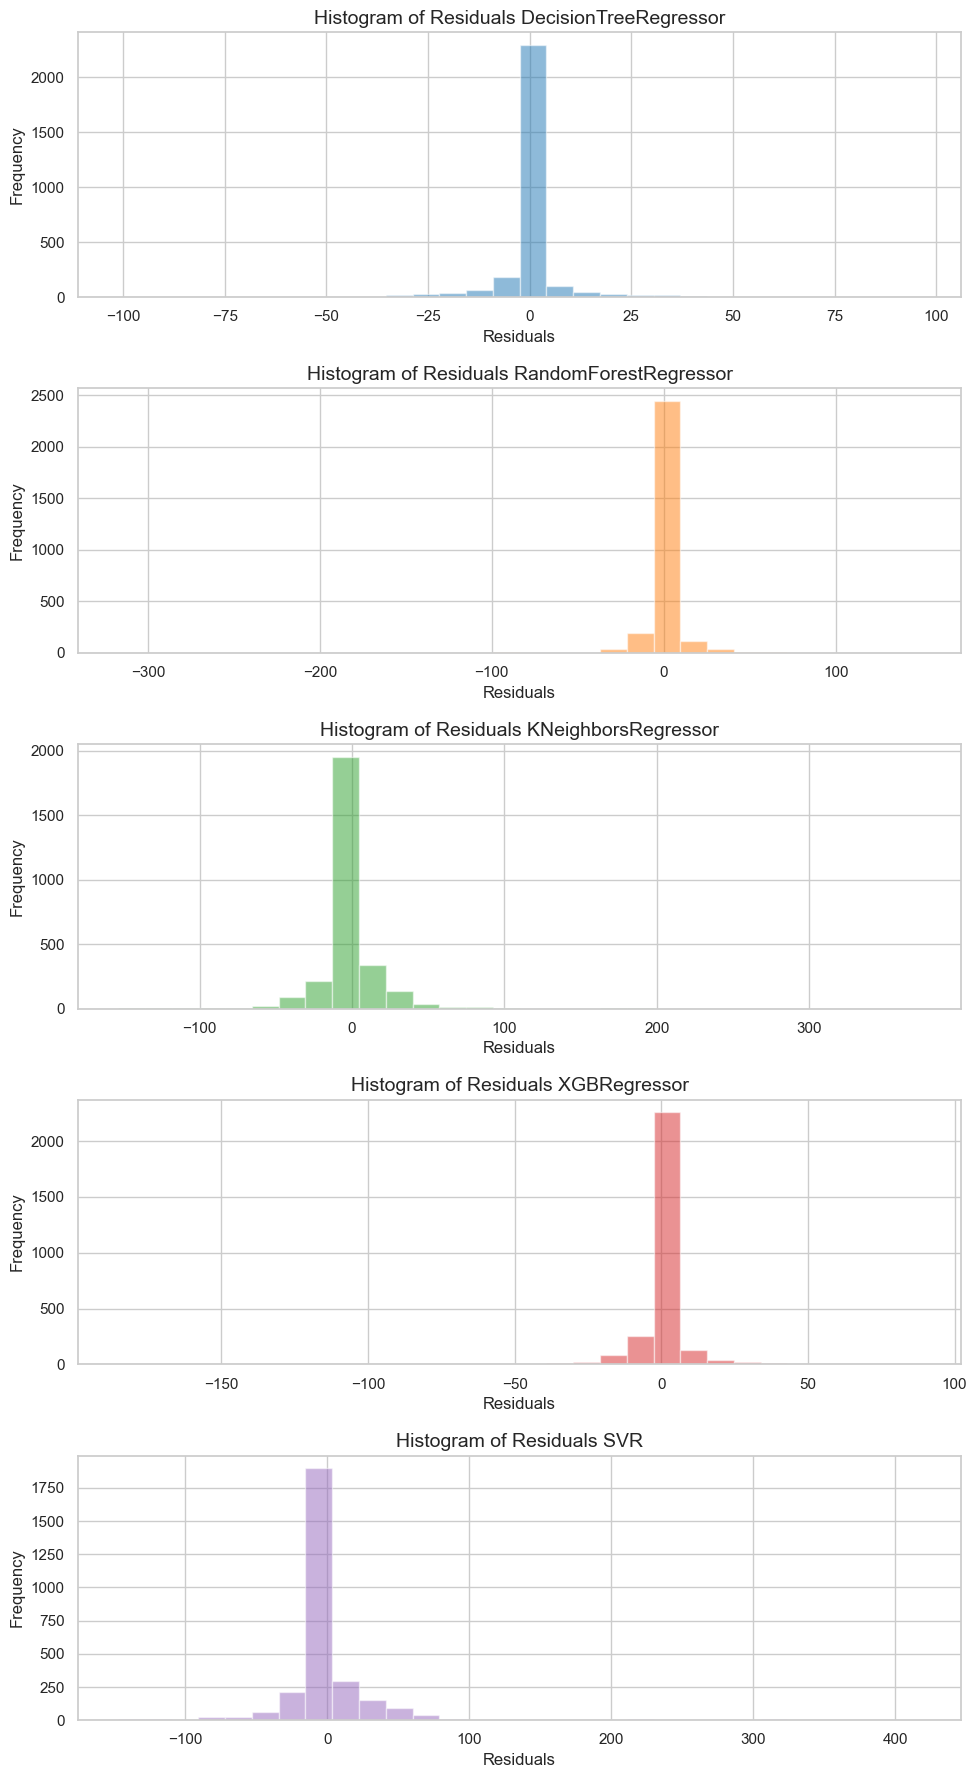

In [ ]:
plotResiduals(models, X_osample, y_osample)

### A6 Light models (reduced complexity)  <a id="a6"></a>

Before switching to ordinal encoding, we used OneHot encoding, which changed the results of the feature importance analysis. In addition, OneHot encoding increases the complexity of a model immensly, because it uses n-1 columns for n values inside a categorical feature. 

For the OneHot encoded features, the results were, that the model of the car was not very significant. So we tried to build models with reduced complexity, the light models.

This section shows the building and evaluation of the light models and also shows the effect of leaving out the models in the model building process.

In [ ]:
X_train_light = X_train.drop("model", axis=1)
X_test_light = X_test.drop("model", axis =1)
X_osample_light = X_osample.drop("model", axis = 1)
cat_FEATURES_light = cat_FEATURES.drop("model", axis=1)

In [ ]:
numeric_features = num_FEATURES.columns
categorical_features = cat_FEATURES_light.columns
preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)    
    ])

In [ ]:
categorical_features

Index(['brand', 'gear', 'fuel'], dtype='object')

#### A6.1 Best two performing full models  <a id="light-best"></a>

##### A6.1.2 Random Forest  <a id="light-tree"></a>

In [ ]:
# Define the parameter distribution
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    param_dist = {
        #'regressor__max_depth': randint(1, 10), # increasing depth always increases score -> overfitting
        'regressor__min_samples_split': [10, 20, 30, 40 ,50, 60, 70],
        'regressor__min_samples_leaf': [2, 4, 8, 10, 15, 20 ,30],
        'regressor__ccp_alpha': uniform(0, 0.1) # search for best ccp_alpha
    }

    # Create a new pipeline with the decision tree regression model
    decisionTree_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", DecisionTreeRegressor())
    ])

    # Perform randomized search with cross-validation
    decisionTree_randomized_search = RandomizedSearchCV(
        decisionTree_pipeline, 
        param_dist, 
        n_iter=3*iterations, 
        cv=2*crossvals, 
        scoring=scoring, 
        refit='MSE', 
        random_state=SEED, 
        n_jobs = cores,
        verbose = 3)
    decisionTree_randomized_search.fit(X_train_light, y_train)

    # evaluation metrics
    train_metrics_light = evaluate(decisionTree_randomized_search, X_train_light, y_train)
    test_metrics_light = evaluate(decisionTree_randomized_search, X_test_light, y_test)

    # create a dataframe from metrics
    decisionTree_rand_metrics = pd.DataFrame({'Train Set': train_metrics_light, 'Test Set': test_metrics_light})

    print("\nEvaluation Metrics:")
    print(decisionTree_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = decisionTree_randomized_search.best_params_

    decisionTree_params = pd.DataFrame({"Parameters": best_params})
    print(decisionTree_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")



In [ ]:
if compute:
    finalTree_light = DecisionTreeRegressor(
        ccp_alpha = best_params['regressor__ccp_alpha'],
        min_samples_leaf = best_params['regressor__min_samples_leaf'],
        min_samples_split = best_params['regressor__min_samples_split']
    )

    decisionTree_light_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalTree_light)
    ])
    decisionTree_light_final.fit(X_train_light, y_train)
else:
    decisionTree_light_final = load(f'{modelfolder}/decisionTree_light.joblib')

train_metrics_light = evaluate(decisionTree_light_final, X_train_light, y_train)
test_metrics_light = evaluate(decisionTree_light_final, X_test_light, y_test)

# create a dataframe from metrics
decisionTree_light_metrics = pd.DataFrame({'Decision Tree Train':train_metrics_light, 'Decision Tree Test': test_metrics_light})

print("\nEvaluation Metrics:")
print(decisionTree_light_metrics)


Evaluation Metrics:
      Decision Tree Train  Decision Tree Test
MSE            209.742431          413.383357
RMSE            14.482487           20.331831
MAE              4.266952            6.098616
R2               0.997731            0.995543
EVS              0.997731            0.995543
MAPE             0.007943            0.011526


##### A6.1.2 Random Forest  <a id="light-forest"></a>

In [ ]:
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    param_dist = {
        'regressor__n_estimators': [100, 300, 500, 600, 700, 800, 900, 1000],
        'regressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
        'regressor__min_samples_split': [10, 12, 15, 20, 30, 40, 50, 60],
        'regressor__min_samples_leaf': [6, 8, 10, 15, 20, 30, 40, 50]
    }

    rf_randomized_search = RandomizedSearchCV(
        rf_pipeline, 
        param_distributions=param_dist, 
        n_iter = 3*iterations, 
        cv=2*crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        n_jobs = cores,
        verbose = 3)

    rf_randomized_search.fit(X_train_light, y_train)

    # evaluation metrics
    train_metrics_light = evaluate(rf_randomized_search, X_train_light, y_train)
    test_metrics_light = evaluate(rf_randomized_search, X_test_light, y_test)

    # create a dataframe from metrics
    randomForest_rand_metrics = pd.DataFrame({'Train Set': train_metrics_light, 'Test Set': test_metrics_light})

    print("\nEvaluation Metrics:")
    print(randomForest_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = rf_randomized_search.best_params_

    randomForest_params = pd.DataFrame({"Parameters": best_params})
    print(randomForest_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")



In [ ]:
if compute:
    finalForest_light = RandomForestRegressor(
        n_estimators = best_params['regressor__n_estimators'],
        min_samples_split = best_params['regressor__min_samples_split'],
        min_samples_leaf = best_params['regressor__min_samples_leaf'],
        max_depth = best_params['regressor__max_depth']
    )

    randomForest_light_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalForest_light)
    ])
    randomForest_light_final.fit(X_train_light, y_train)

else:
    randomForest_light_final = load(f'{modelfolder}/randomForest_light.joblib')

train_metrics_light = evaluate(randomForest_light_final, X_train_light, y_train)
test_metrics_light = evaluate(randomForest_light_final, X_test_light, y_test)

# create a dataframe from metrics
randomForest_light_metrics = pd.DataFrame({'Random Forest Train':train_metrics_light, 'Random Forest Test': test_metrics_light})

print("\nEvaluation Metrics:")
print(randomForest_light_metrics)


Evaluation Metrics:
      Random Forest Train  Random Forest Test
MSE            385.868909          451.555470
RMSE            19.643546           21.249835
MAE              7.373744            8.347957
R2               0.995825            0.995132
EVS              0.995825            0.995133
MAPE             0.012751            0.014797


##### A6.1.3 XGB <a id="light-xgb"></a>

In [ ]:
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    # Define the parameter distribution
    param_dist = {
        'regressor__max_depth': [15, 20, 25, 30, 35, 40, 45, 50 , 55, 60, 65, 70],
        'regressor__learning_rate': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.10, 0.2, 0.3, 0.5],
        'regressor__n_estimators': [125, 150, 160, 175, 185, 200, 225, 250, 275, 300, 350, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500],
        'regressor__gamma': [0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.50, 0.55],
        'regressor__subsample': [0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8,0.9],
        'regressor__colsample_bytree': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85],
        'regressor__min_child_weight':randint(1,20),
        'regressor__reg_lambda': [0, 0.001, 0.004, 0.006, 0.01, 0.05, 0.1, 1, 2, 3, 4, 5, 6, 7, 10],
        'regressor__reg_alpha' :[0, 1, 10, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100],
        'regressor__tree_method':["gpu_hist"],
    }

    # Create a new pipeline with the XGBoost regressor model
    xgb_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor())
    ])

    # Perform randomized search with cross-validation
    xgb_randomized_search = RandomizedSearchCV(
        xgb_pipeline,
        param_dist,
        n_iter=3*iterations,
        cv=2*crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3)
        
    xgb_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics_light = evaluate(xgb_randomized_search, X_train, y_train)
    test_metrics_light = evaluate(xgb_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    xgb_rand_metrics = pd.DataFrame({'Train Set': train_metrics_light, 'Test Set': test_metrics_light})

    print("\nEvaluation Metrics:")
    print(xgb_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = xgb_randomized_search.best_params_
    xgb_params = pd.DataFrame({"Parameters": best_params})
    print(xgb_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

In [ ]:
if compute:
    finalXGB_light = XGBRegressor(
        colsample_bytree = best_params['regressor__colsample_bytree'], 
        gamma = best_params['regressor__gamma'],
        learning_rate = best_params['regressor__learning_rate'], 
        max_depth = best_params['regressor__max_depth'],
        subsample = best_params['regressor__subsample'],
        n_estimators = best_params['regressor__n_estimators'],
        min_child_weight = best_params['regressor__min_child_weight'],
        reg_alpha = best_params['regressor__reg_alpha'],
        reg_lambda = best_params['regressor__reg_lambda'],
        tree_method = best_params['regressor__tree_method'],
    )

    xgb_light_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalXGB_light)
    ])
    xgb_light_final.fit(X_train, y_train)

else:
    xgb_light_final = load(f'{modelfolder}/XGBoost_light.joblib')

train_metrics_light = evaluate(xgb_light_final, X_train, y_train)
test_metrics_light = evaluate(xgb_light_final, X_test, y_test)

# Create a DataFrame from metrics
xgb_light_metrics = pd.DataFrame({'XGB Train': train_metrics_light, 'XGB Test': test_metrics_light})

print("\nEvaluation Metrics:")
print(xgb_light_metrics)


Evaluation Metrics:
       XGB Train    XGB Test
MSE   178.409506  365.090424
RMSE   13.357002   19.107340
MAE     5.696037    8.364257
R2      0.998070    0.996064
EVS     0.998070    0.996065
MAPE    0.010674    0.015629


#### A6.2 Performance full vs light models  <a id="light-comparison"></a>

In [ ]:
decisionTree_light_osample_metrics = getMetrics(decisionTree_light_final, "Decision Tree out of sample", X_osample, y_osample)
randomForest_light_osample_metrics = getMetrics(randomForest_light_final, "Random Forest out of sample", X_osample, y_osample)
xgb_light_osample_metrics = getMetrics(xgb_light_final,"XGB out of sample", X_osample, y_osample)

In [ ]:
metrics = [decisionTree_light_metrics ,randomForest_light_metrics, xgb_light_metrics]

# Create empty DataFrames for train metrics and test metrics
train_metrics_light = pd.DataFrame()
test_metrics_light = pd.DataFrame()

# Loop through the metrics list and assign train and test metrics to respective DataFrames
for metric in metrics:
    for col in metric.columns:
        if "Train" in col:
            train_metrics_light = pd.concat([train_metrics_light, metric[[col]]], axis=1)
        elif "Test" in col:
            test_metrics_light = pd.concat([test_metrics_light, metric[[col]]], axis=1)

In [ ]:
osample_metrics_light = pd.concat([decisionTree_light_osample_metrics,
                            randomForest_light_osample_metrics,
                            xgb_light_osample_metrics],
                            axis=1)

In [ ]:
osample_metrics_light

Decision Tree out of sample  Random Forest out of sample   
MSE                    412.294540                   587.562125  \
RMSE                    20.305037                    24.239681   
MAE                      6.260306                     8.837030   
R2                       0.995510                     0.993601   
EVS                      0.995512                     0.993601   
MAPE                     0.011746                     0.015039   

      XGB out of sample  
MSE          428.523895  
RMSE          20.700819  
MAE            8.888611  
R2             0.995333  
EVS            0.995334  
MAPE           0.016270

In [ ]:
osample_metrics[osample_metrics_light.columns]

Decision Tree out of sample  Random Forest out of sample   
MSE                     86.005198                   149.547716  \
RMSE                     9.273899                    12.228970   
MAE                      3.260411                     3.918312   
R2                       0.999063                     0.998371   
EVS                      0.999064                     0.998371   
MAPE                     0.006344                     0.006896   

      XGB out of sample  
MSE           81.498908  
RMSE           9.027675  
MAE            3.590986  
R2             0.999112  
EVS            0.999113  
MAPE           0.006816

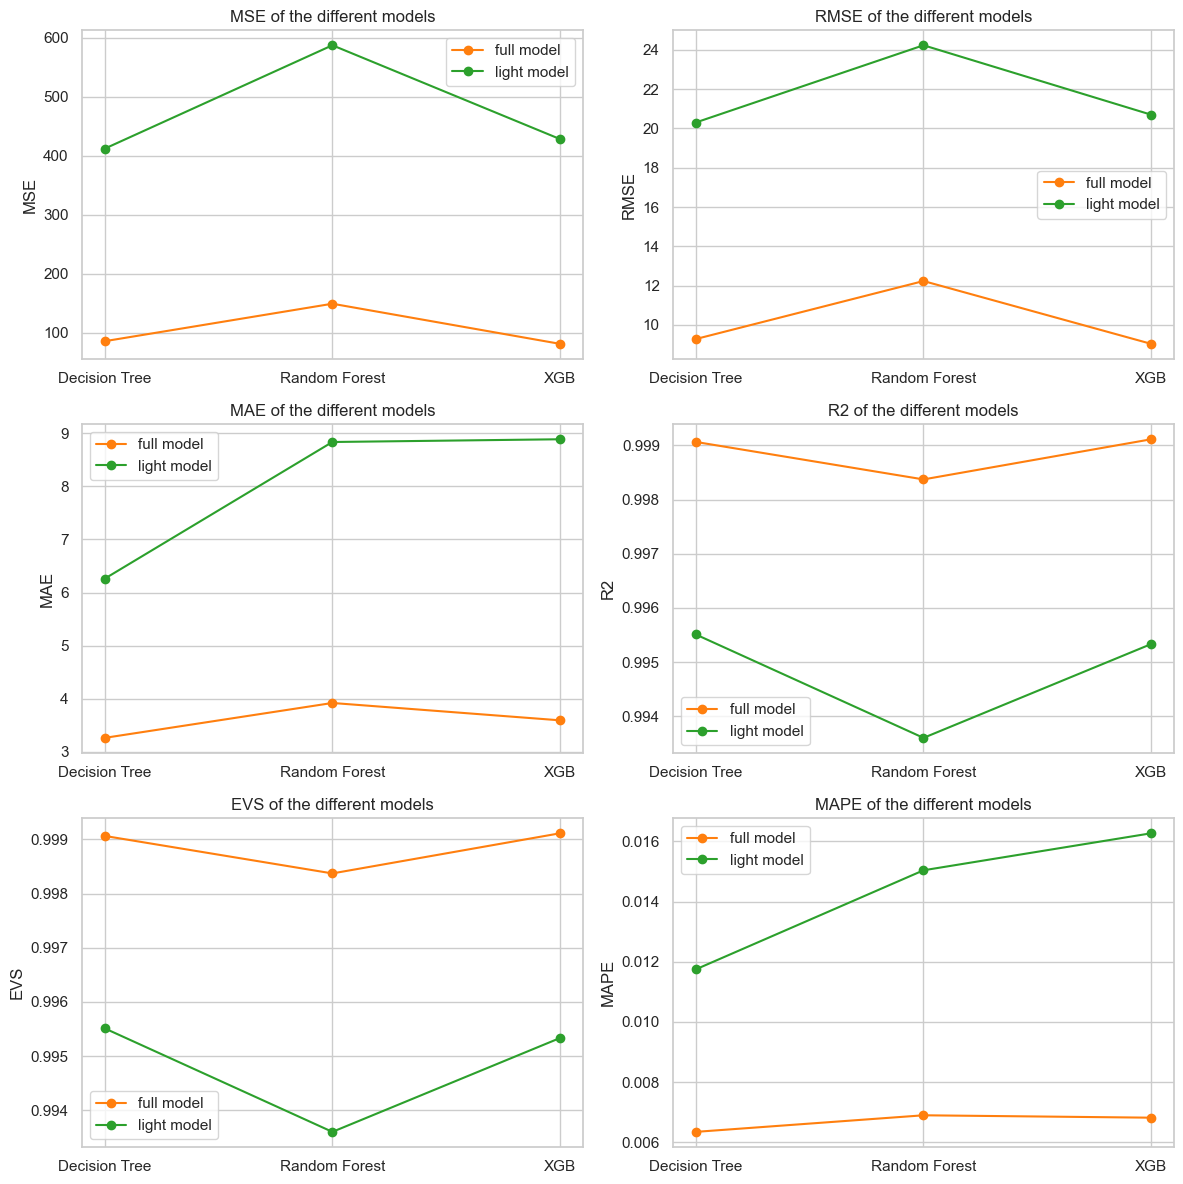

In [ ]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']

# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = osample_metrics_light.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(osample_metrics[osample_metrics_light.columns].columns.str.replace(" out of sample",""), osample_metrics[osample_metrics_light.columns].iloc[i], label="full model", marker='o', color=colors[1])
    plt.plot(osample_metrics_light.columns.str.replace(" out of sample",""), osample_metrics_light.iloc[i], label="light model", marker='o', color=colors[2])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


#### A6.2.1 Performance full vs light models  <a id="light-comparison-PvA"></a>

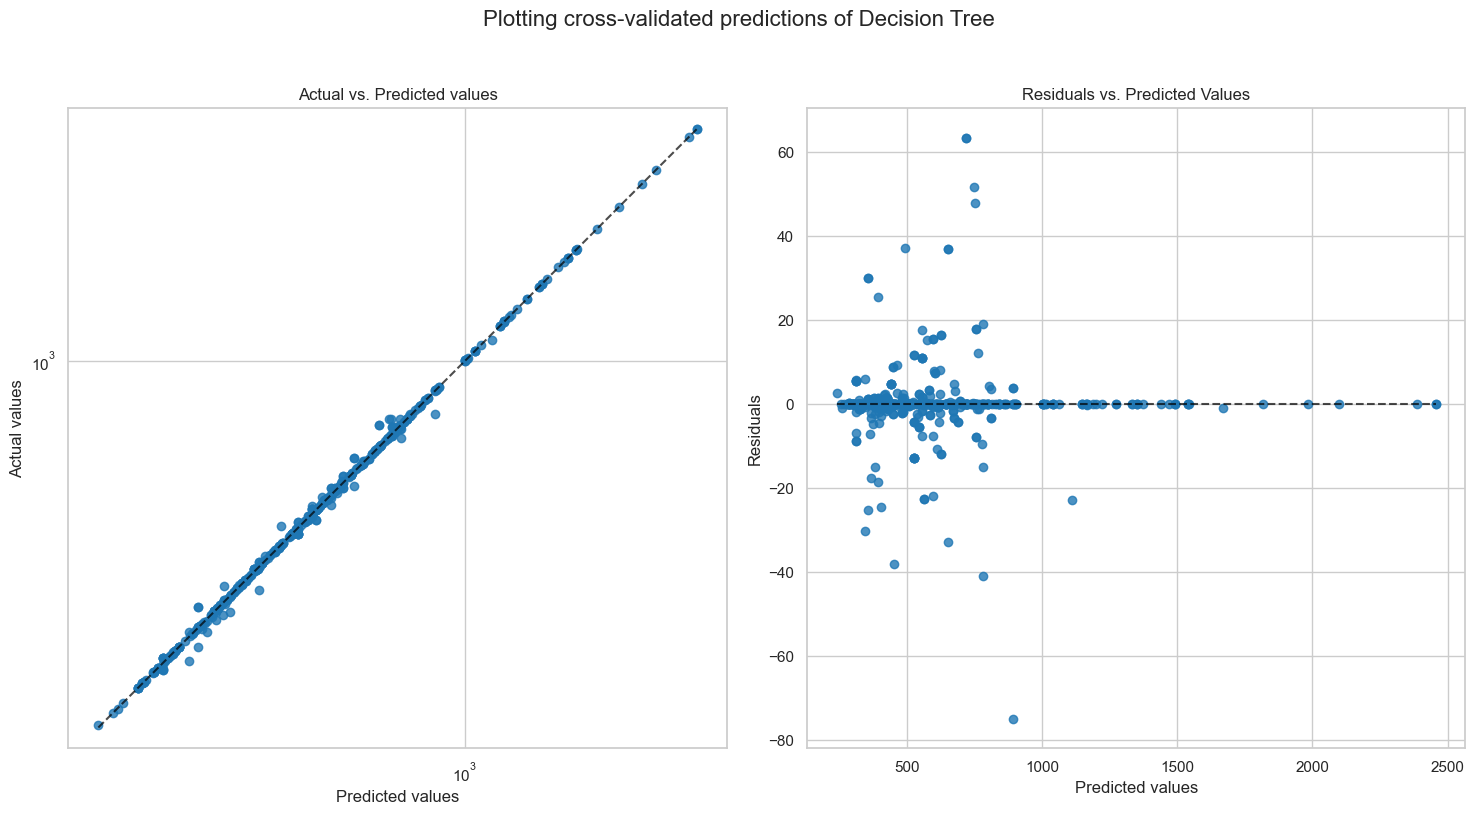

The mean residual of Decision Tree is: -0.14192113936983314


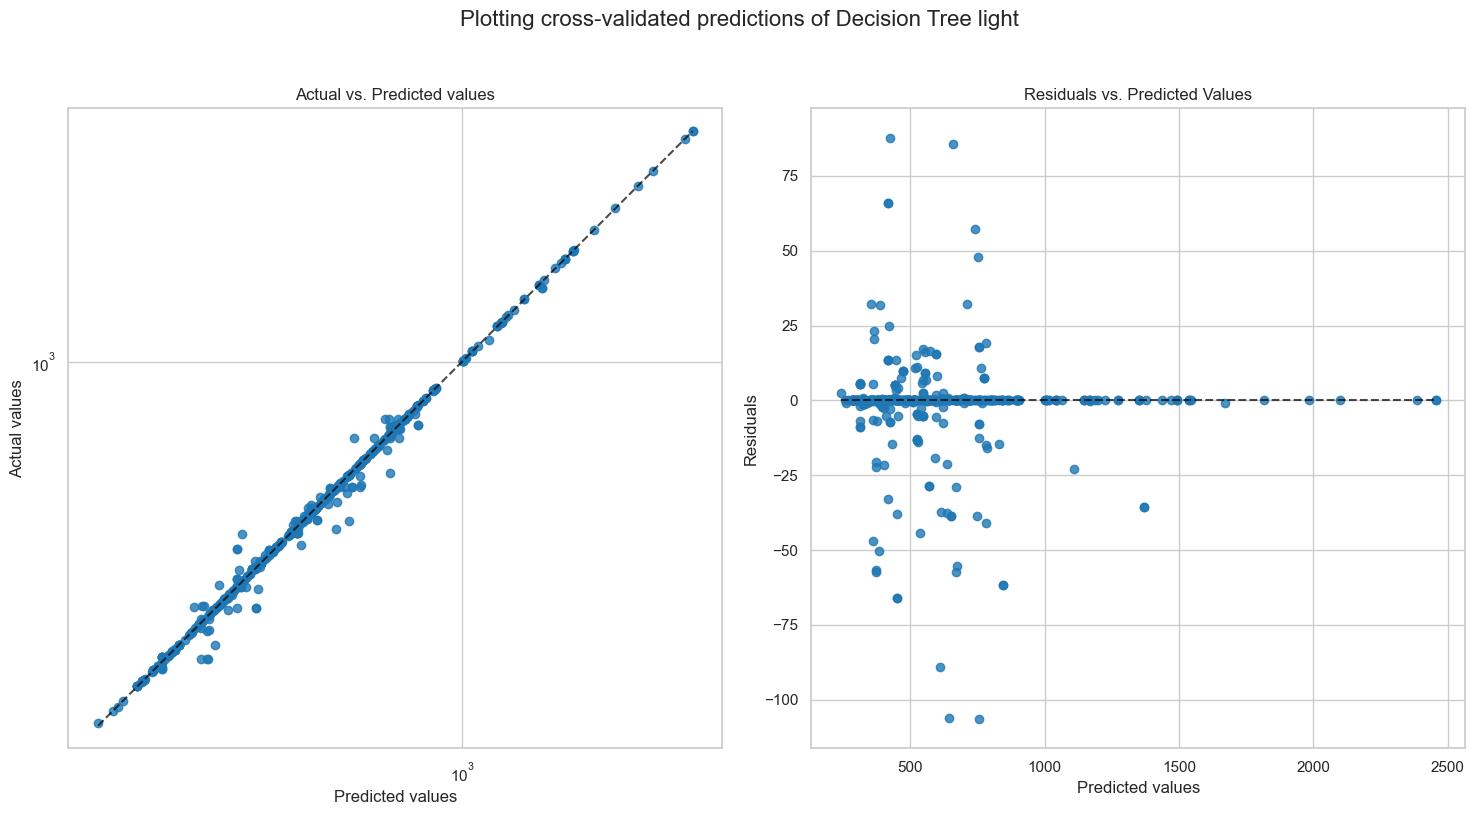

The mean residual of Decision Tree light is: -0.46648864660616046


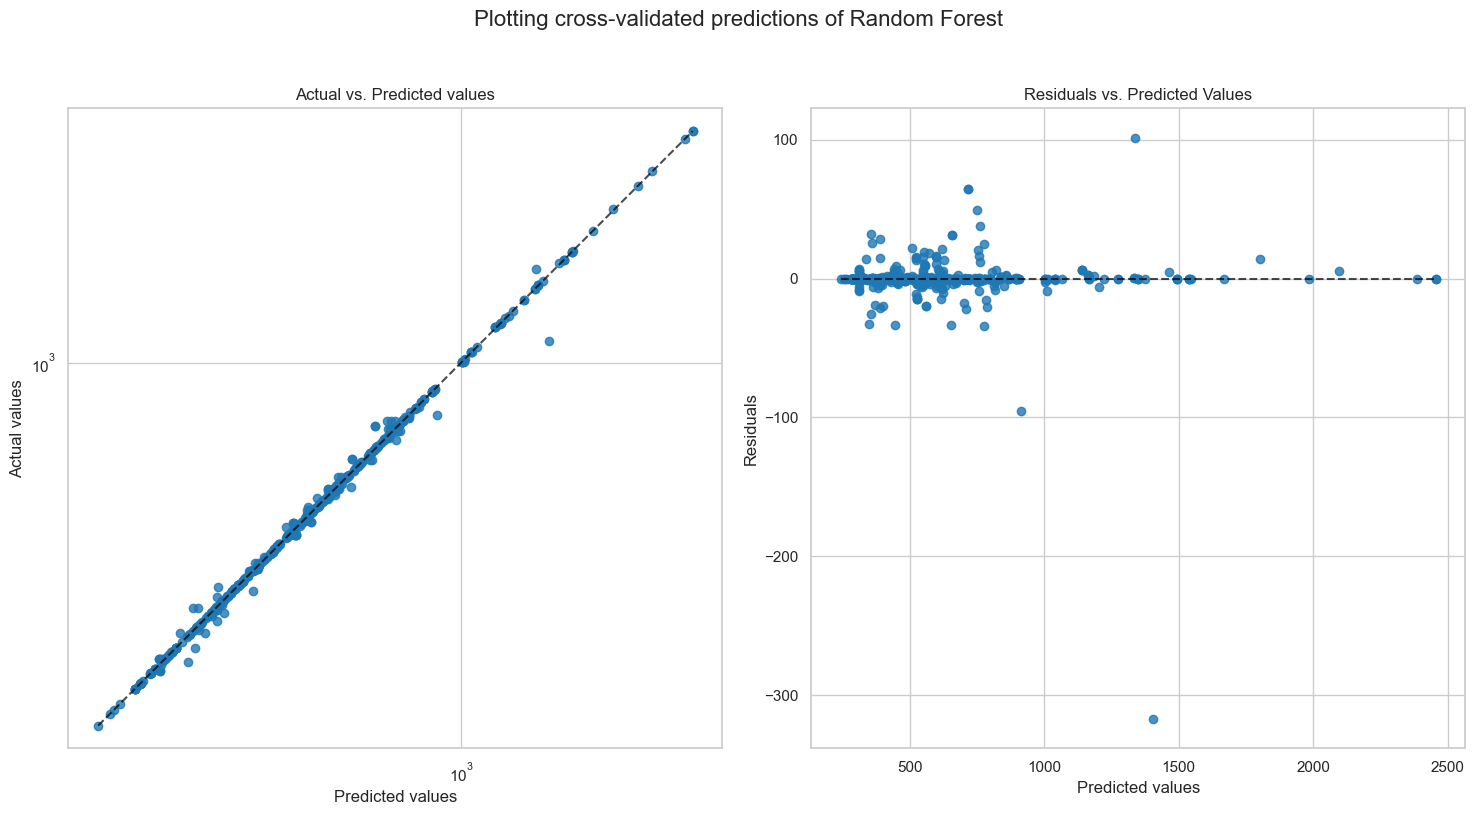

The mean residual of Random Forest is: -0.0004747767460958373


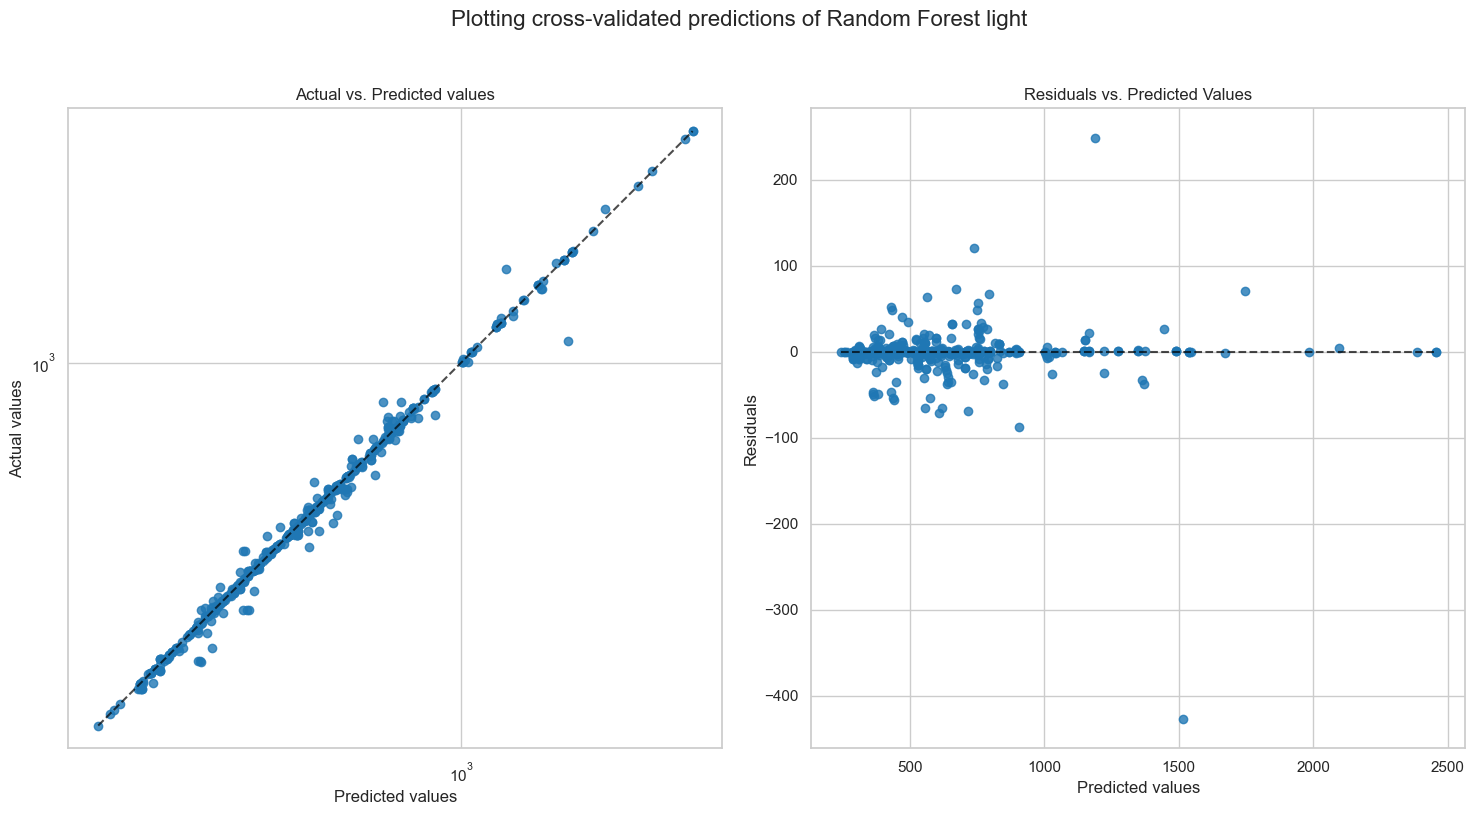

The mean residual of Random Forest light is: 0.10922425080982177


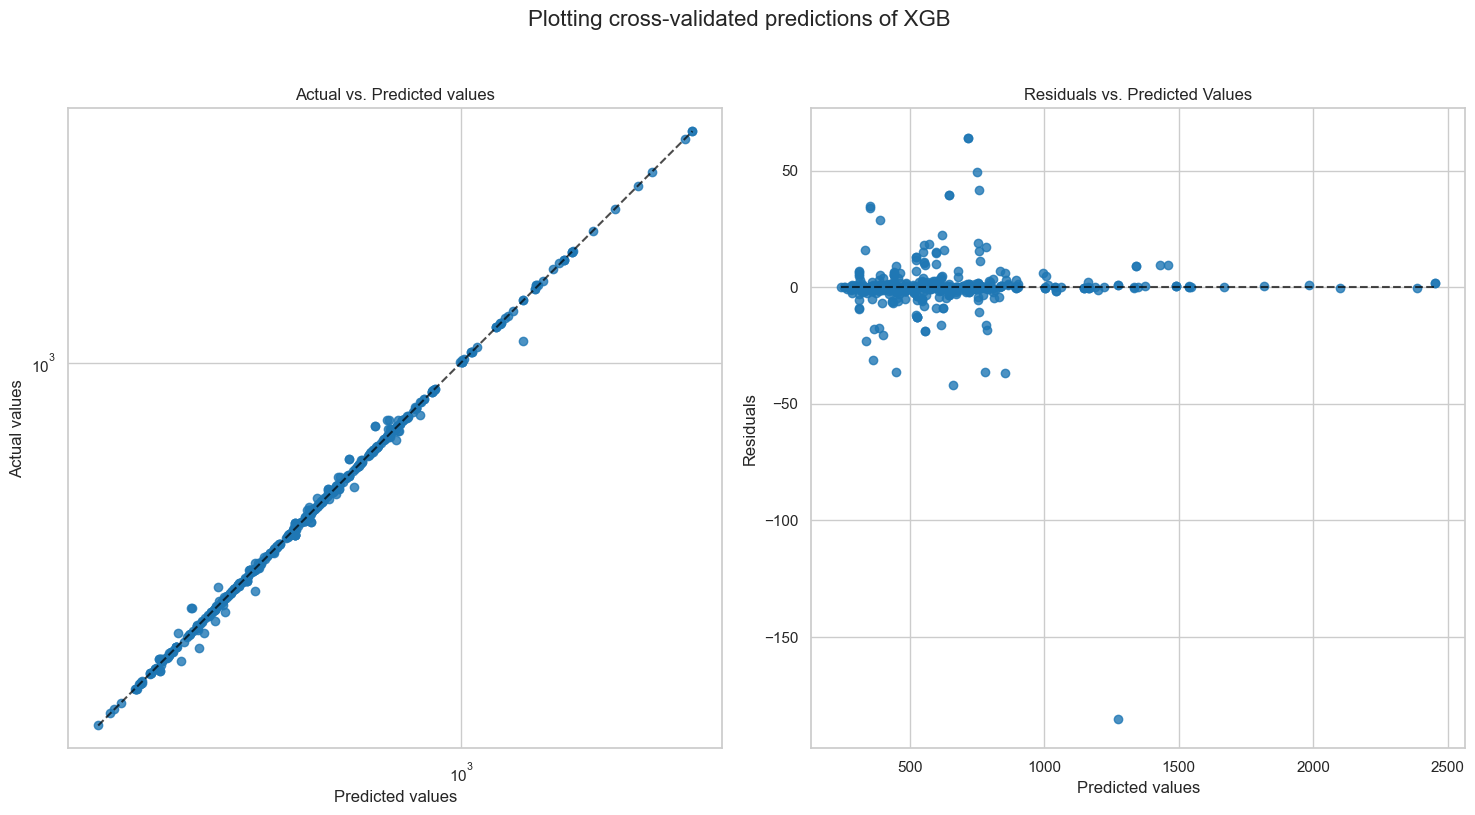

The mean residual of XGB is: -0.10674510261257672


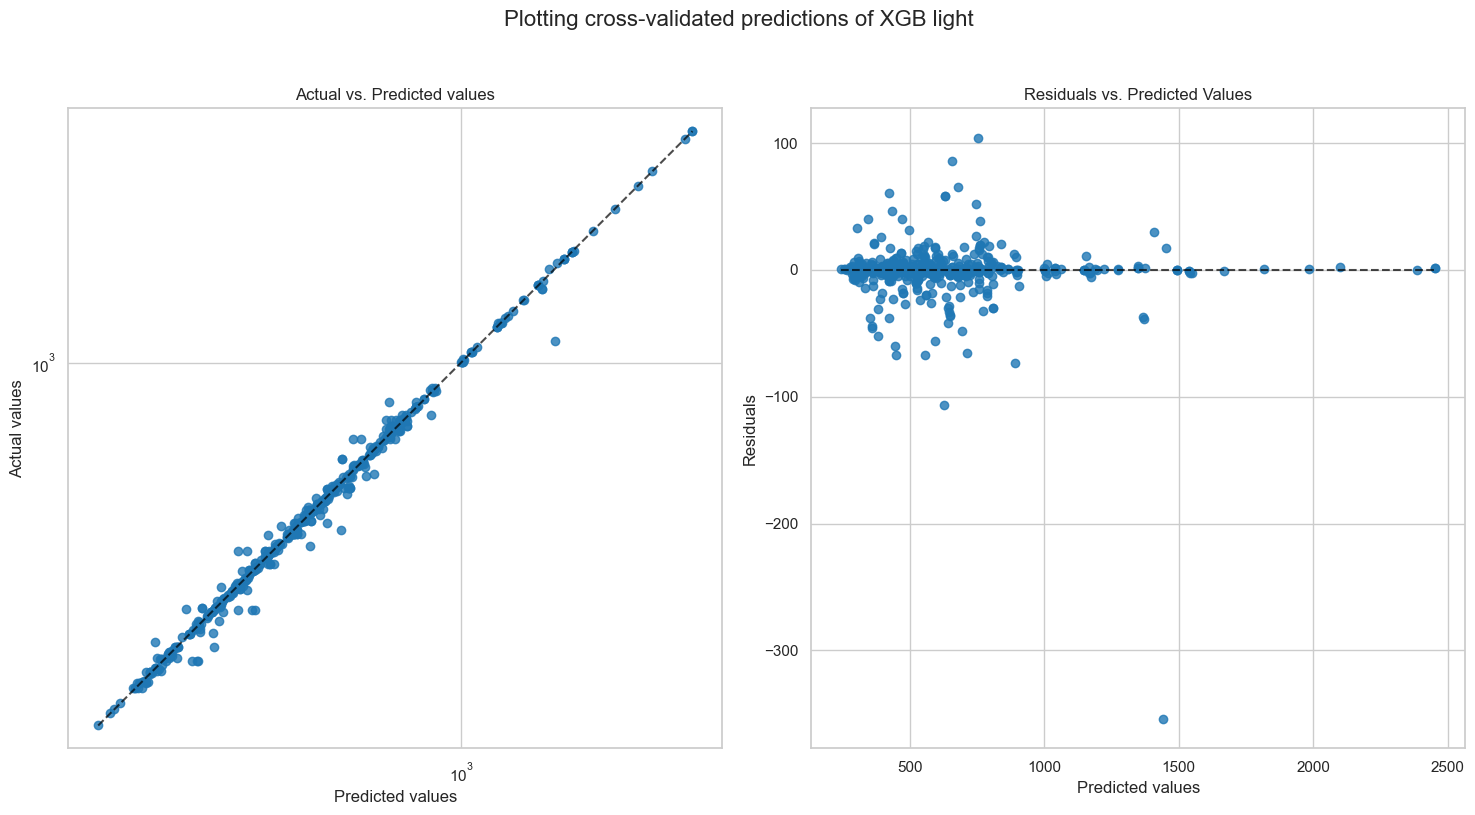

The mean residual of XGB light is: -0.3072127171791553


In [ ]:
plotPvA(decisionTree_final, "Decision Tree", X_osample, y_osample)
plotPvA(decisionTree_light_final, "Decision Tree light", X_osample, y_osample)

plotPvA(randomForest_final, "Random Forest", X_osample, y_osample)
plotPvA(randomForest_light_final, "Random Forest light", X_osample, y_osample)

plotPvA(xgb_final, "XGB", X_osample, y_osample)
plotPvA(xgb_light_final, "XGB light", X_osample, y_osample)